# Data Preparation

In [1]:
# common imports
import requests
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

sys.executable

'/opt/anaconda3/bin/python'

In [2]:
sys.path

['/Users/mirror/Desktop/GitHub/NFL_Game_Predictor',
 '/opt/anaconda3/lib/python38.zip',
 '/opt/anaconda3/lib/python3.8',
 '/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/mirror/.local/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/mirror/.ipython']

In [3]:
# Importing data from csv file
path = "/Users/mirror/Desktop/GitHub/nfl_game_predictor/data/scraped_data.csv"
df = pd.read_csv(path)

### Quick Exploration

In [4]:
df.shape

(15000, 26)

In [5]:
df.dtypes

season                 int64
team                  object
week                  object
day                   object
date                  object
time                  object
result                object
ot                    object
record                object
home_team             object
opp                   object
points_scored        float64
points_allowed       float64
1st_downs            float64
totyd                float64
passyd               float64
rushyd               float64
to                   float64
1st_downs_allowed    float64
totyd_allowed        float64
passyd_allowed       float64
rushyd_allowed       float64
to_forced            float64
off_exp_pts          float64
def_exp_pts          float64
sts_exp_pts          float64
dtype: object

In [6]:
df.isnull().sum()

season                   0
team                     0
week                     0
day                      0
date                     0
time                     0
result                   0
ot                   14078
record                   0
home_team             7472
opp                      0
points_scored            0
points_allowed           0
1st_downs                0
totyd                    0
passyd                   2
rushyd                   0
to                    3287
1st_downs_allowed        0
totyd_allowed            0
passyd_allowed           2
rushyd_allowed           0
to_forced             3287
off_exp_pts              0
def_exp_pts              0
sts_exp_pts              0
dtype: int64

In [7]:
df['ot'].isnull().sum()

14078

In [8]:
# discovering how many times an opponent played a game
df.opp.value_counts()

New England Patriots        506
Green Bay Packers           498
Pittsburgh Steelers         493
Indianapolis Colts          489
Philadelphia Eagles         487
Seattle Seahawks            485
San Francisco 49ers         484
Denver Broncos              480
Kansas City Chiefs          478
Dallas Cowboys              477
Minnesota Vikings           477
New Orleans Saints          476
Atlanta Falcons             475
New York Giants             474
Tampa Bay Buccaneers        474
New York Jets               471
Miami Dolphins              470
Arizona Cardinals           469
Cincinnati Bengals          468
Buffalo Bills               468
Chicago Bears               468
Detroit Lions               463
Carolina Panthers           458
Jacksonville Jaguars        455
Baltimore Ravens            452
Washington Redskins         423
Cleveland Browns            414
Oakland Raiders             408
Tennessee Titans            394
San Diego Chargers          382
St. Louis Rams              346
Houston 


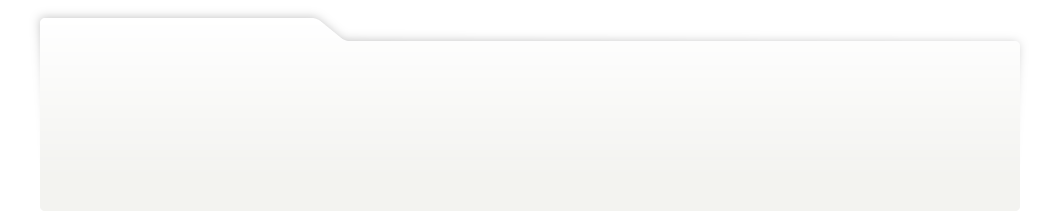
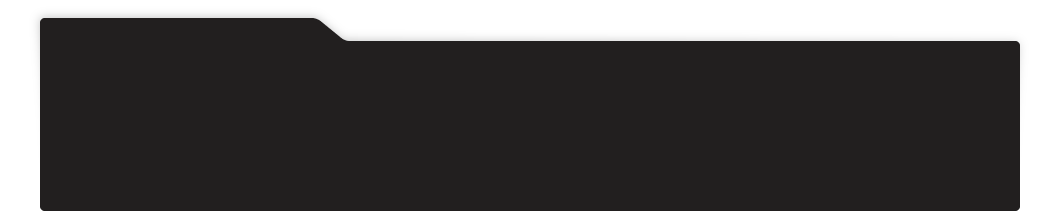
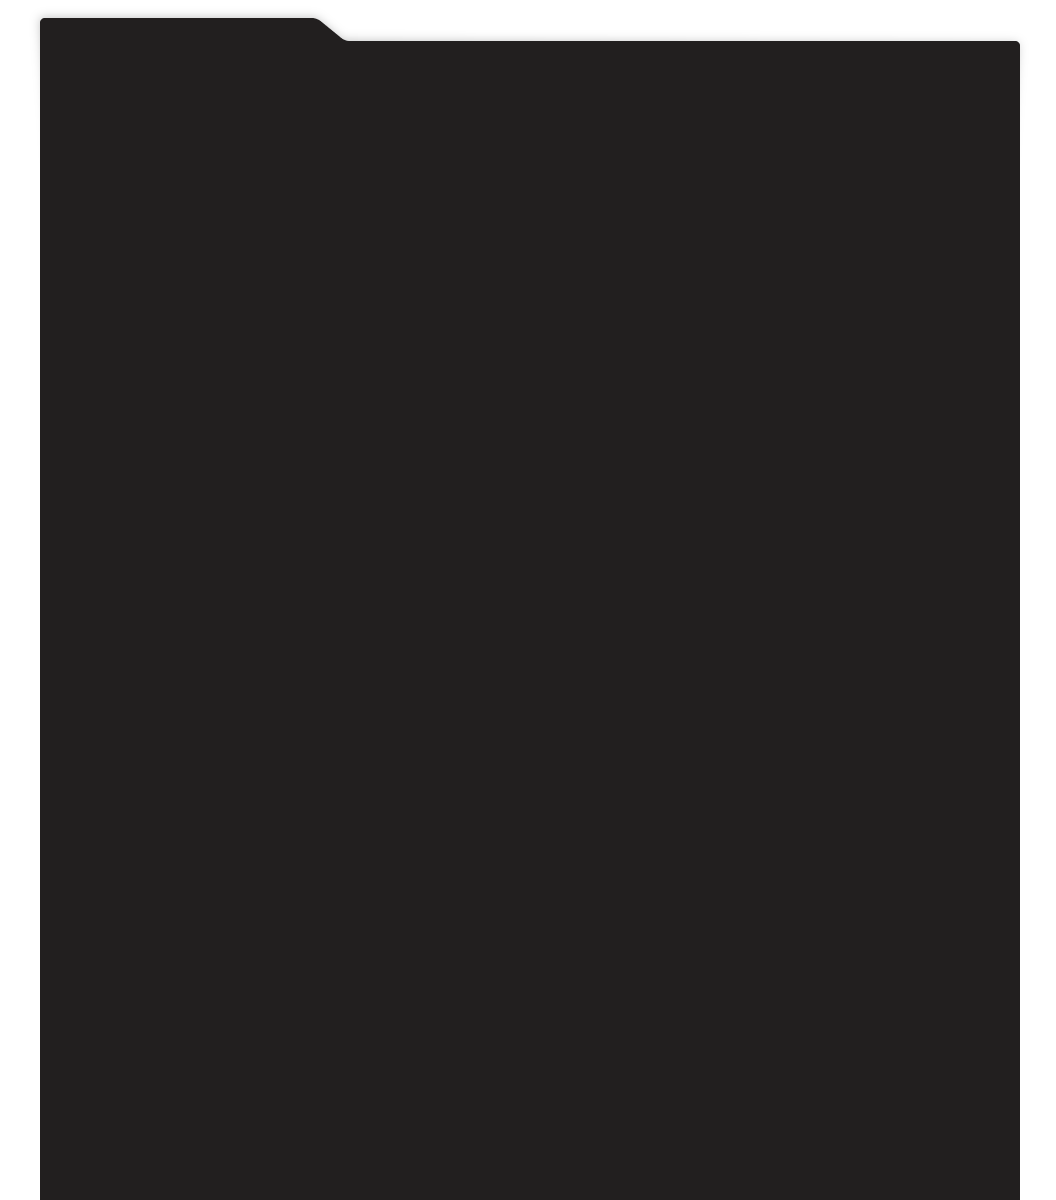
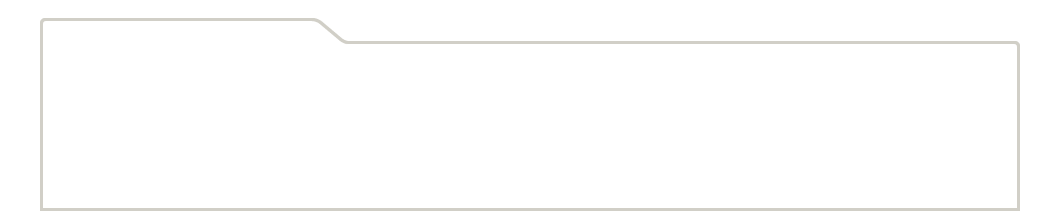
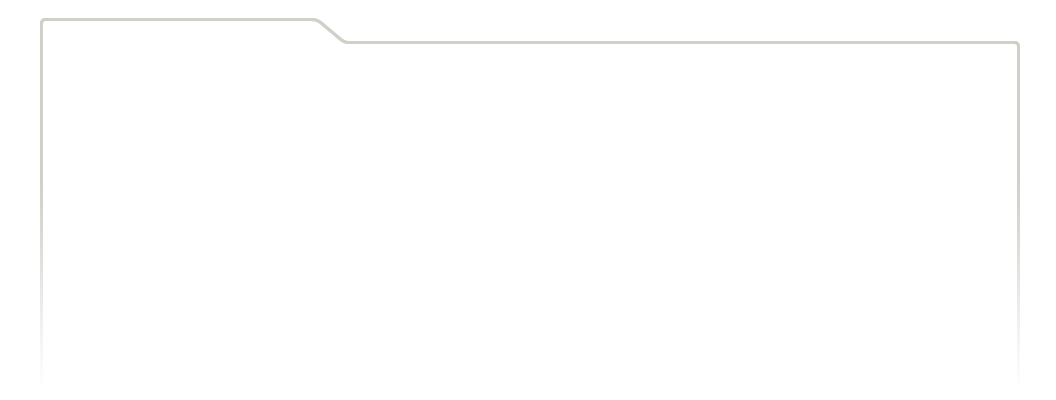
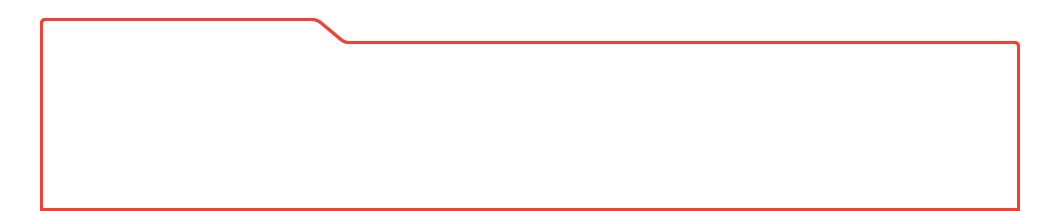
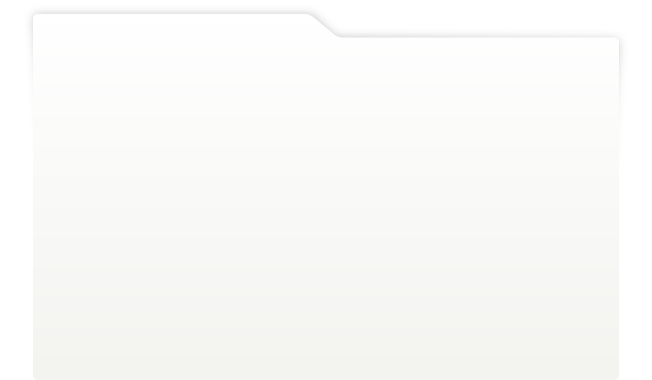
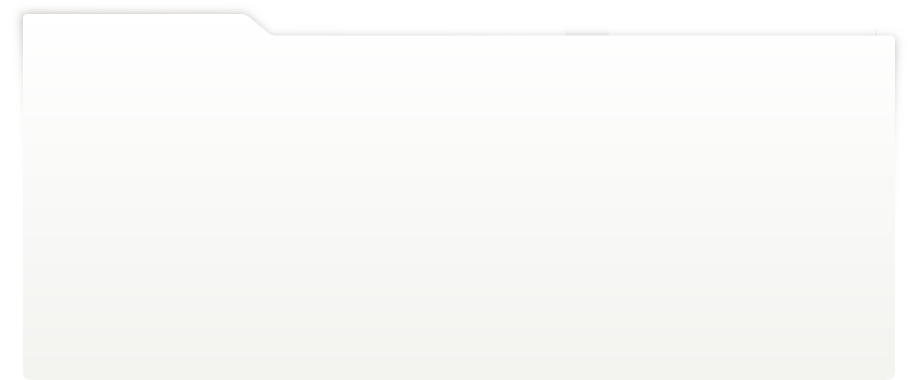
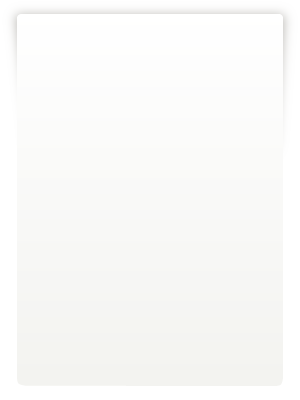
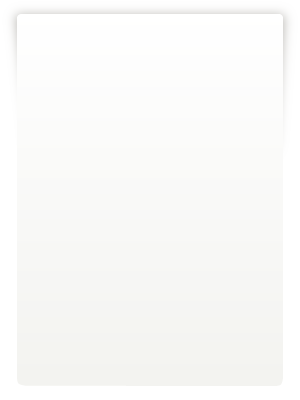
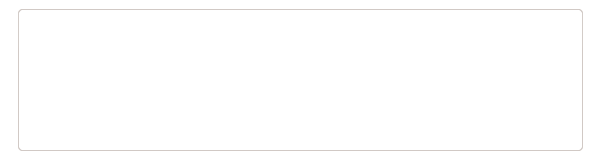
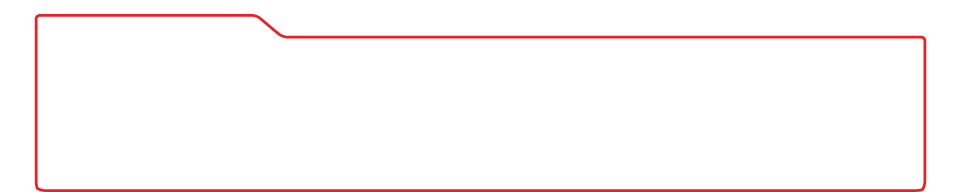
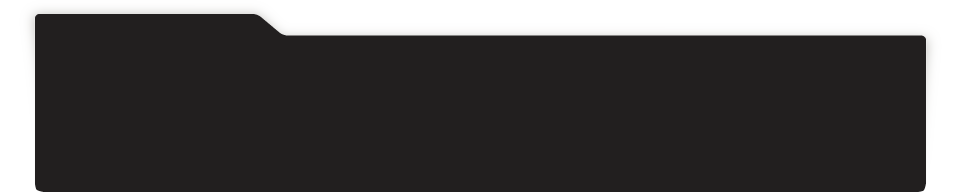
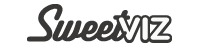
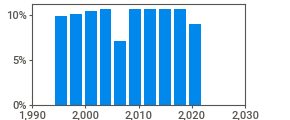
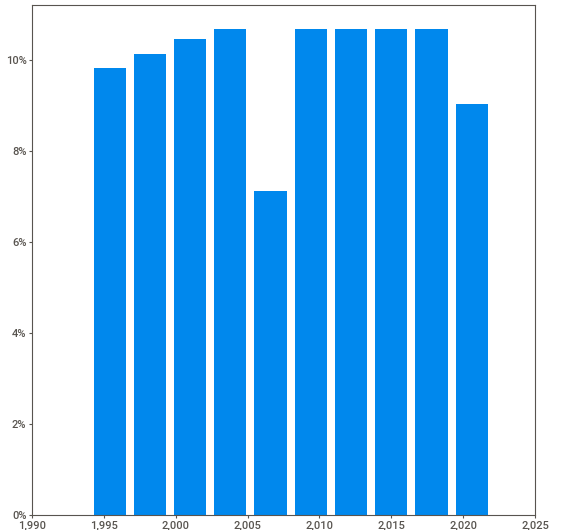
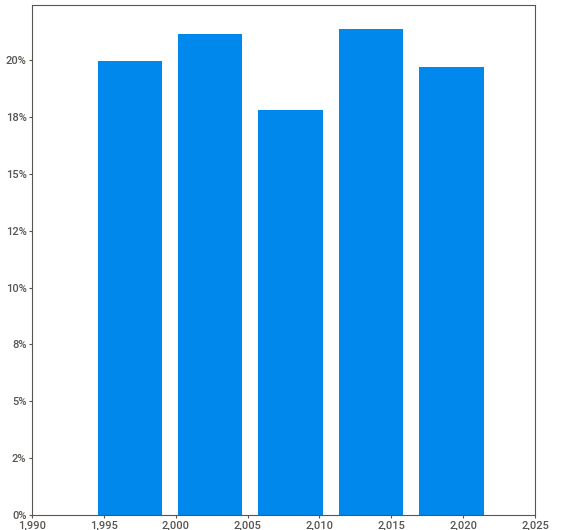
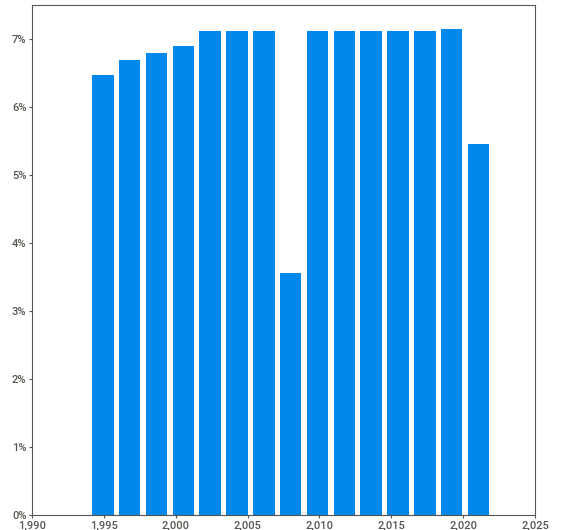
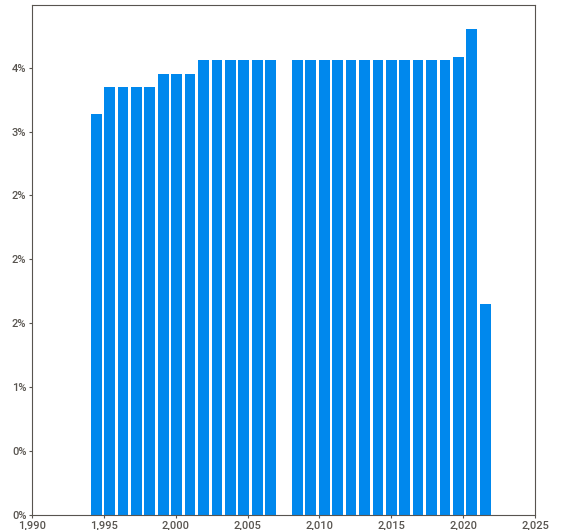
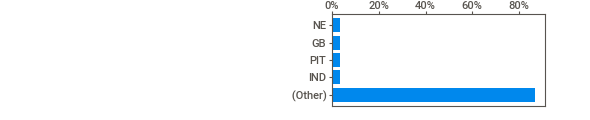
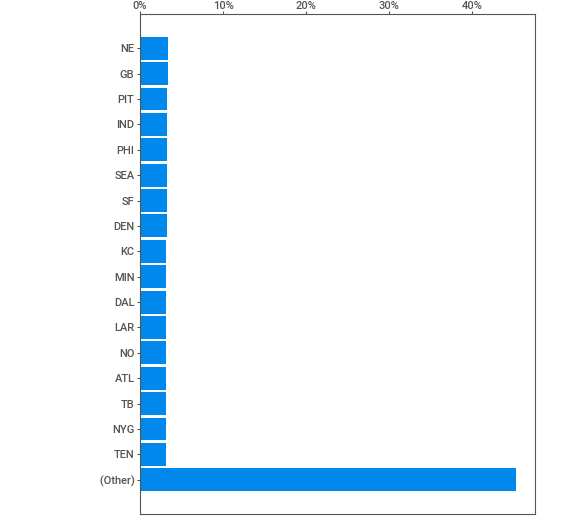
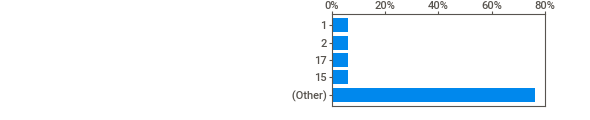
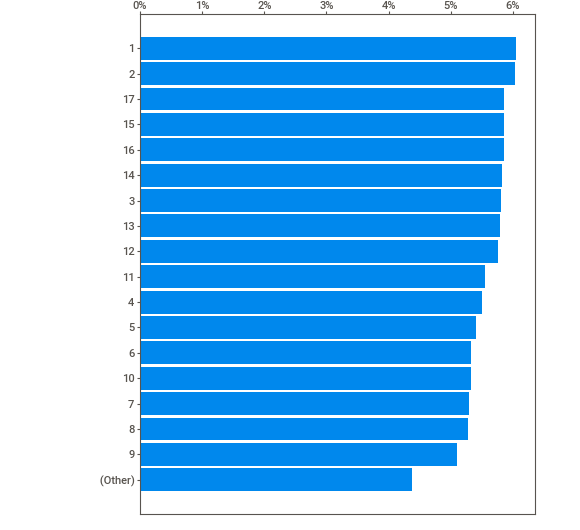
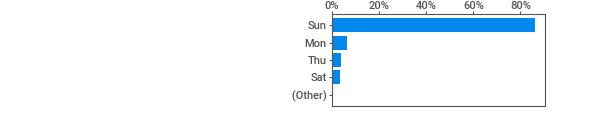
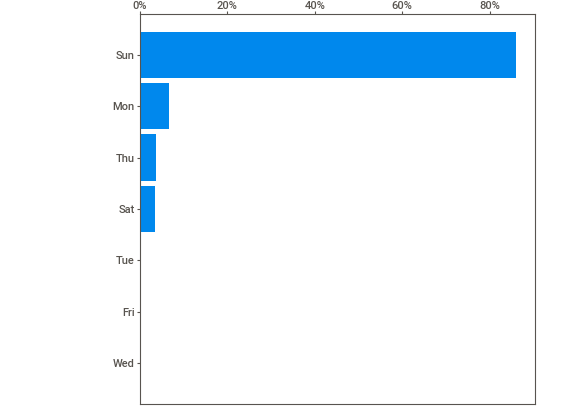
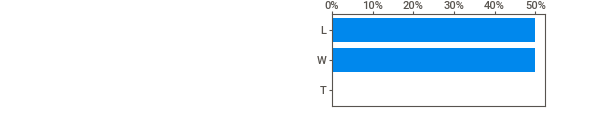
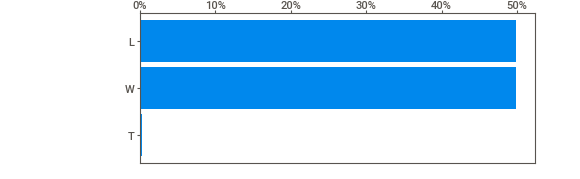
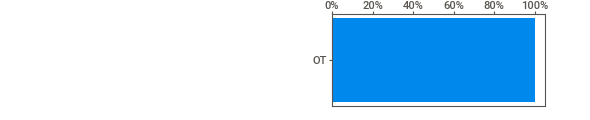
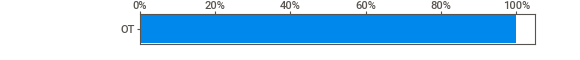
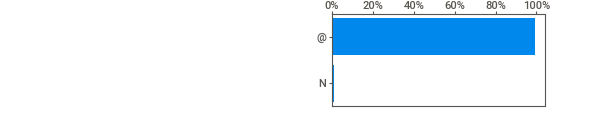
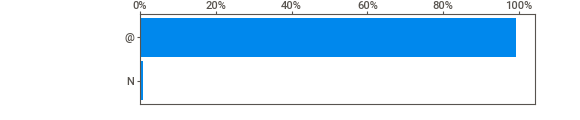
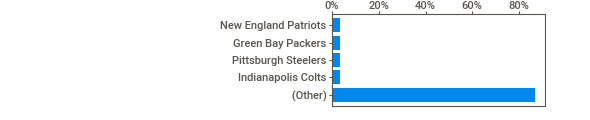
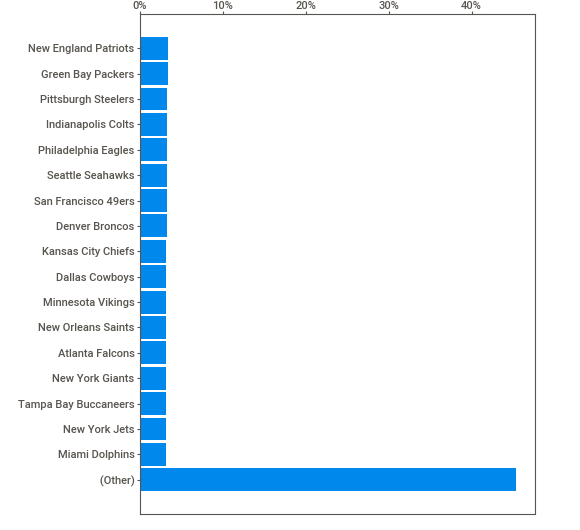
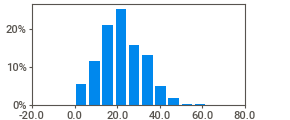
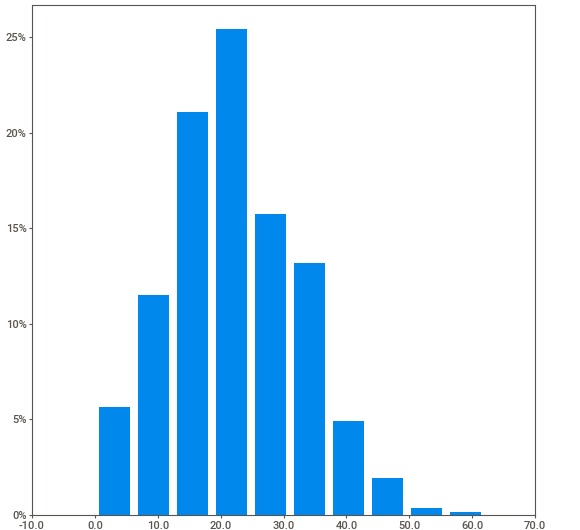
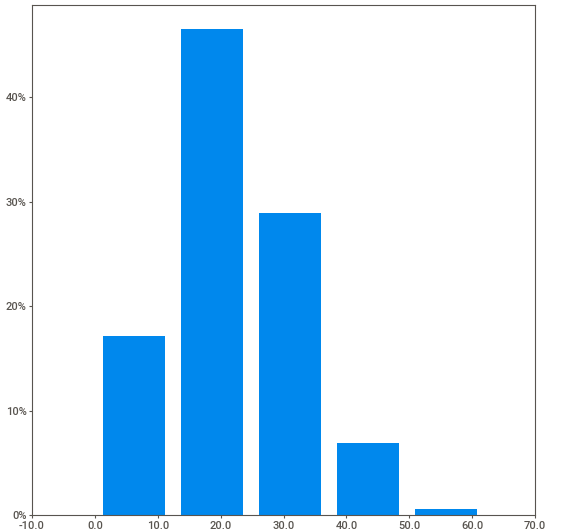
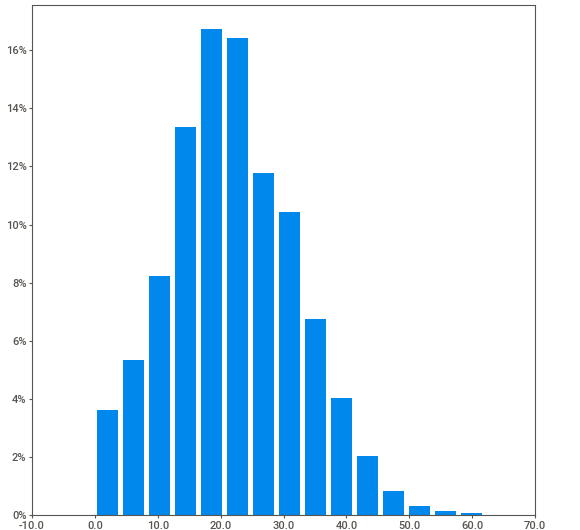
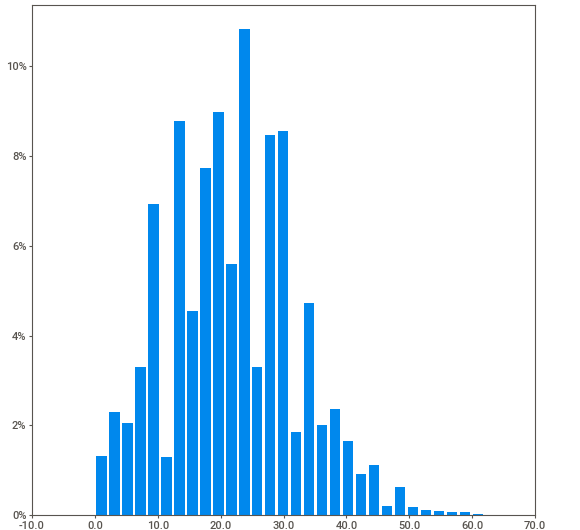
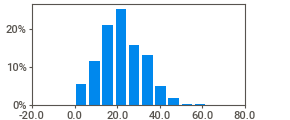
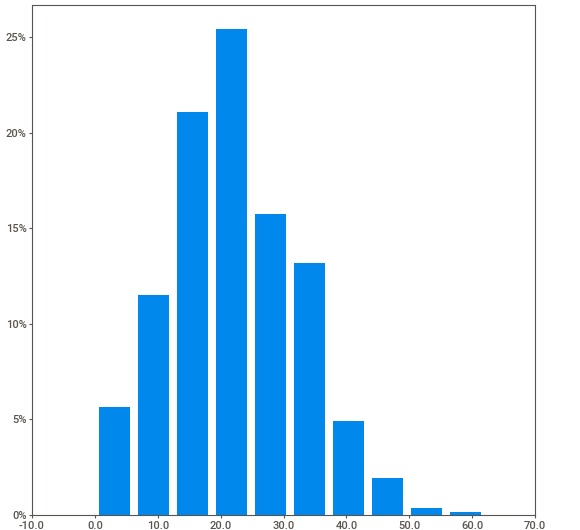
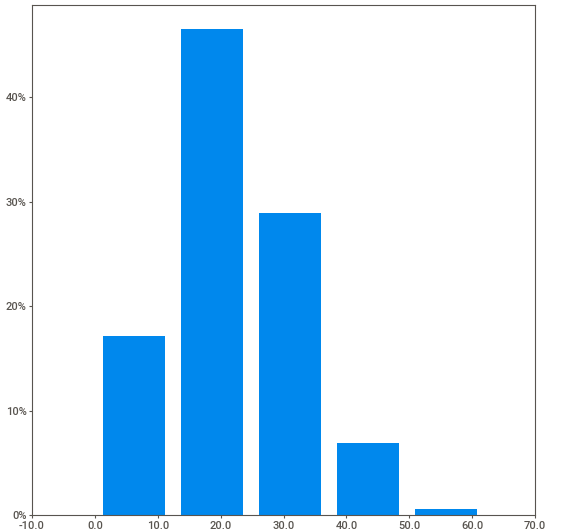
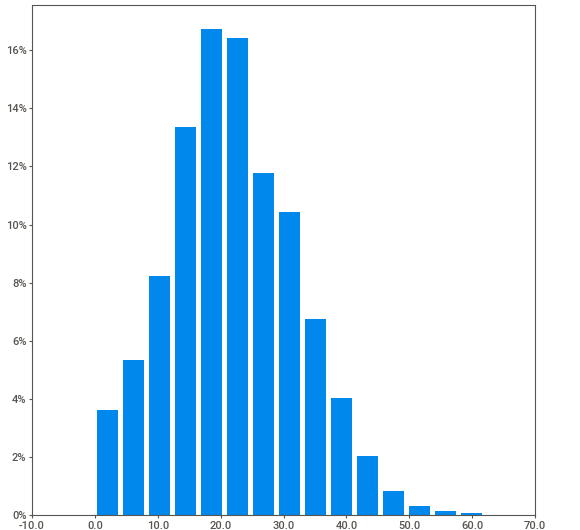
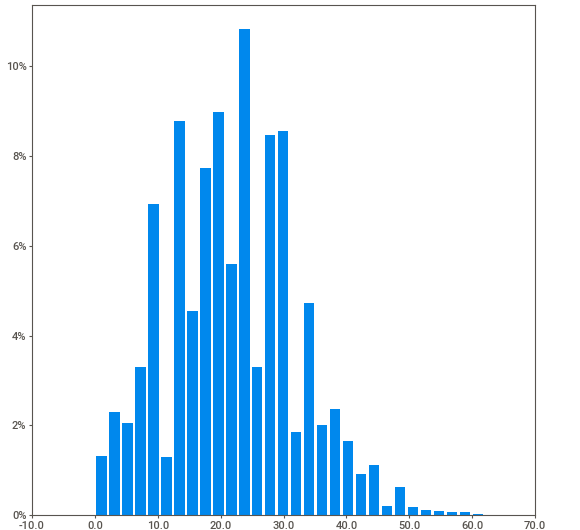
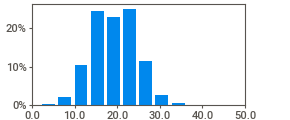
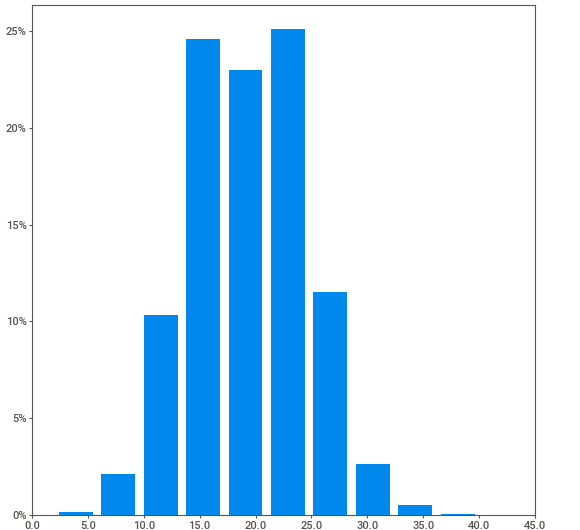
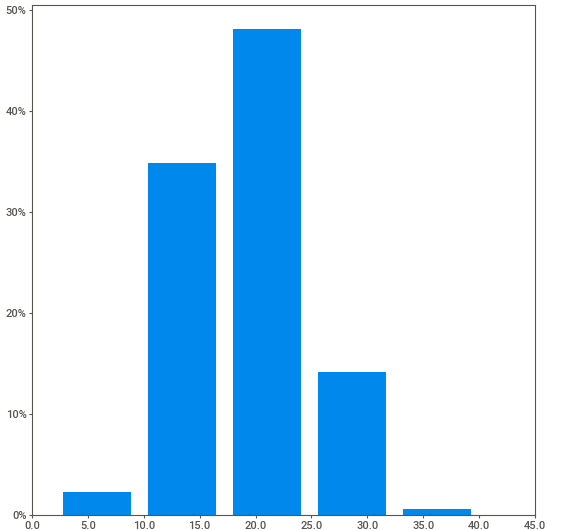
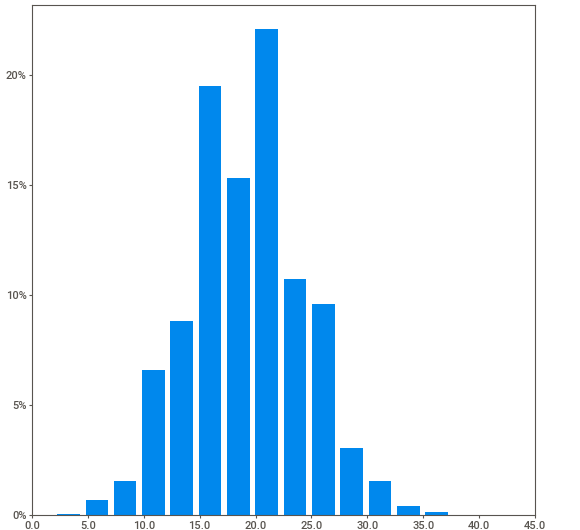
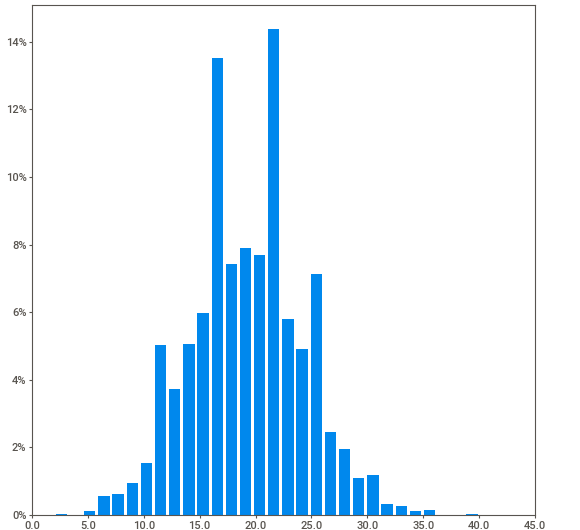
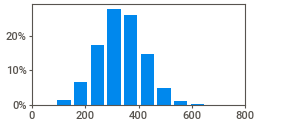
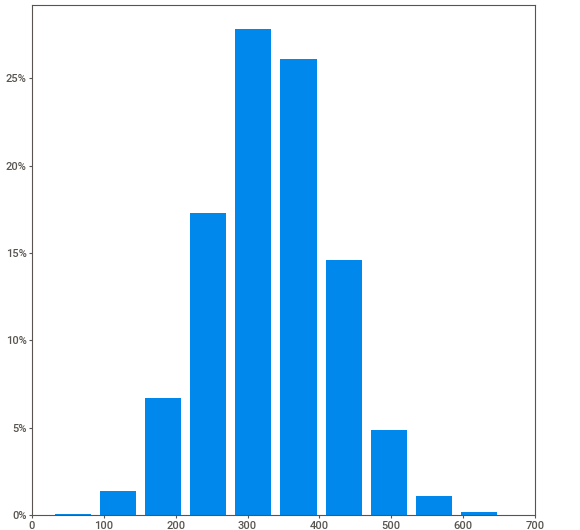
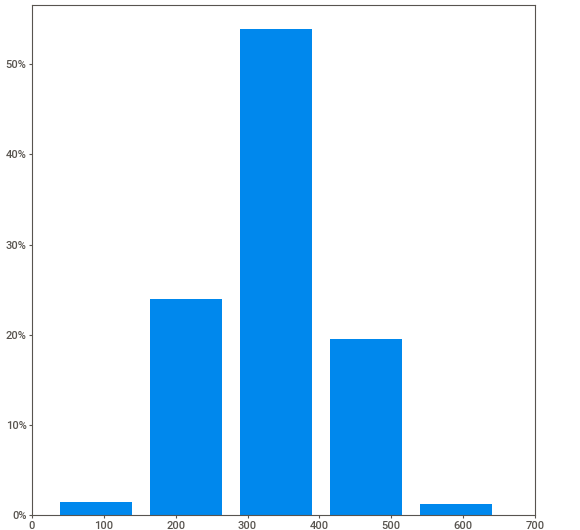
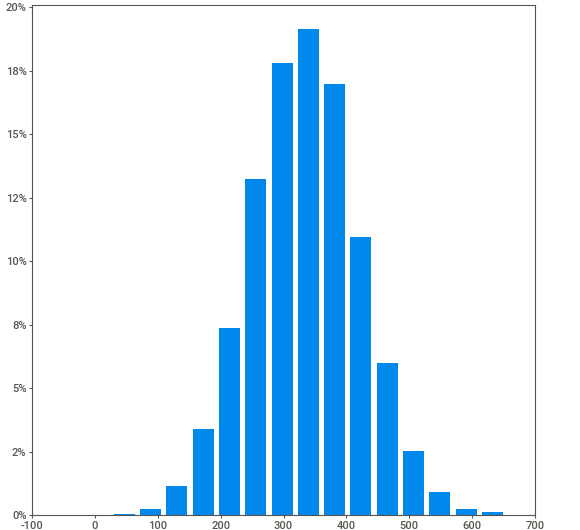
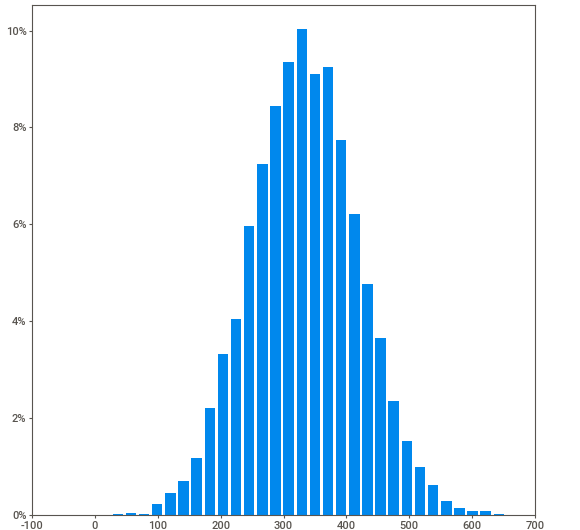
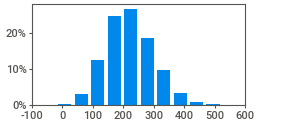
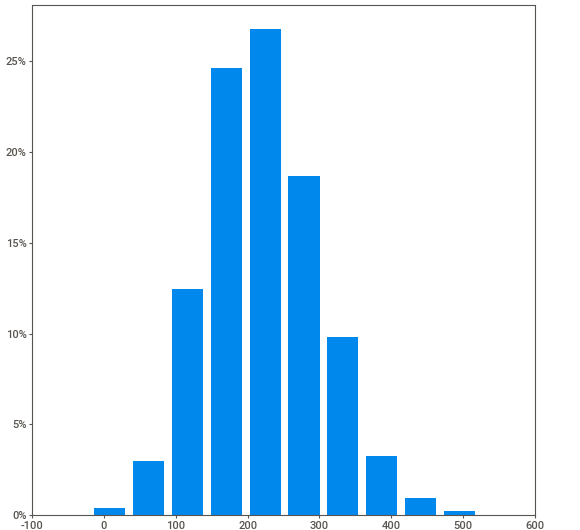
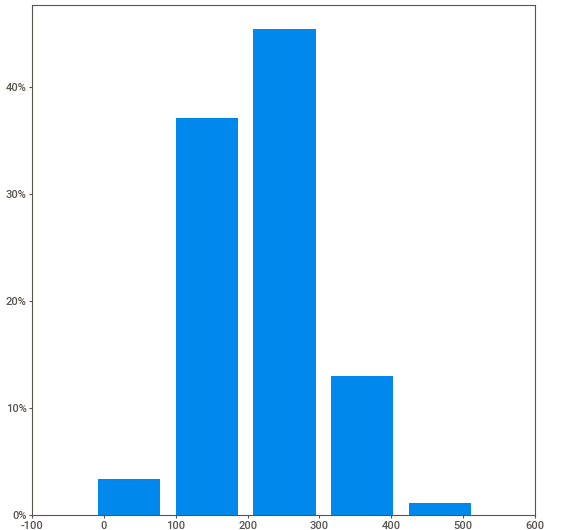
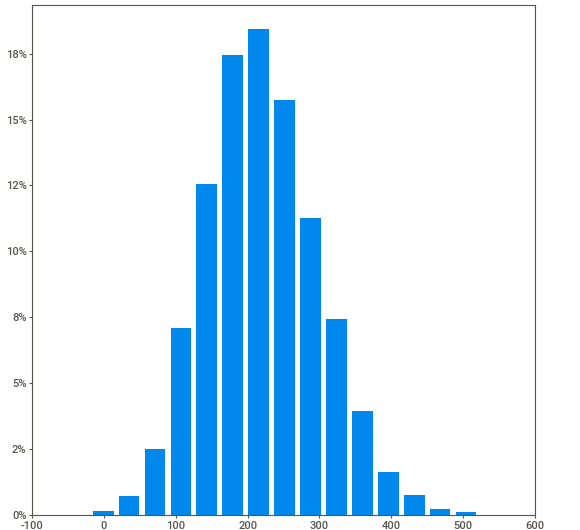
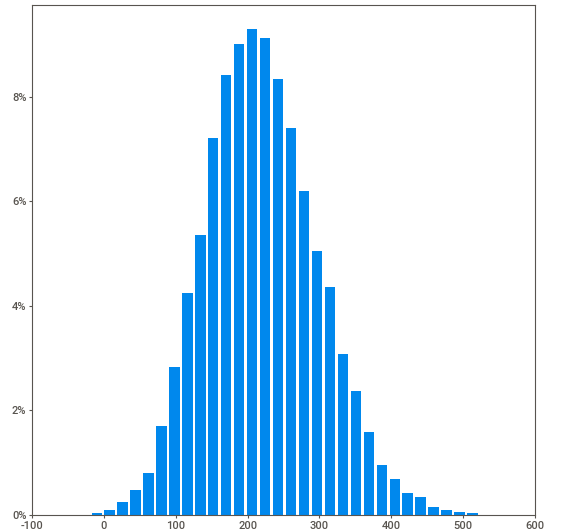
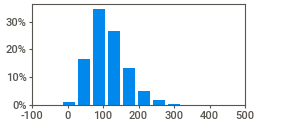
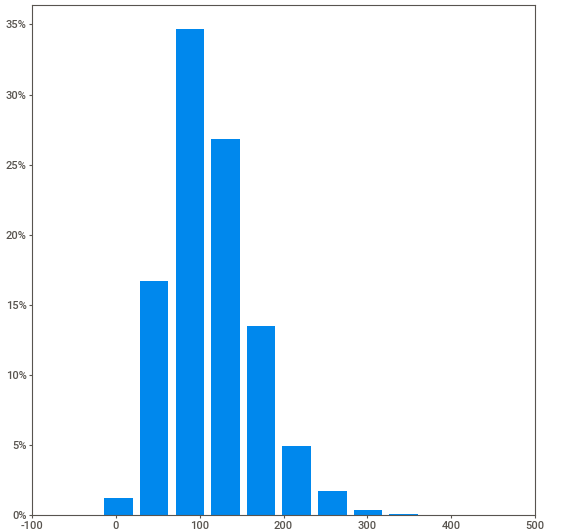
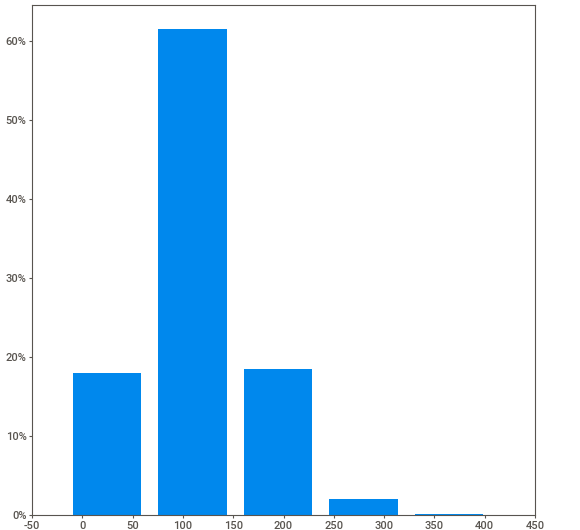
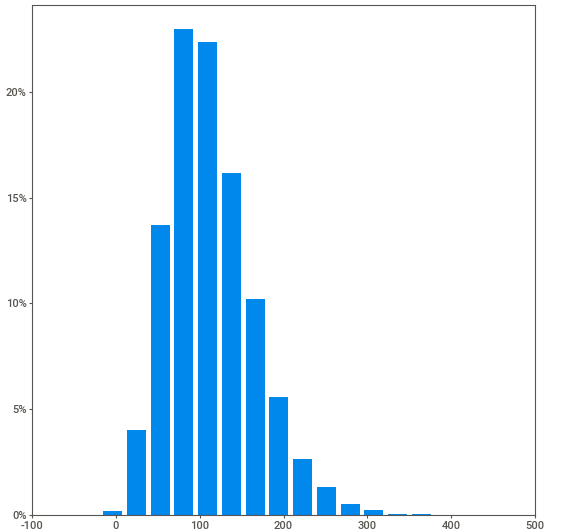
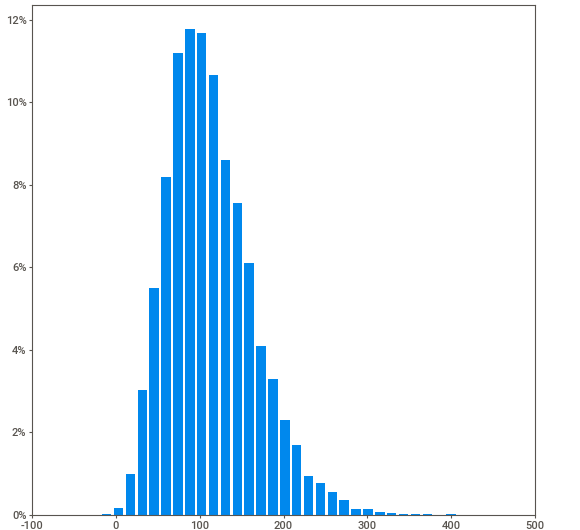
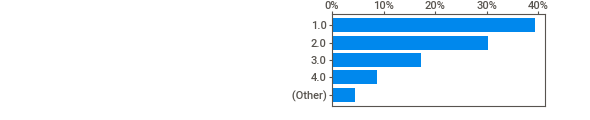
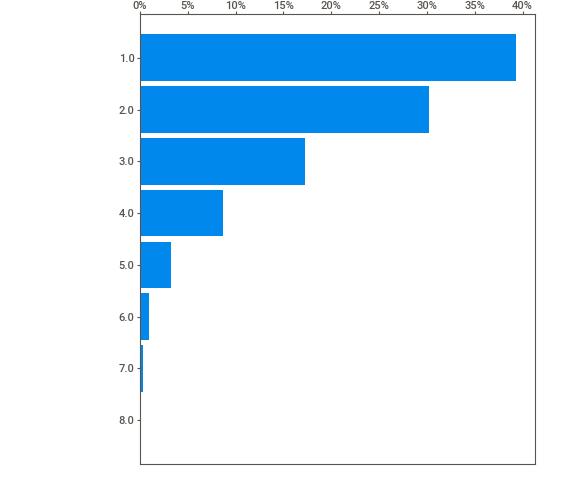
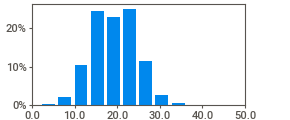
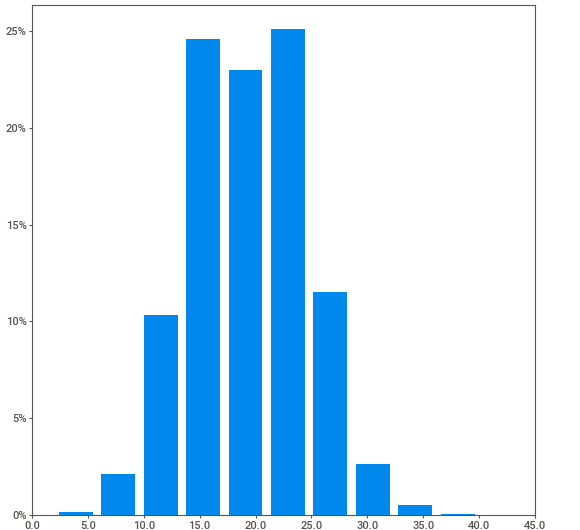
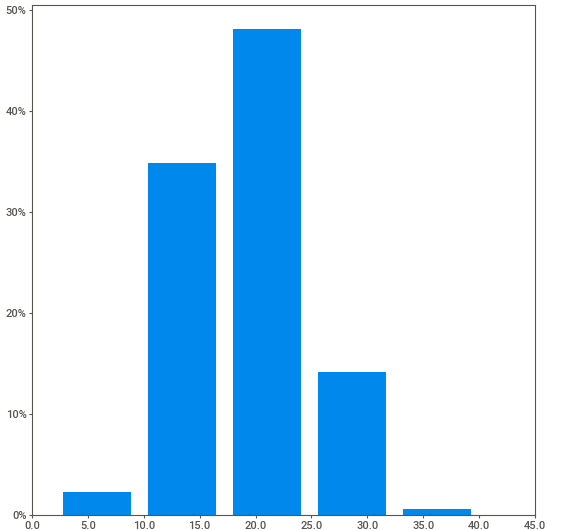
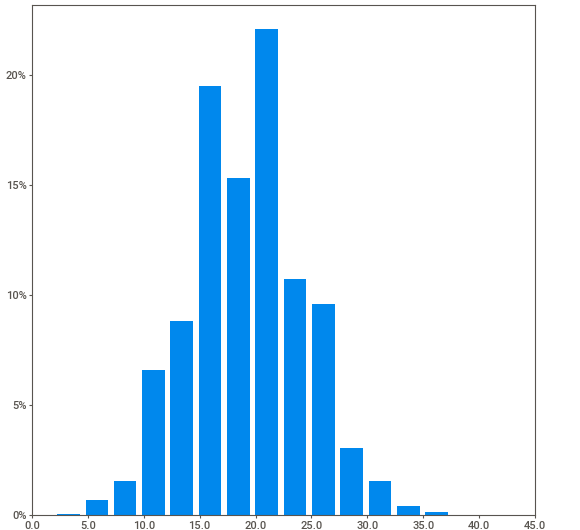
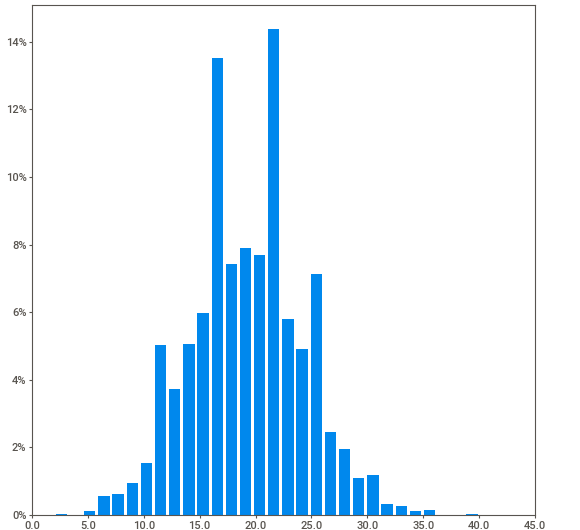
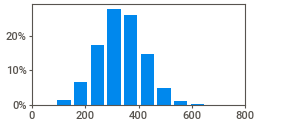
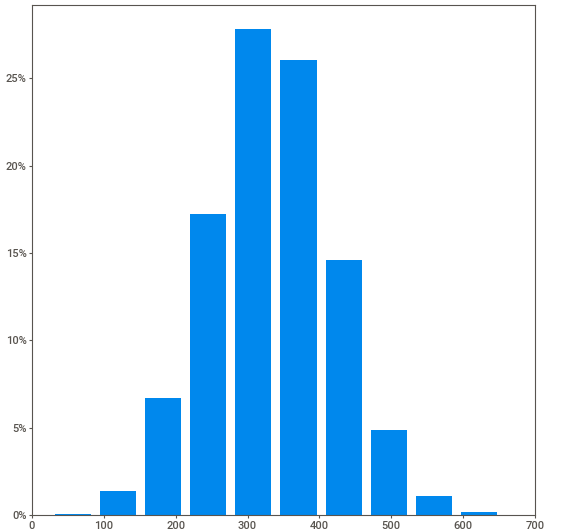
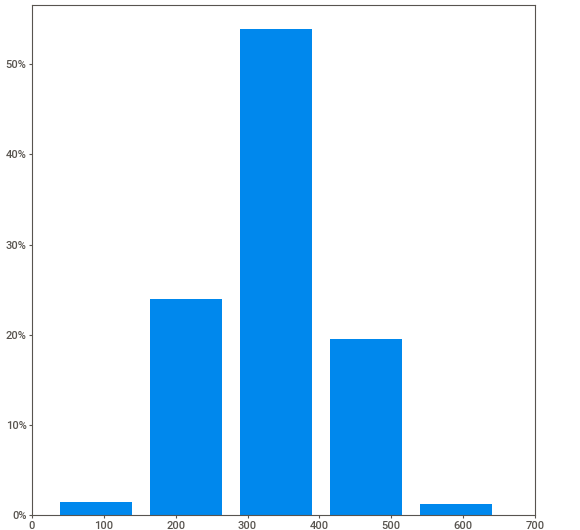
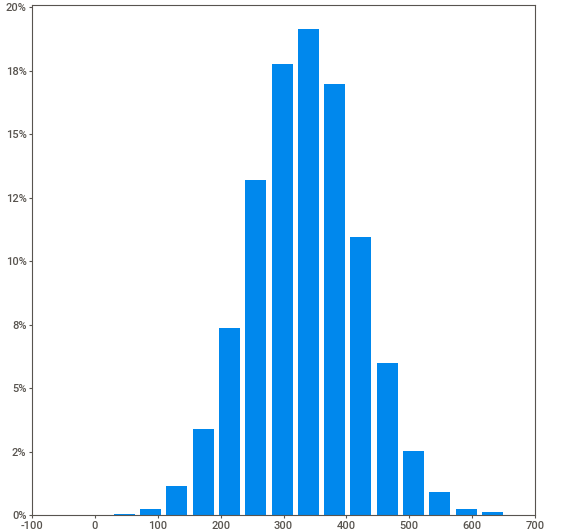
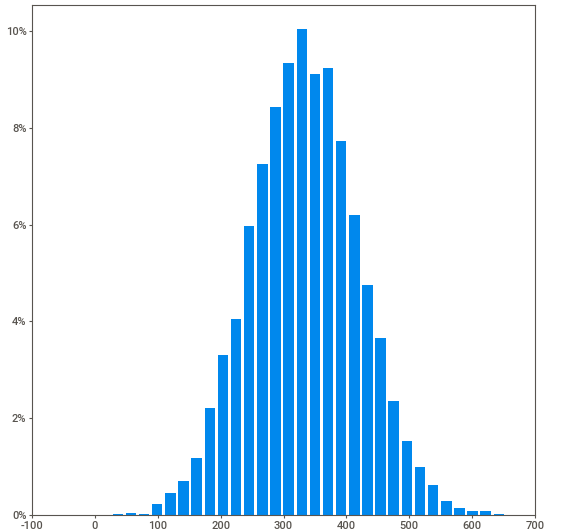
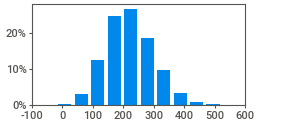
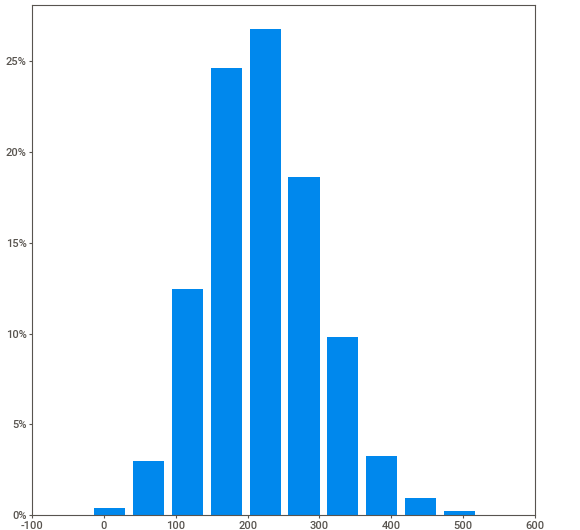
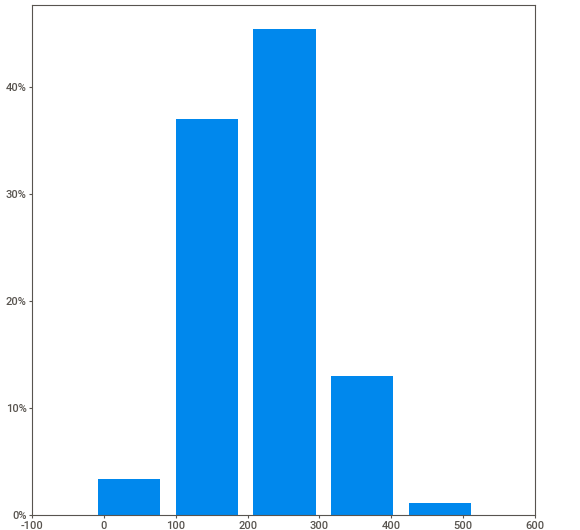
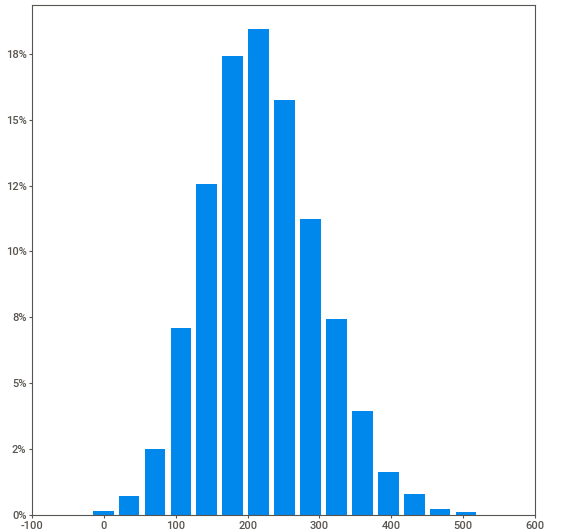
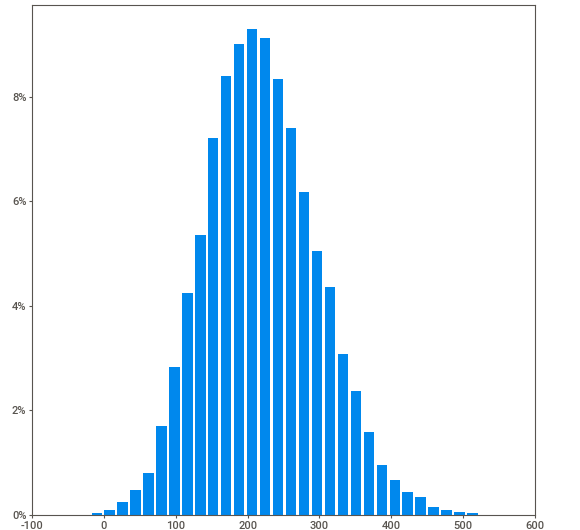
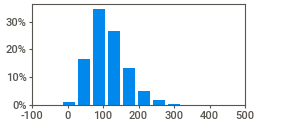
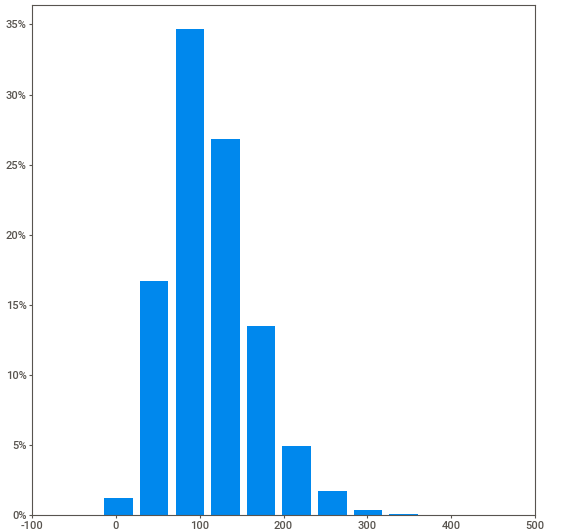
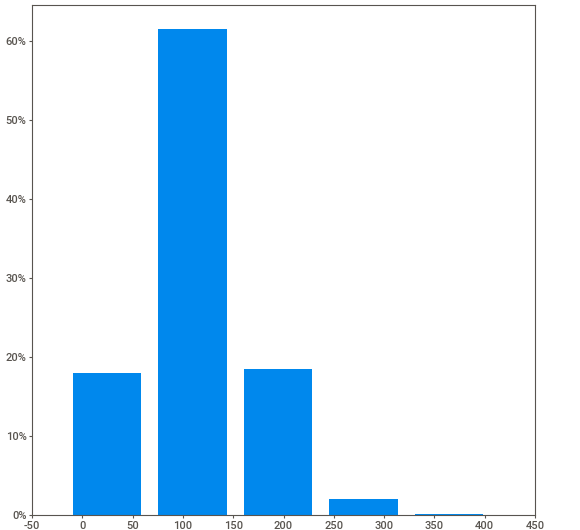
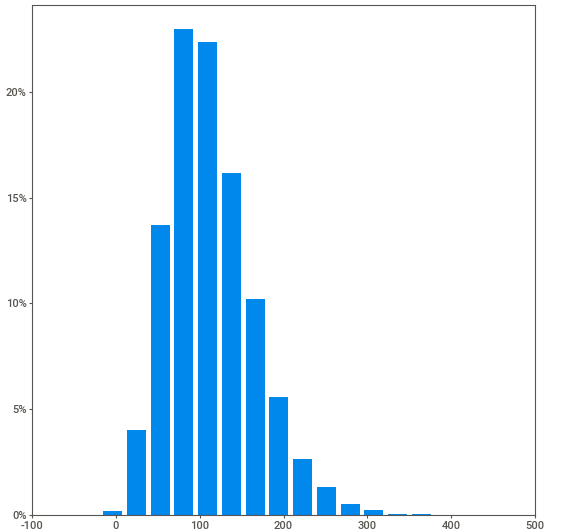
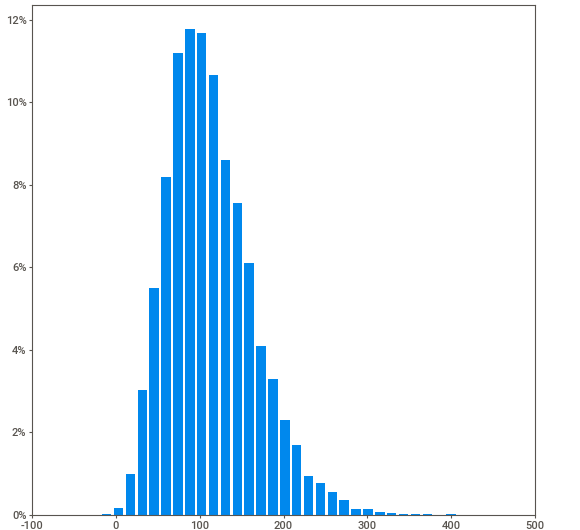
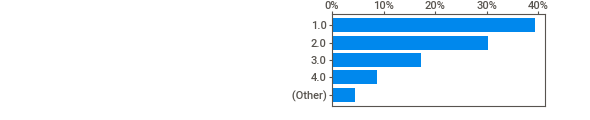
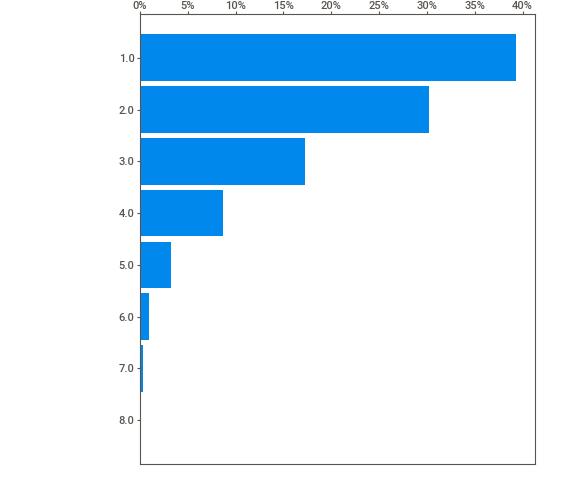
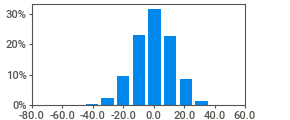
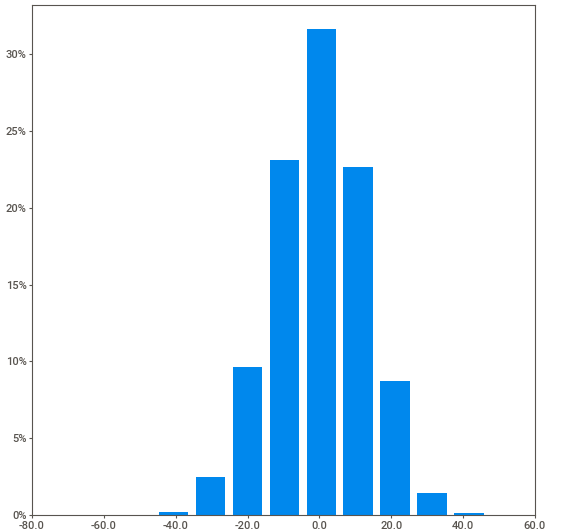
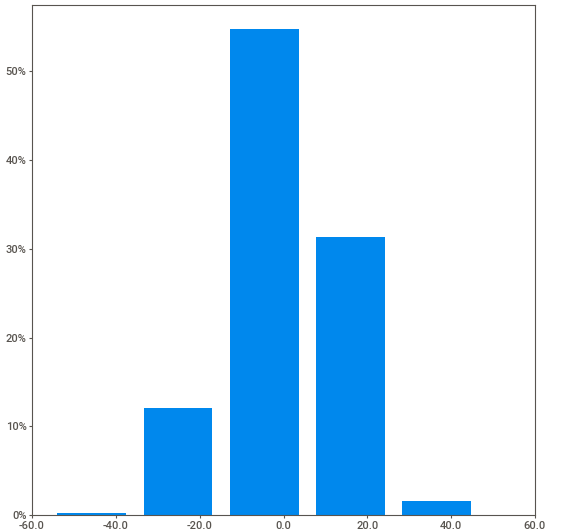
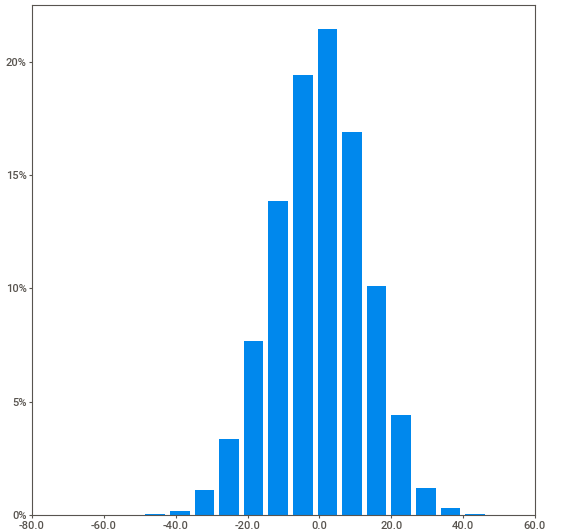
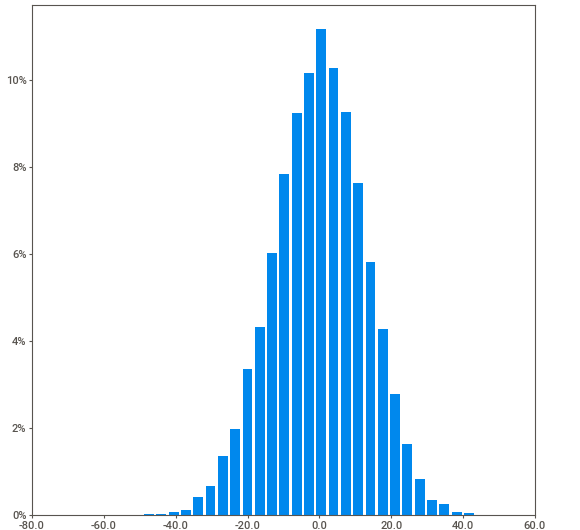
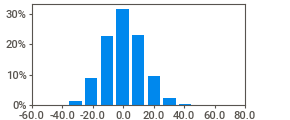
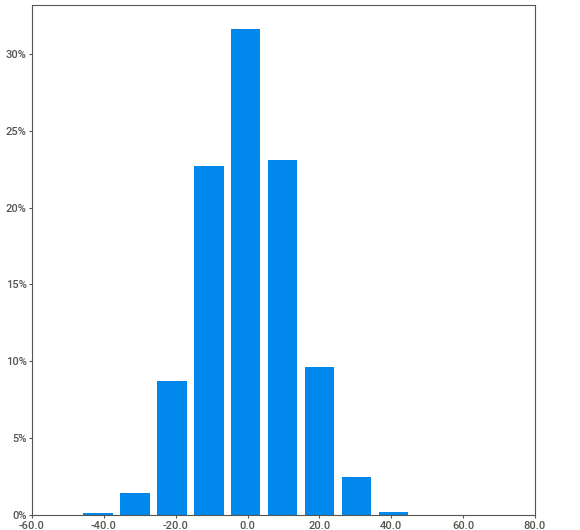
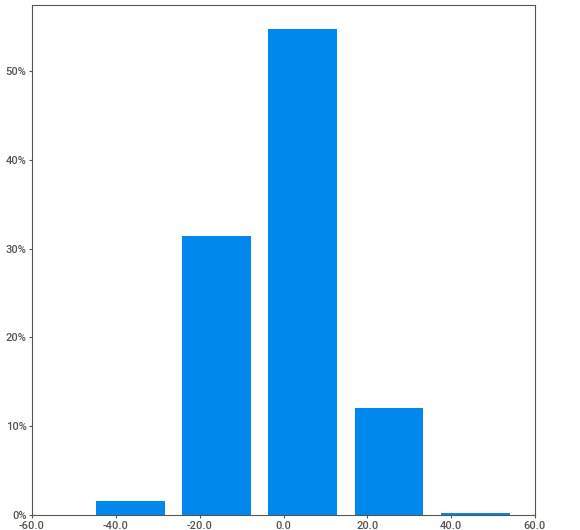
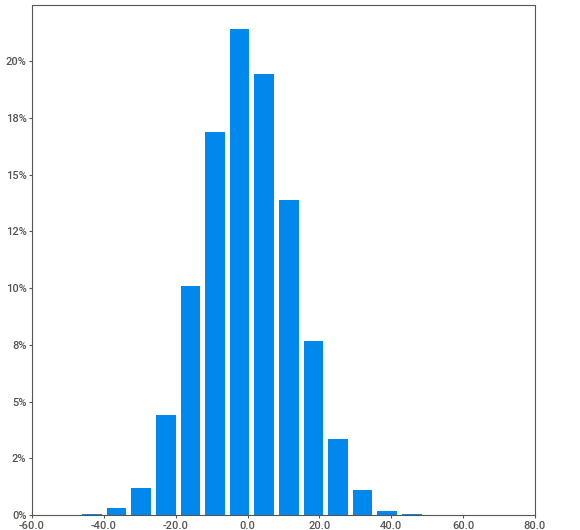
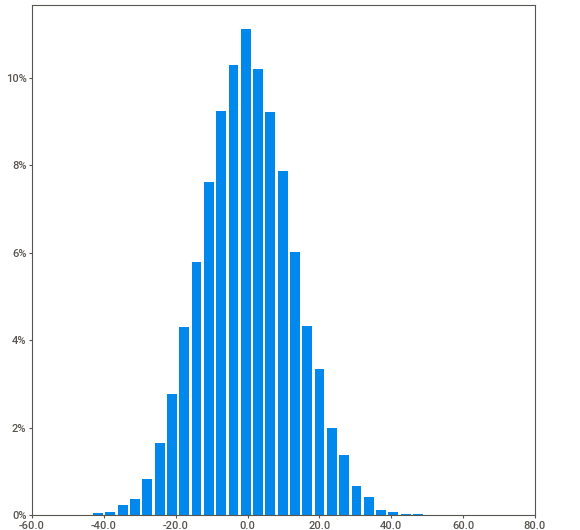
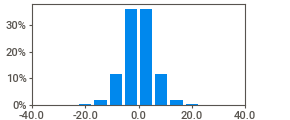
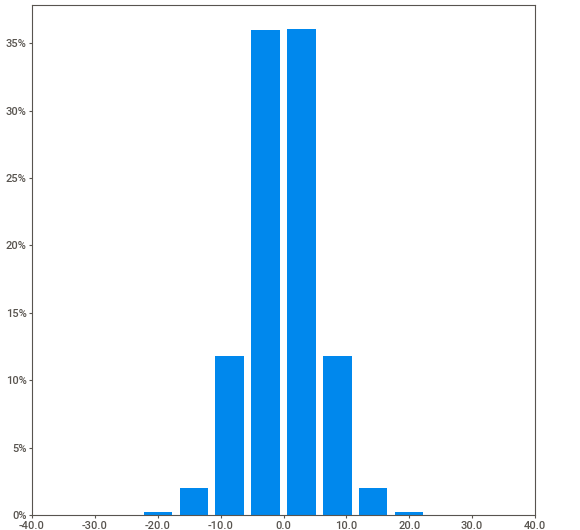
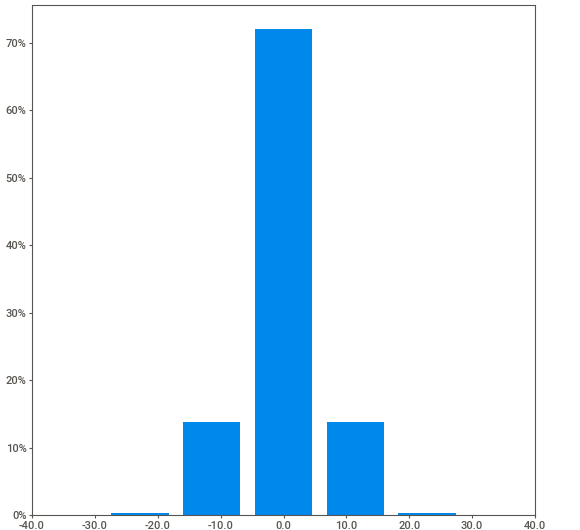
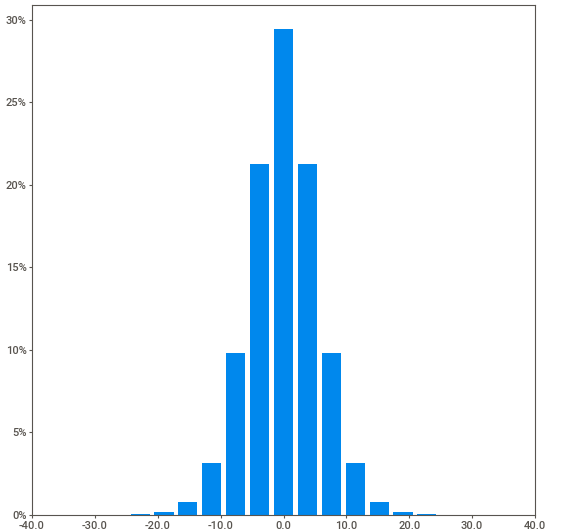
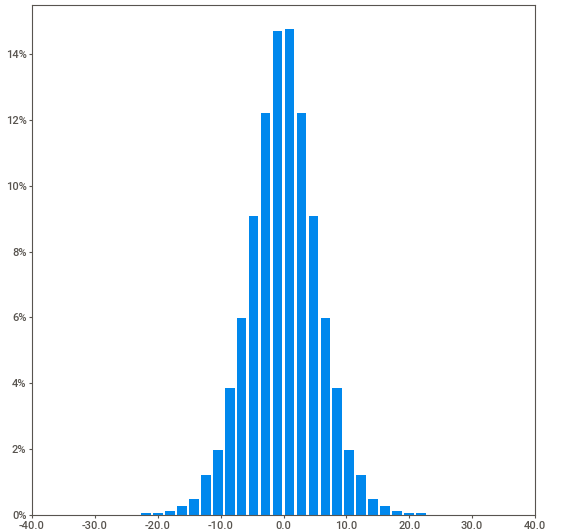
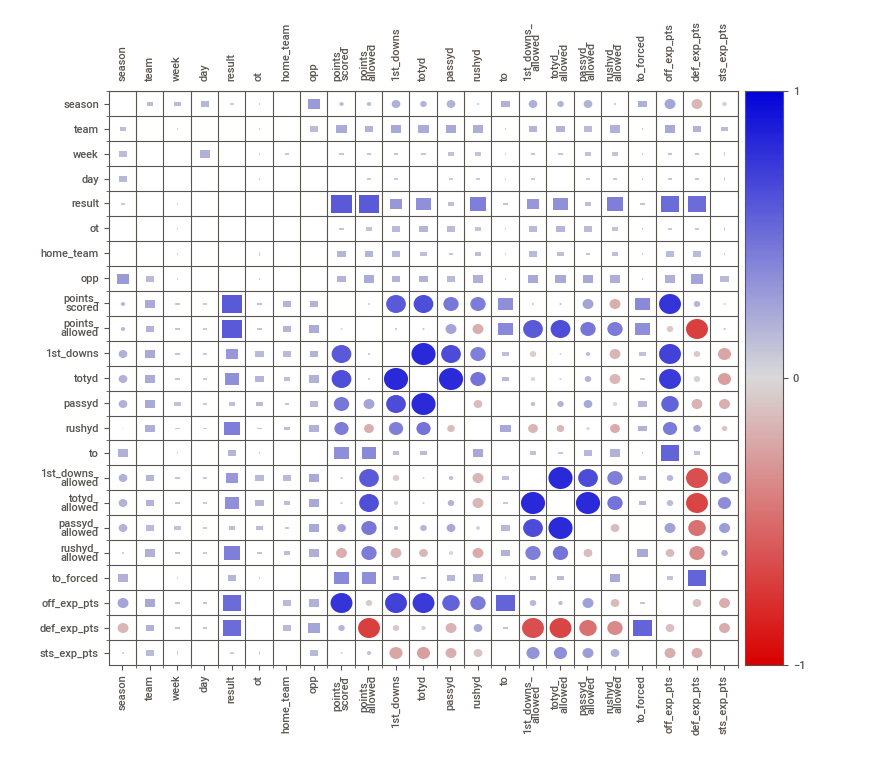
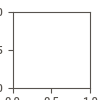

In [9]:
# importing a new library that was recommended to me by my mentor
import sweetviz as sv

df_report = sv.analyze(df)
#df_report.show_html()
df_report.show_notebook()

In [10]:
# compares two dataframes via sweetviz
df_comp = sv.compare(df)

TypeError: compare() missing 1 required positional argument: 'compare'

In [16]:
# another way to get great insights is to use the comparison functionality to split your dataset into 2 sub-populations.
df_comp_intra = sv.compare_intra(df)

TypeError: compare_intra() missing 2 required positional arguments: 'condition_series' and 'names'

### Initial data cleansing

In [17]:
# there are only supposed to be 32 teams in the NFL. some teams have changed their name and/or location.
len(df.opp.unique())

40

In [18]:
# some teams have changed their name and/or location, which created another opponent.
# manually replacing team names.
df.loc[df["opp"] == "Washington Redskins", "opp"] = "Washington Commanders"
df.loc[df["opp"] == "Washington Football Team", "opp"] = "Washington Commanders"
df.loc[df["opp"] == "Oakland Raiders", "opp"] = "Las Vegas Raiders"
df.loc[df["opp"] == "Los Angeles Raiders", "opp"] = "Las Vegas Raiders"
df.loc[df["opp"] == "Houston Oilers", "opp"] = "Tennessee Titans"
df.loc[df["opp"] == "Tennessee Oilers", "opp"] = "Tennessee Titans"
df.loc[df["opp"] == "San Diego Chargers", "opp"] = "Los Angeles Chargers"
df.loc[df["opp"] == "St. Louis Rams", "opp"] = "Los Angeles Rams"

In [19]:
# verifying that there are only 32 teams in the df.opp column now.
len(df.opp.unique())

32

### Converting Missing Values and Categorical Data Types

In [20]:
# convert misc values for columns "home/away" (home team?) and "ot" (overtime) to a binary integer
df.loc[df["home_team"] == "@", "home_team"] = 0
df.loc[df["home_team"] == "N", "home_team"] = 0
df.loc[df["ot"] == "OT", "ot"] = 1

In [21]:
# convert NaN values for columns "home/away" (home team?) to the integer 1.
df['home_team'] = df['home_team'].fillna(1)

In [22]:
# convert NaN values for columns "ot" (overtime), "to" (turnovers), and "to_forced" to the integer 0.
df['ot'] = df['ot'].fillna(0)
df['to'] = df['to'].fillna(0)
df['to_forced'] = df['to_forced'].fillna(0)

In [23]:
# convert playoff games to follow week numbers (wildcard = 19, divisional = 20, and so on... for seasons 2021).
# but remember - before 2021, teams only played 17 week regular seasons, so wildcard would be = to 18 for these years. 
# For the seasons of 2021 and beyond, teams play an 18 week season.
w = []
y = df.loc[df['season'] == 2021]
for i in y['week']:
    if i == 'Wild Card':
        w.append(19)
    elif i == 'Division':
        w.append(20)
    elif i == 'Conf. Champ.':
        w.append(21)
    elif i == 'SuperBowl':
        w.append(23)
    else:
        w.append(int(i))

dfy = df.loc[df['season'] == 2021].assign(week = w)
dfy

season team  week  day          date       time result  ot record  \
248    2021  BUF     1  Sun  September 12  1:00PM ET      0   0    0-1   
249    2021  BUF     2  Sun  September 19  1:00PM ET      1   0    1-1   
250    2021  BUF     3  Sun  September 26  1:00PM ET      1   0    2-1   
251    2021  BUF     4  Sun     October 3  1:00PM ET      1   0    3-1   
252    2021  BUF     5  Sun    October 10  8:20PM ET      1   0    4-1   
..      ...  ...   ...  ...           ...        ...    ...  ..    ...   
813    2021  SEA    14  Sun   December 12  1:00PM ET      1   0    5-8   
814    2021  SEA    15  Tue   December 21  7:00PM ET      0   0    5-9   
815    2021  SEA    16  Sun   December 26  4:05PM ET      0   0   5-10   
816    2021  SEA    17  Sun     January 2  4:25PM ET      1   0   6-10   
817    2021  SEA    18  Sun     January 9  4:25PM ET      1   0   7-10   

     home_team  ... rushyd   to  1st_downs_allowed  totyd_allowed  \
248          1  ...  117.0  1.0               16.0          252.0   
249          0  ...  143.0  2.0               13.0          216.0   
250          1  ...  122.0  0.0               13.0          290.0   
251          1  ...  199.0  1.0                6.0          109.0   
252          0  ...  121.0  0.0               29.0          392.0   
..         ...  ...    ...  ...                ...            ...   
813          0  ...  193.0  0.0               25.0          380.0   
814          0  ...   80.0  1.0               20.0          332.0   
815          1  ...  170.0  0.0               26.0          317.0   
816          1  ...  265.0  0.0               20.0          357.0   
817          0  ...  202.0  2.0               20.0          305.0   

     passyd_allowed  rushyd_allowed  to_forced  off_exp_pts  def_exp_pts  \
248           177.0            75.0        0.0        -3.55         0.54   
249           145.0            71.0        3.0         8.16        24.67   
250           212.0            78.0        3.0        20.55         8.27   
251            61.0            48.0        5.0        14.54        32.68   
252           272.0           120.0        4.0        19.84         1.20   
..              ...             ...        ...          ...          ...   
813           317.0            63.0        0.0        21.71         2.60   
814           209.0           123.0        1.0        -8.13        -4.19   
815           229.0            88.0        0.0         8.31        -7.60   
816           262.0            95.0        3.0        32.32        -3.55   
817           187.0           118.0        1.0        12.83        -0.21   

     sts_exp_pts  
248        -5.01  
249        -0.37  
250        -7.29  
251        -6.40  
252        -1.50  
..           ...  
813        -9.75  
814         3.72  
815        -3.95  
816        -2.68  
817        -1.02  

[570 rows x 26 columns]

In [24]:
# convert playoff games to follow week numbers (wildcard = 19, divisional = 20, and so on... for seasons 2021).
# but remember - before 2021, teams only played 17 week regular seasons, so wildcard would be = to 18 for these years. 
# For the seasons of 2021 and beyond, teams play an 18 week season.
e = []
r = df.loc[df['season'] != 2021]
for i in r['week']:
    if i == 'Wild Card':
        e.append(18)
    elif i == 'Division':
        e.append(19)
    elif i == 'Conf. Champ.':
        e.append(20)
    elif i == 'SuperBowl':
        e.append(22)
    else:
        e.append(int(i))

dfe = df.loc[df['season'] != 2021].assign(week = e)
dfe

season team  week  day          date       time result  ot record  \
0        2022  BUF     1  Thu   September 8  8:20PM ET      1   0    1-0   
1        2022  BUF     2  Mon  September 19  7:15PM ET      1   0    2-0   
2        2022  BUF     3  Sun  September 25  1:00PM ET      0   0    2-1   
3        2022  BUF     4  Sun     October 2  1:00PM ET      1   0    3-1   
4        2022  BUF     5  Sun     October 9  1:00PM ET      1   0    4-1   
...       ...  ...   ...  ...           ...        ...    ...  ..    ...   
14995    1994  LAR    13  Sun   November 27  4:00PM ET      0   0    4-8   
14996    1994  LAR    14  Sun    December 4  4:00PM ET      0   0    4-9   
14997    1994  LAR    15  Sun   December 11  1:00PM ET      0   0   4-10   
14998    1994  LAR    16  Sun   December 18  1:00PM ET      0   0   4-11   
14999    1994  LAR    17  Sat   December 24  4:00PM ET      0   0   4-12   

       home_team  ... rushyd   to  1st_downs_allowed  totyd_allowed  \
0              0  ...  121.0  4.0               19.0          243.0   
1              1  ...  101.0  0.0               12.0          187.0   
2              0  ...  115.0  1.0               15.0          212.0   
3              0  ...  125.0  2.0               22.0          296.0   
4              1  ...  120.0  2.0               23.0          364.0   
...          ...  ...    ...  ...                ...            ...   
14995          0  ...   48.0  5.0               16.0          243.0   
14996          1  ...   75.0  4.0               20.0          328.0   
14997          0  ...   63.0  2.0               17.0          355.0   
14998          0  ...   37.0  1.0               19.0          298.0   
14999          1  ...   77.0  1.0               19.0          288.0   

       passyd_allowed  rushyd_allowed  to_forced  off_exp_pts  def_exp_pts  \
0               191.0            52.0        3.0        13.89        10.29   
1               107.0            80.0        4.0        17.69        18.01   
2               171.0            41.0        0.0        15.88        -7.45   
3               134.0           162.0        2.0         2.10         2.66   
4               310.0            54.0        2.0        20.66         9.42   
...               ...             ...        ...          ...          ...   
14995           129.0           114.0        1.0       -15.08        12.27   
14996           191.0           137.0        1.0        -1.17        -3.52   
14997           230.0           125.0        0.0       -11.84       -12.38   
14998           135.0           163.0        0.0        -1.42        -6.17   
14999           138.0           150.0        1.0        -2.22         4.36   

       sts_exp_pts  
0            -3.96  
1             1.55  
2            -4.86  
3            -1.69  
4             3.54  
...            ...  
14995        -6.03  
14996       -13.22  
14997         5.25  
14998        -8.99  
14999        -3.89  

[14430 rows x 26 columns]

In [25]:
# combining the dataframes back together and sorting based on index.
df = pd.concat([dfy, dfe])
df = df.sort_index()

In [26]:
# game's "result" needs to be converted into an integer
df.loc[df["result"] == "W", "result"] = 1
df.loc[df["result"] == "T", "result"] = 0
df.loc[df["result"] == "L", "result"] = 0

In [27]:
# changing the data types for some of the object columns
df[["result", "home_team"]] = df[["result", "home_team"]].apply(pd.to_numeric)

In [28]:
# dropping bye week rows, playoff rows, etc.
df = df[df['result'].notna()]

In [29]:
# checking how many rows still have missing values in them
df[df.isnull().any(axis=1)]

season team  week  day         date       time  result  ot record  \
6728     2009  NYJ    17  Sun    January 3  8:31PM ET       1   0    9-7   
6779     2009  CIN    17  Sun    January 3  8:31PM ET       0   0   10-6   
10150    2003   LV    17  Sun  December 28  4:15PM ET       0   0   4-12   
10166    2003  LAC    17  Sun  December 28  4:15PM ET       1   0   4-12   

       home_team  ... rushyd   to  1st_downs_allowed  totyd_allowed  \
6728           1  ...  257.0  0.0                5.0           72.0   
6779           0  ...   72.0  3.0               21.0          320.0   
10150          0  ...  141.0  1.0               20.0          337.0   
10166          1  ...  263.0  0.0                9.0          141.0   

       passyd_allowed  rushyd_allowed  to_forced  off_exp_pts  def_exp_pts  \
6728              NaN            72.0        3.0        10.82        33.61   
6779             63.0           257.0        0.0       -33.61       -10.82   
10150            74.0           263.0        0.0       -25.91        -1.64   
10166             NaN           141.0        1.0         1.64        25.91   

       sts_exp_pts  
6728         -6.11  
6779          6.11  
10150        16.75  
10166       -16.75  

[4 rows x 26 columns]

In [30]:
# converting the last four missing values to zero. The net passing yards equaled zero due to sacks.
df['passyd'] = df['passyd'].fillna(0)
df['passyd_allowed'] = df['passyd_allowed'].fillna(0)

In [31]:
# verifying the data types in the df
df.dtypes

season                 int64
team                  object
week                   int64
day                   object
date                  object
time                  object
result                 int64
ot                     int64
record                object
home_team              int64
opp                   object
points_scored        float64
points_allowed       float64
1st_downs            float64
totyd                float64
passyd               float64
rushyd               float64
to                   float64
1st_downs_allowed    float64
totyd_allowed        float64
passyd_allowed       float64
rushyd_allowed       float64
to_forced            float64
off_exp_pts          float64
def_exp_pts          float64
sts_exp_pts          float64
dtype: object

In [32]:
# checking how many rows still have missing values in them
len(df[df.isnull().any(axis=1)])

0

### Converting Date and Time columns

In [33]:
# "day" of the week needs to be converted into an integer.
day_dict = {"Tue":1, "Wed":2, "Thu":3, "Fri":4, "Sat":5, "Sun":6, "Mon":7}

# using the manually created day_dictionary to replace the day of the week.
df = df.replace({"day": day_dict}) 

In [34]:
# date need to be converted into a numerical value (month and day_of_month)
c = []
v = []
for i in df['date']:
    c.append((i.split(' ')[0]))
    v.append(int(i.split(' ')[1]))
df = df.assign(month = c)
df = df.assign(day_of_month = v)

In [35]:
# "month of the year needs to be converted into an integer. NFL games start in August (preseason) and end in February (super bowl).
month_dict = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, 
            "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

# using the manually created day_dictionary to replace the day of the week.
df = df.replace({"month": month_dict}) 

In [36]:
# we can drop the date column after converting it
df = df.drop('date', axis=1)

In [37]:
# time needs to be converted into a numerical value
b = []
for i in df['time']:
    if 'PM' in i:
        b.append(int(i[0]) + 12)
    else:
        b.append(int(i[0]))
df = df.assign(hour = b)

In [38]:
# we can drop the time column after converting it
df = df.drop('time', axis=1)

In [39]:
# record need to be converted into a numerical value (cumulative wins and cumulative losses)
y = []
z = []
for i in df['record']:
    y.append(int(i.split('-')[0]))
    z.append(int(i.split('-')[1]))
df = df.assign(win_count = y)
df = df.assign(loss_count = z)

# we can drop the record column after converting it
df = df.drop('record', axis=1)

In [40]:
################# verify that these numerical codes correspond to the df["team"] #################
# converting opponent's team name to a nurmerical category
# we need to verify that the opp_code matches with the team_code. Each team should be labeled with identical opp and team codes.
df["opp_code"] = df["opp"].astype("category").cat.codes
df["team_code"] = df["team"].astype("category").cat.codes

In [41]:
df.loc[df['team'] == 'LAC'].head(50)

season team  week  day  result  ot  home_team                    opp  \
101     2022  LAC     1    6       1   0          1      Las Vegas Raiders   
102     2022  LAC     2    3       0   0          0     Kansas City Chiefs   
103     2022  LAC     3    6       0   0          1   Jacksonville Jaguars   
104     2022  LAC     4    6       1   0          0         Houston Texans   
105     2022  LAC     5    6       1   0          0       Cleveland Browns   
106     2022  LAC     6    7       1   1          1         Denver Broncos   
107     2022  LAC     7    6       0   0          1       Seattle Seahawks   
499     2021  LAC     1    6       1   0          0  Washington Commanders   
500     2021  LAC     2    6       0   0          1         Dallas Cowboys   
501     2021  LAC     3    6       1   0          0     Kansas City Chiefs   
502     2021  LAC     4    7       1   0          1      Las Vegas Raiders   
503     2021  LAC     5    6       1   0          1       Cleveland Browns   
504     2021  LAC     6    6       0   0          0       Baltimore Ravens   
505     2021  LAC     8    6       0   0          1   New England Patriots   
506     2021  LAC     9    6       1   0          0    Philadelphia Eagles   
507     2021  LAC    10    6       0   0          1      Minnesota Vikings   
508     2021  LAC    11    6       1   0          1    Pittsburgh Steelers   
509     2021  LAC    12    6       0   0          0         Denver Broncos   
510     2021  LAC    13    6       1   0          0     Cincinnati Bengals   
511     2021  LAC    14    6       1   0          1        New York Giants   
512     2021  LAC    15    3       0   1          1     Kansas City Chiefs   
513     2021  LAC    16    6       0   0          0         Houston Texans   
514     2021  LAC    17    6       1   0          1         Denver Broncos   
515     2021  LAC    18    6       0   1          0      Las Vegas Raiders   
1055    2020  LAC     1    6       1   0          0     Cincinnati Bengals   
1056    2020  LAC     2    6       0   1          1     Kansas City Chiefs   
1057    2020  LAC     3    6       0   0          1      Carolina Panthers   
1058    2020  LAC     4    6       0   0          0   Tampa Bay Buccaneers   
1059    2020  LAC     5    7       0   1          0     New Orleans Saints   
1060    2020  LAC     7    6       1   0          1   Jacksonville Jaguars   
1061    2020  LAC     8    6       0   0          0         Denver Broncos   
1062    2020  LAC     9    6       0   0          1      Las Vegas Raiders   
1063    2020  LAC    10    6       0   0          0         Miami Dolphins   
1064    2020  LAC    11    6       1   0          1          New York Jets   
1065    2020  LAC    12    6       0   0          0          Buffalo Bills   
1066    2020  LAC    13    6       0   0          1   New England Patriots   
1067    2020  LAC    14    6       1   0          1        Atlanta Falcons   
1068    2020  LAC    15    3       1   1          0      Las Vegas Raiders   
1069    2020  LAC    16    6       1   0          1         Denver Broncos   
1070    2020  LAC    17    6       1   0          0     Kansas City Chiefs   
1607    2019  LAC     1    6       1   1          1     Indianapolis Colts   
1608    2019  LAC     2    6       0   0          0          Detroit Lions   
1609    2019  LAC     3    6       0   0          1         Houston Texans   
1610    2019  LAC     4    6       1   0          0         Miami Dolphins   
1611    2019  LAC     5    6       0   0          1         Denver Broncos   
1612    2019  LAC     6    6       0   0          1    Pittsburgh Steelers   
1613    2019  LAC     7    6       0   0          0       Tennessee Titans   
1614    2019  LAC     8    6       1   0          0          Chicago Bears   
1615    2019  LAC     9    6       1   0          1      Green Bay Packers   
1616    2019  LAC    10    3       0   0          0      Las Vegas Raiders   

      points_scored  points

In [42]:
# we can drop the opp and team columns after converting it into numerical codes.
df = df.drop('opp', axis=1)
df = df.drop('team', axis=1)

In [43]:
# Reordering the columns to my preference
cols = df.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:3] + cols[-7:-1] + cols[3:-7]
df = df[cols]
df

season  team_code  week  day  month  day_of_month  hour  win_count  \
0        2022          3     1    3      9             8    20          1   
1        2022          3     2    7      9            19    19          2   
2        2022          3     3    6      9            25    13          2   
3        2022          3     4    6     10             2    13          3   
4        2022          3     5    6     10             9    13          4   
...       ...        ...   ...  ...    ...           ...   ...        ...   
14995    1994         17    13    6     11            27    16          4   
14996    1994         17    14    6     12             4    16          4   
14997    1994         17    15    6     12            11    13          4   
14998    1994         17    16    6     12            18    13          4   
14999    1994         17    17    5     12            24    16          4   

       loss_count  opp_code  ...  rushyd   to  1st_downs_allowed  \
0               0        18  ...   121.0  4.0               19.0   
1               0        30  ...   101.0  0.0               12.0   
2               1        19  ...   115.0  1.0               15.0   
3               1         2  ...   125.0  2.0               22.0   
4               1        26  ...   120.0  2.0               23.0   
...           ...       ...  ...     ...  ...                ...   
14995           8        17  ...    48.0  5.0               16.0   
14996           9        22  ...    75.0  4.0               20.0   
14997          10        29  ...    63.0  2.0               17.0   
14998          11         5  ...    37.0  1.0               19.0   
14999          12        31  ...    77.0  1.0               19.0   

       totyd_allowed  passyd_allowed  rushyd_allowed  to_forced  off_exp_pts  \
0              243.0           191.0            52.0        3.0        13.89   
1              187.0           107.0            80.0        4.0        17.69   
2              212.0           171.0            41.0        0.0        15.88   
3              296.0           134.0           162.0        2.0         2.10   
4              364.0           310.0            54.0        2.0        20.66   
...              ...             ...             ...        ...          ...   
14995          243.0           129.0           114.0        1.0       -15.08   
14996          328.0           191.0           137.0        1.0        -1.17   
14997          355.0           230.0           125.0        0.0       -11.84   
14998          298.0           135.0           163.0        0.0        -1.42   
14999          288.0           138.0           150.0        1.0        -2.22   

       def_exp_pts  sts_exp_pts  
0            10.29        -3.96  
1            18.01         1.55  
2            -7.45        -4.86  
3             2.66        -1.69  
4             9.42         3.54  
...            ...          ...  
14995        12.27        -6.03  
14996        -3.52       -13.22  
14997       -12.38         5.25  
14998        -6.17        -8.99  
14999         4.36        -3.89  

[15000 rows x 28 columns]

In [44]:
df.dtypes

season                 int64
team_code               int8
week                   int64
day                    int64
month                  int64
day_of_month           int64
hour                   int64
win_count              int64
loss_count             int64
opp_code                int8
result                 int64
ot                     int64
home_team              int64
points_scored        float64
points_allowed       float64
1st_downs            float64
totyd                float64
passyd               float64
rushyd               float64
to                   float64
1st_downs_allowed    float64
totyd_allowed        float64
passyd_allowed       float64
rushyd_allowed       float64
to_forced            float64
off_exp_pts          float64
def_exp_pts          float64
sts_exp_pts          float64
dtype: object

### Feature Engineering

In [45]:
# the goal is to obtain a new column that contains rolling_averages for a team over the last four games.
# should the end of a season reset the rolling percentage??? Yes
# creating a df that is organized at the team and season level
grouped_teams = df.groupby(["team_code", "season"])

In [46]:
# viewing one instance
group1 = grouped_teams.get_group((1, 2021))
group1

season  team_code  week  day  month  day_of_month  hour  win_count  \
708    2021          1     1    6      9            12    13          0   
709    2021          1     2    6      9            19    16          0   
710    2021          1     3    6      9            26    13          1   
711    2021          1     4    6     10             3    13          1   
712    2021          1     5    6     10            10     9          2   
713    2021          1     7    6     10            24    13          3   
714    2021          1     8    6     10            31    13          3   
715    2021          1     9    6     11             7    13          4   
716    2021          1    10    6     11            14    13          4   
717    2021          1    11    3     11            18    20          4   
718    2021          1    12    6     11            28    13          5   
719    2021          1    13    6     12             5    13          5   
720    2021          1    14    6     12            12    13          6   
721    2021          1    15    6     12            19    16          6   
722    2021          1    16    6     12            26    13          7   
723    2021          1    17    6      1             2    13          7   
724    2021          1    18    6      1             9    13          7   

     loss_count  opp_code  ...  rushyd   to  1st_downs_allowed  totyd_allowed  \
708           1        25  ...   124.0  0.0               24.0          434.0   
709           2        29  ...    55.0  3.0               21.0          341.0   
710           2        23  ...    69.0  1.0               21.0          346.0   
711           3        31  ...    99.0  0.0               26.0          412.0   
712           3        24  ...   108.0  2.0               17.0          230.0   
713           3        19  ...    72.0  2.0               27.0          413.0   
714           4         4  ...    82.0  2.0               21.0          332.0   
715           4        22  ...    34.0  0.0               26.0          376.0   
716           5         8  ...   103.0  3.0               22.0          431.0   
717           6        21  ...    40.0  4.0               20.0          308.0   
718           6        14  ...   149.0  1.0               20.0          357.0   
719           7        29  ...   121.0  1.0               25.0          425.0   
720           7         4  ...   128.0  1.0               21.0          334.0   
721           8        27  ...    62.0  1.0               23.0          397.0   
722           8        10  ...    47.0  1.0               19.0          338.0   
723           9         3  ...    96.0  1.0               28.0          351.0   
724          10        22  ...    62.0  3.0               22.0          369.0   

     passyd_allowed  rushyd_allowed  to_forced  off_exp_pts  def_exp_pts  \
708           261.0           173.0        0.0       -12.48       -13.14   
709           259.0            82.0        1.0       -15.96        -8.63   
710           246.0           100.0        1.0         2.10        -2.33   
711           290.0           122.0        0.0        19.36       -18.15   
712           166.0            64.0        1.0        17.36        -3.20   
713           281.0           132.0        2.0        10.55       -10.04   
714           129.0           203.0        1.0        -2.84        -0.86   
715           267.0           109.0        1.0         7.33        -1.35   
716           317.0           114.0        1.0       -22.40       -16.18   
717           174.0           134.0        1.0       -25.53         0.69   
718           216.0           141.0        2.0         6.47         0.52   
719           368.0            57.0        1.0         5.45       -17.18   
720           243.0            91.0        3.0         4.15         5.38   
721           235.0           162.0        1.0        -9.41       -20.53   
722           208.0           130.0        1.0         

In [47]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values(["team_code", "season"], ascending=[False, True])
    rolling_stats = group[cols].rolling(4).mean() # closed='left' inside rolling parameters
    # the problem is that it is using the fourth games' info to predict the fourth game and beyond.
    # closed='left' would solve this problem, but that requires datetime. How do I resolve this???
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [48]:
cols = ["result", "points_scored", "points_allowed",
        "totyd", "to", "totyd_allowed", "to_forced",
        "off_exp_pts", "def_exp_pts", "sts_exp_pts"]

new_cols = [f"{c}_rolling" for c in cols]

In [49]:
# first four weeks are being dropped because of na values from rolling(4)
# should we bring datetime back??
rolling_averages(group1, cols, new_cols)

season  team_code  week  day  month  day_of_month  hour  win_count  \
711    2021          1     4    6     10             3    13          1   
712    2021          1     5    6     10            10     9          2   
713    2021          1     7    6     10            24    13          3   
714    2021          1     8    6     10            31    13          3   
715    2021          1     9    6     11             7    13          4   
716    2021          1    10    6     11            14    13          4   
717    2021          1    11    3     11            18    20          4   
718    2021          1    12    6     11            28    13          5   
719    2021          1    13    6     12             5    13          5   
720    2021          1    14    6     12            12    13          6   
721    2021          1    15    6     12            19    16          6   
722    2021          1    16    6     12            26    13          7   
723    2021          1    17    6      1             2    13          7   
724    2021          1    18    6      1             9    13          7   

     loss_count  opp_code  ...  result_rolling  points_scored_rolling  \
711           3        31  ...            0.25                  19.50   
712           3        24  ...            0.50                  24.75   
713           3        19  ...            0.75                  26.00   
714           4         4  ...            0.50                  25.00   
715           4        22  ...            0.75                  24.25   
716           5         8  ...            0.50                  18.25   
717           6        21  ...            0.25                  10.75   
718           6        14  ...            0.50                  12.75   
719           7        29  ...            0.25                  10.25   
720           7         4  ...            0.50                  16.75   
721           8        27  ...            0.50                  20.00   
722           8        10  ...            0.50                  19.75   
723           9         3  ...            0.50                  19.25   
724          10        22  ...            0.25                  17.00   

     points_allowed_rolling  totyd_rolling  to_rolling  totyd_allowed_rolling  \
711                   32.00         319.50        1.00                 383.25   
712                   29.00         367.00        1.50                 332.25   
713                   24.00         379.25        1.25                 350.25   
714                   25.25         358.50        1.50                 346.75   
715                   23.00         356.50        1.50                 337.75   
716                   28.75         297.50        1.75                 388.00   
717                   28.00         239.50        2.25                 361.75   
718                   26.75         269.25        2.00                 368.00   
719                   28.00         272.75        2.25                 380.25   
720                   22.50         298.75        1.75                 356.00   
721                   24.00         326.25        1.00                 378.25   
722                   24.50         306.75        1.00                 373.50   
723                   24.25         278.00        1.00                 355.00   
724                   26.50         262.75        1.50                 363.75   

     to_forced_rolling  off_exp_pts_rolling  def_exp_pts_rolling  \
711               0.50              -1.7450             -10.5625   
712               0.75               5.7150              -8.0775   
713               1.00              12.3425              -8.4300   
714               1.00              11.1075              -8.0625   
715               1.25               8.1000              -3.8625   
716               1.25              -1.8400              -7.1075   
717               1.00             -10.8600              -4.4250   
718               1.25 

In [50]:
#apply the new rolling_averages columns to each group
df_rolling = df.groupby(["team_code", "season"]).apply(lambda x: rolling_averages(x, cols, new_cols))

In [51]:
df_rolling

season  team_code  week  day  month  day_of_month  \
team_code season                                                            
0         1994   14802    1994          0     5    6     10             2   
                 14803    1994          0     6    6     10             9   
                 14804    1994          0     7    6     10            16   
                 14805    1994          0     8    6     10            23   
                 14806    1994          0     9    6     10            30   
...                        ...        ...   ...  ...    ...           ...   
31        2022   150      2022         31     4    6     10             2   
                 151      2022         31     5    6     10             9   
                 152      2022         31     6    3     10            13   
                 153      2022         31     7    6     10            23   
                 154      2022         31     8    6     10            30   

                        hour  win_count  loss_count  opp_code  ...  \
team_code season                                               ...   
0         1994   14802    16          1           3        20  ...   
                 14803    16          1           4         8  ...   
                 14804    13          2           4        31  ...   
                 14805    16          2           5         8  ...   
                 14806    20          3           5        26  ...   
...                      ...        ...         ...       ...  ...   
31        2022   150      13          1           3         8  ...   
                 151      13          1           4        30  ...   
                 152      20          2           4         5  ...   
                 153      13          3           4        11  ...   
                 154      16          4           4        13  ...   

                        result_rolling  points_scored_rolling  \
team_code season                                                
0         1994   14802            0.25                  11.50   
                 14803            0.25                   9.25   
                 14804            0.50                   9.75   
                 14805            0.50                  15.00   
                 14806            0.50                  15.75   
...                                ...                    ...   
31        2022   150              0.25                  18.25   
                 151              0.00                  15.50   
                 152              0.25                  11.75   
                 153              0.50                  15.50   
                 154              0.75                  17.25   

                        points_allowed_rolling  totyd_rolling  to_rolling  \
team_code season                                                            
0         1994   14802                   18.25         258.75        2.75   
                 14803                   24.25         255.50        3.25   
                 14804                   23.25         293.00        3.25   
                 14805                   22.25         292.25        2.50   
                 14806                   24.75         298.75        2.25   
...                                        ...            ...         ...   
31        2022   150                     26.75         330.75        1.75   
                 151                     26.50         329.50        1.25   
                 152                     19.25         284.00        1.00   
                 153                     18.50         315.00        1.00   
                 154                     16.25         331.25        0.75   

                        totyd_allowed_rolling  to_forced_rolling  \
team_code season                                                   
0         1994   14802                 259.50               2.50   
                 14803                 309.25              

In [52]:
# dropping extra index levels
df_rolling = df_rolling.droplevel('team_code')
df_rolling = df_rolling.droplevel('season')
df_rolling

season  team_code  week  day  month  day_of_month  hour  win_count  \
14802    1994          0     5    6     10             2    16          1   
14803    1994          0     6    6     10             9    16          1   
14804    1994          0     7    6     10            16    13          2   
14805    1994          0     8    6     10            23    16          2   
14806    1994          0     9    6     10            30    20          3   
...       ...        ...   ...  ...    ...           ...   ...        ...   
150      2022         31     4    6     10             2    13          1   
151      2022         31     5    6     10             9    13          1   
152      2022         31     6    3     10            13    20          2   
153      2022         31     7    6     10            23    13          3   
154      2022         31     8    6     10            30    16          4   

       loss_count  opp_code  ...  result_rolling  points_scored_rolling  \
14802           3        20  ...            0.25                  11.50   
14803           4         8  ...            0.25                   9.25   
14804           4        31  ...            0.50                   9.75   
14805           5         8  ...            0.50                  15.00   
14806           5        26  ...            0.50                  15.75   
...           ...       ...  ...             ...                    ...   
150             3         8  ...            0.25                  18.25   
151             4        30  ...            0.00                  15.50   
152             4         5  ...            0.25                  11.75   
153             4        11  ...            0.50                  15.50   
154             4        13  ...            0.75                  17.25   

       points_allowed_rolling  totyd_rolling  to_rolling  \
14802                   18.25         258.75        2.75   
14803                   24.25         255.50        3.25   
14804                   23.25         293.00        3.25   
14805                   22.25         292.25        2.50   
14806                   24.75         298.75        2.25   
...                       ...            ...         ...   
150                     26.75         330.75        1.75   
151                     26.50         329.50        1.25   
152                     19.25         284.00        1.00   
153                     18.50         315.00        1.00   
154                     16.25         331.25        0.75   

       totyd_allowed_rolling  to_forced_rolling  off_exp_pts_rolling  \
14802                 259.50               2.50             -14.1225   
14803                 309.25               2.00             -16.9475   
14804                 316.25               2.75             -17.5550   
14805                 313.75               2.25             -10.5900   
14806                 303.50               2.00             -10.1350   
...                      ...                ...                  ...   
150                   371.75               0.25              -4.0950   
151                   336.25               0.00              -6.2225   
152                   327.75               0.50              -9.4900   
153                   285.75               0.75              -4.7425   
154                   297.00               1.25              -0.7925   

       def_exp_pts_rolling  sts_exp_pts_rolling  
14802               7.6750               2.9600  
14803               0.2700               3.9425  
14804               7.3875               1.8750  
14805               5.3700               2.3050  
14806               3.6550               0.7575  
...                    ...                  ...  
150                -6.1525               0.5475  
151                -5.3050              -0.4250  
152                -2.9675               3.7075  
153                -1.0125               1.6200  
154                 0.1400               0.19

In [53]:
# resetting the index for the df
df_rolling.index = range(df_rolling.shape[0])
df_rolling.tail(50)

season  team_code  week  day  month  day_of_month  hour  win_count  \
12211    2018         31    14    6     12             9    13          6   
12212    2018         31    15    6     12            16    13          7   
12213    2018         31    16    5     12            22    16          7   
12214    2018         31    17    6     12            30    16          7   
12215    2019         31     4    6      9            29    13          0   
12216    2019         31     5    6     10             6    13          0   
12217    2019         31     6    6     10            13    13          1   
12218    2019         31     7    6     10            20    13          1   
12219    2019         31     8    3     10            24    20          1   
12220    2019         31     9    6     11             3    13          1   
12221    2019         31    11    6     11            17    13          1   
12222    2019         31    12    6     11            24    13          2   
12223    2019         31    13    6     12             1    13          3   
12224    2019         31    14    6     12             8    13          3   
12225    2019         31    15    6     12            15    13          3   
12226    2019         31    16    6     12            22    13          3   
12227    2019         31    17    6     12            29    16          3   
12228    2020         31     4    6     10             4    13          1   
12229    2020         31     5    6     10            11    13          1   
12230    2020         31     6    6     10            18    13          1   
12231    2020         31     7    6     10            25    13          2   
12232    2020         31     9    6     11             8    13          2   
12233    2020         31    10    6     11            15    13          2   
12234    2020         31    11    6     11            22    13          3   
12235    2020         31    12    3     11            26    16          4   
12236    2020         31    13    7     12             7    17          5   
12237    2020         31    14    6     12            13    16          6   
12238    2020         31    15    6     12            20    13          6   
12239    2020         31    16    6     12            27    16          6   
12240    2020         31    17    6      1             3    20          7   
12241    2020         31    18    5      1             9    20          7   
12242    2021         31     4    6     10             3    13          2   
12243    2021         31     5    6     10            10    13          2   
12244    2021         31     6    6     10            17    13          2   
12245    2021         31     7    6     10            24    13          2   
12246    2021         31     8    6     10            31    16          2   
12247    2021         31    10    6     11            14    13          3   
12248    2021         31    11    6     11            21    13          4   
12249    2021         31    12    7     11            29    20          5   
12250    2021         31    13    6     12             5    16          6   
12251    2021         31    14    6     12            12    13          6   
12252    2021         31    15    1     12            21    19          6   
12253    2021         31    16    6     12            26    20          6   
12254    2021         31    17    6      1             2    13          6   
12255    2021         31    18    6      1             9    13          7   
12256    2022         31     4    6     10             2    13          1   
12257    2022         31     5    6     10             9    13          1   
12258    2022         31     6    3     10            13    20          2   
12259    2022         31     7    6     10            23    13          3   
12260    2022         31     8    6     10            30    16          4   

       loss_count  opp_code  ...  result_rolling  points_scored_rolling  \
1221

### SweetViz 


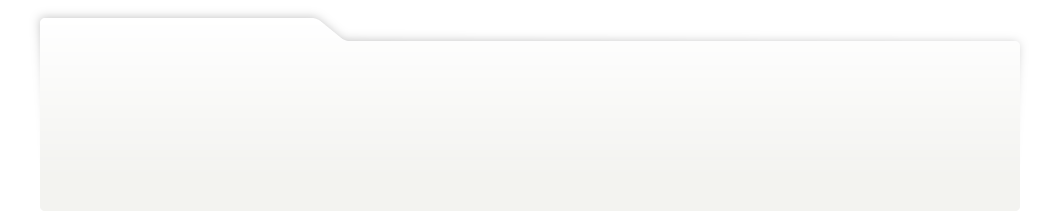
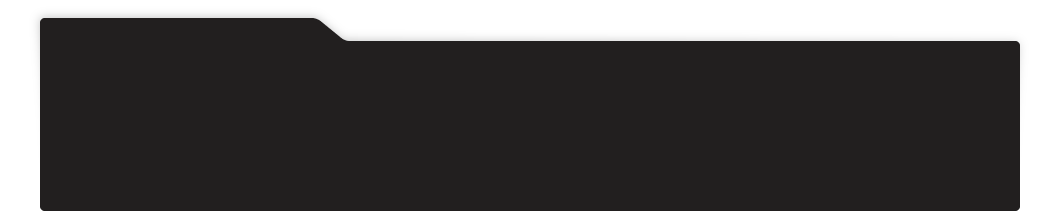
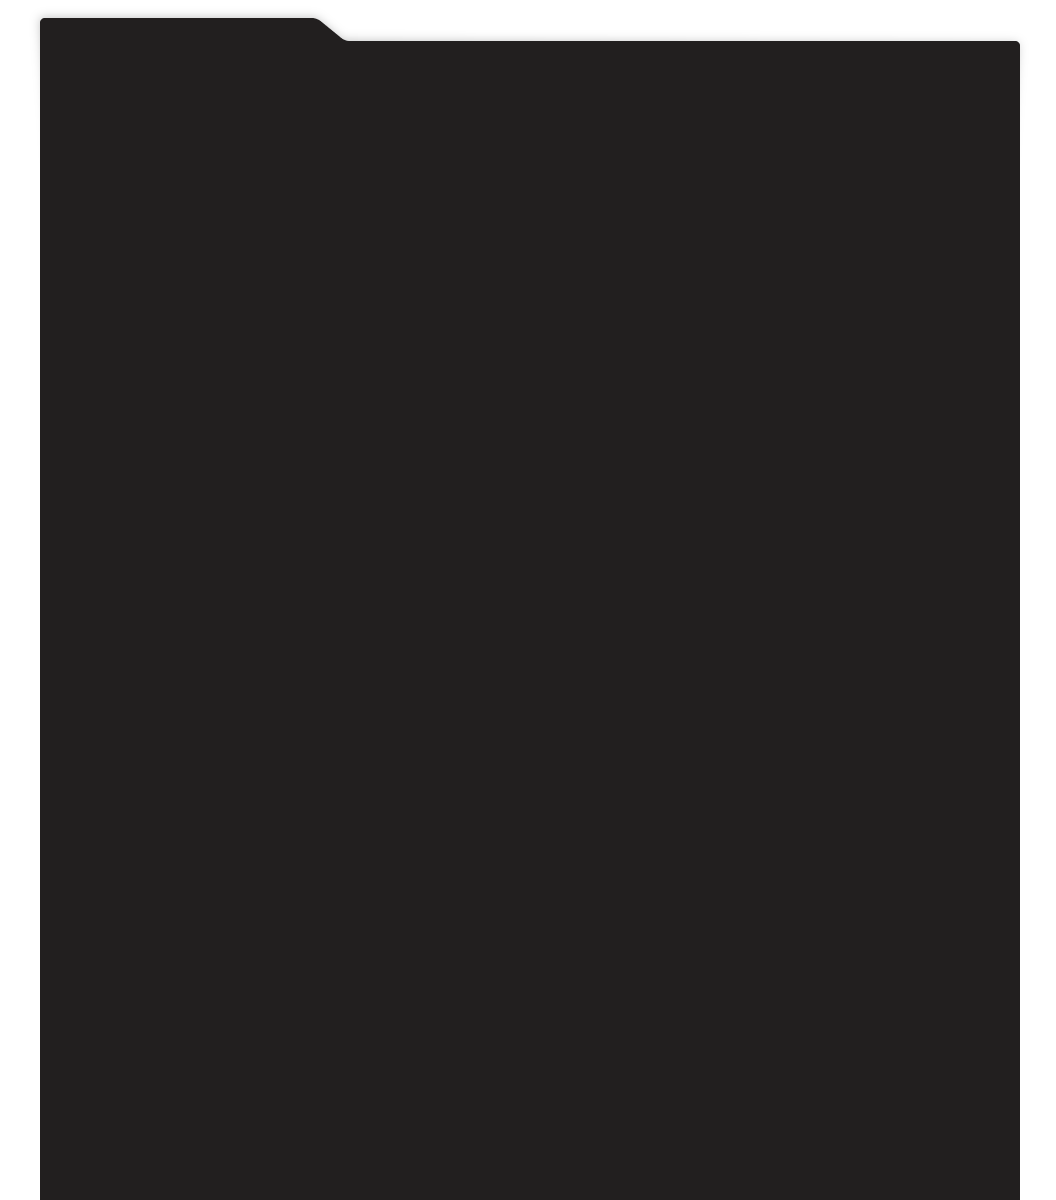
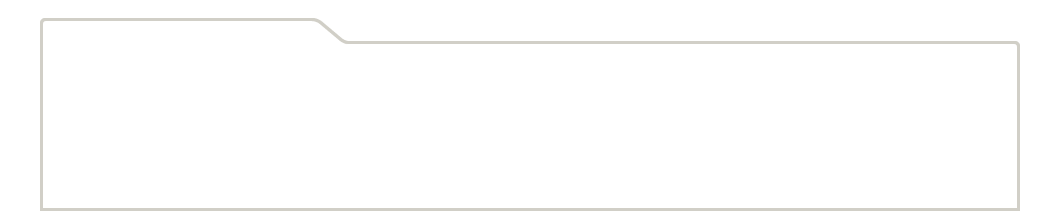
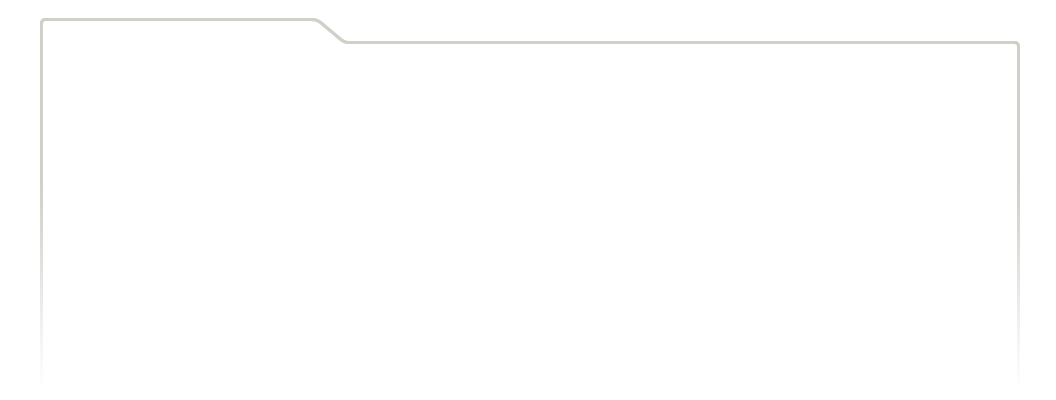
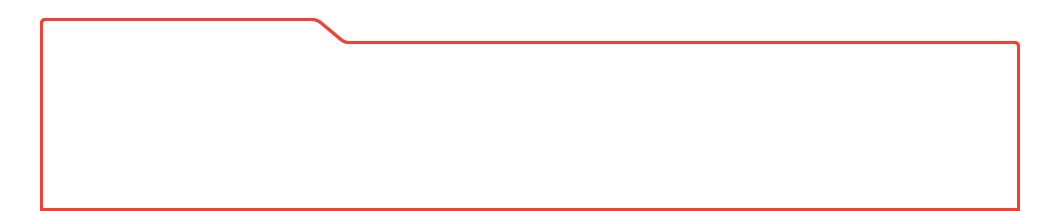
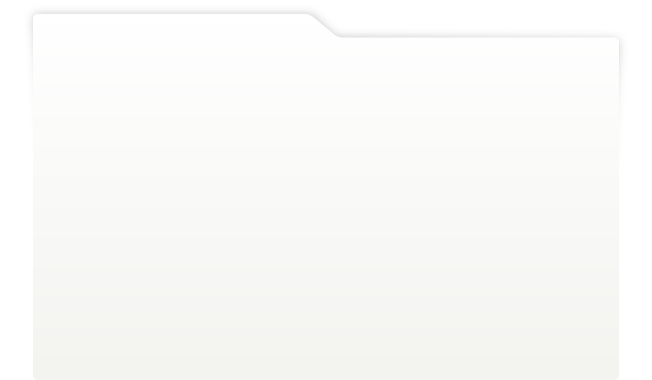
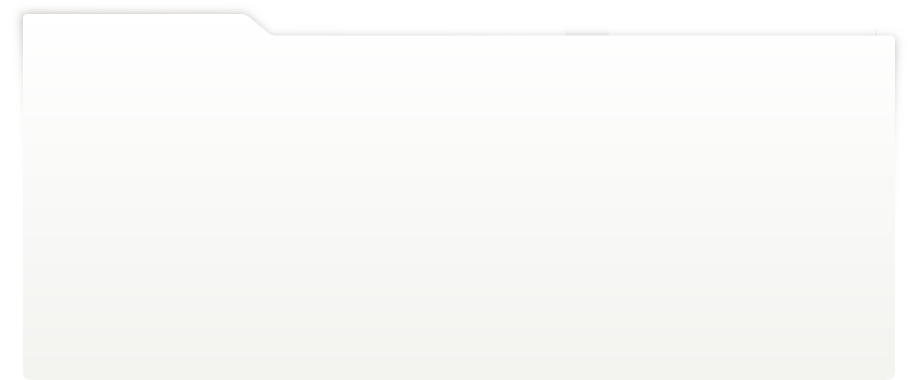
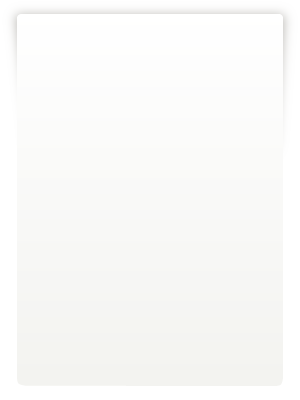
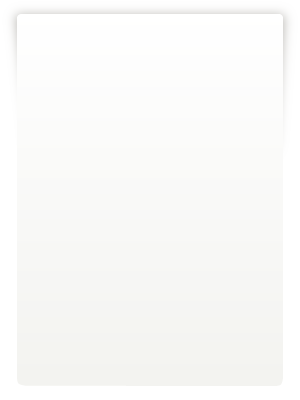
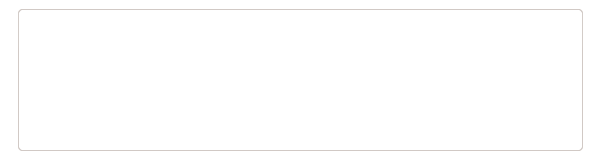
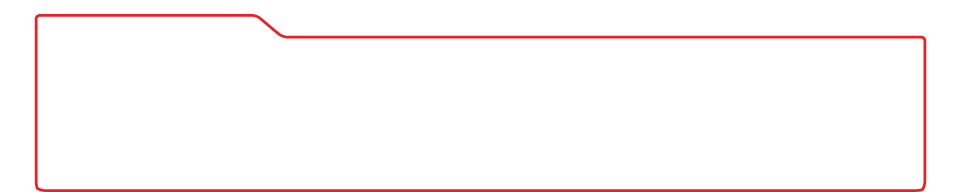
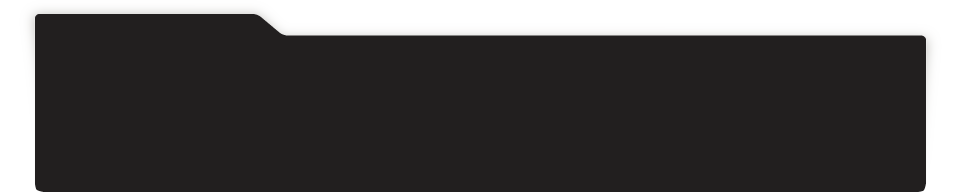
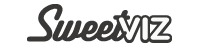
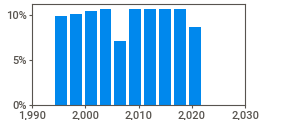
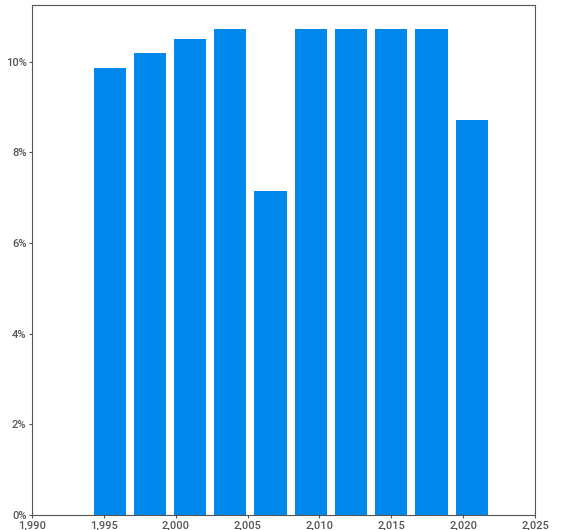
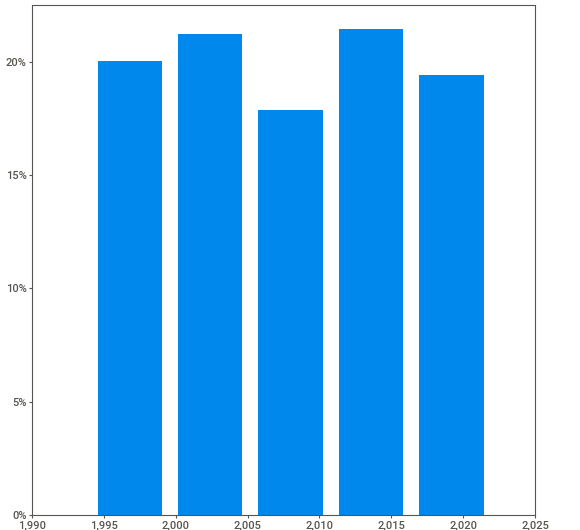
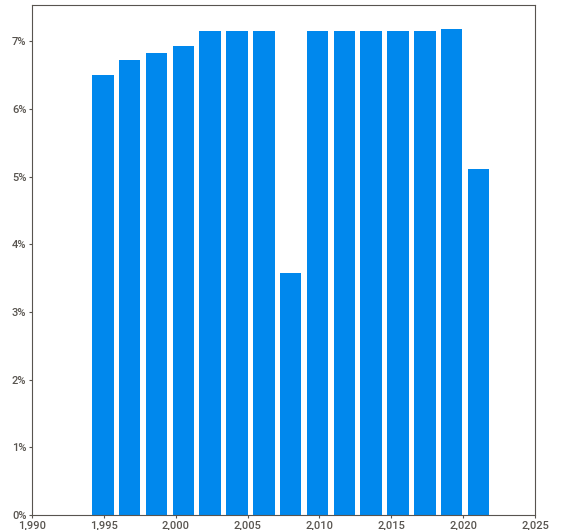
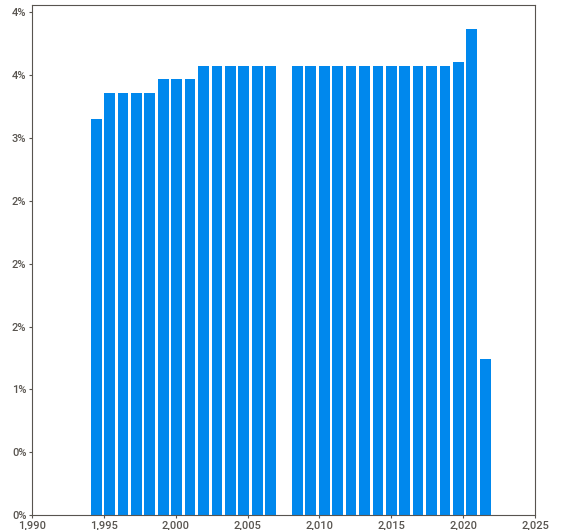
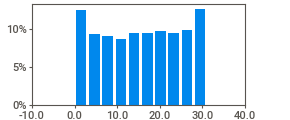
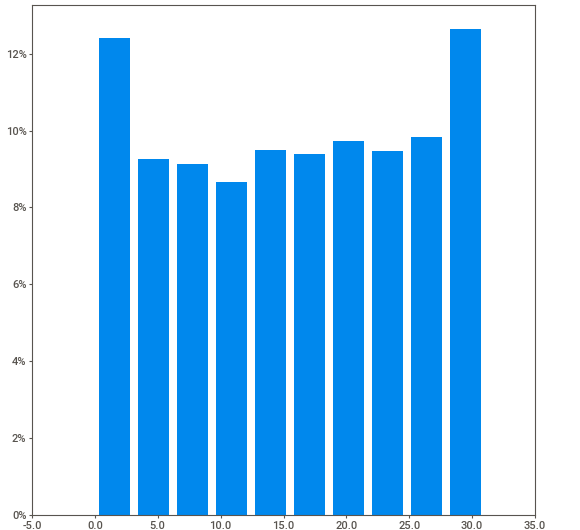
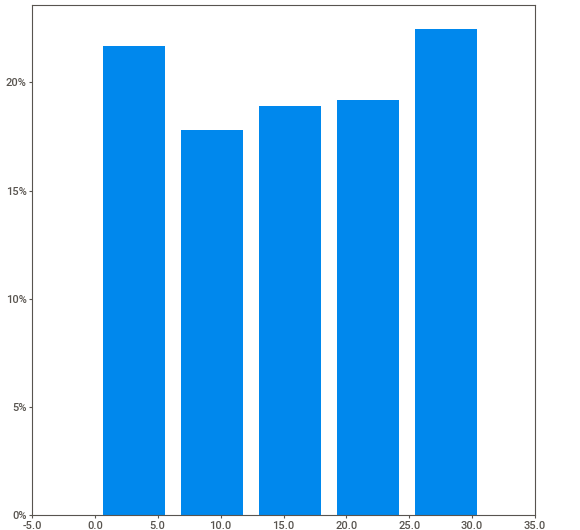
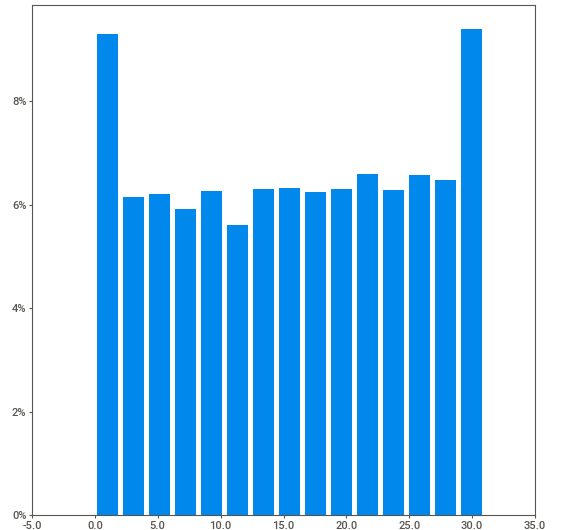
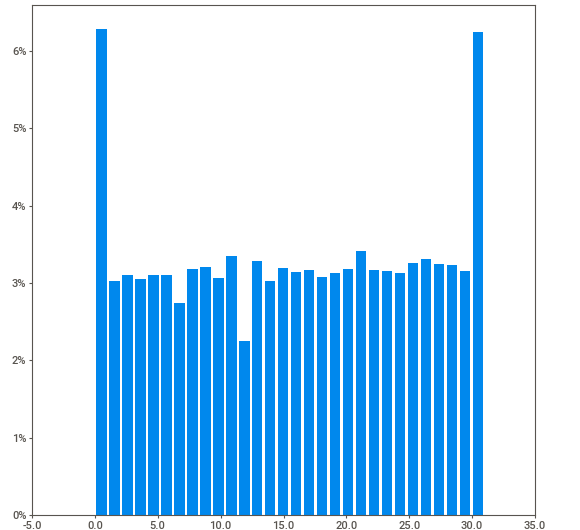
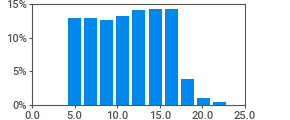
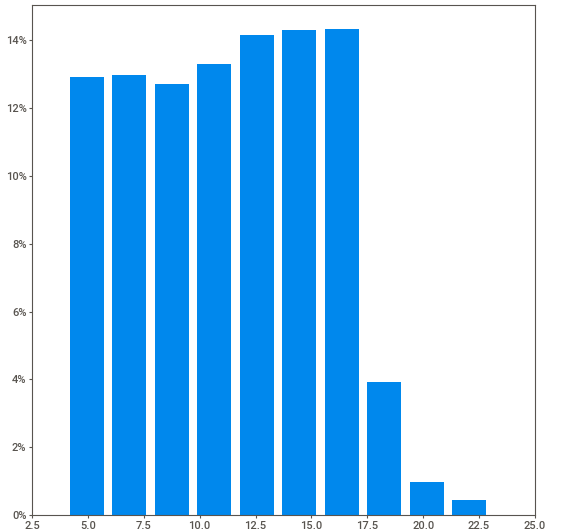
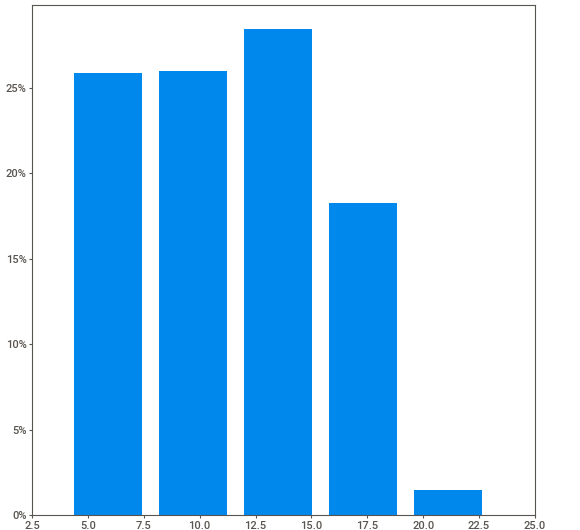
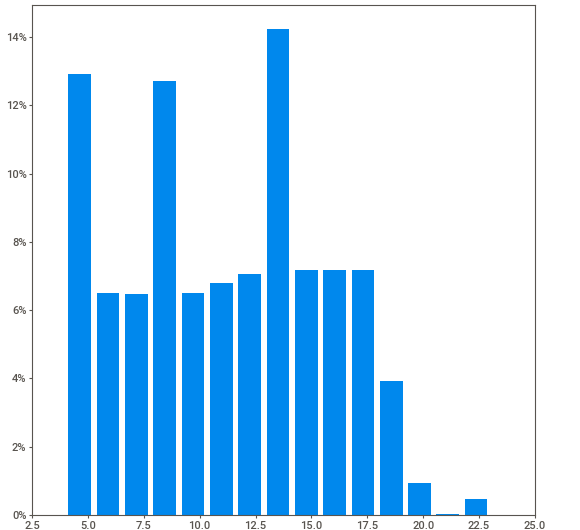
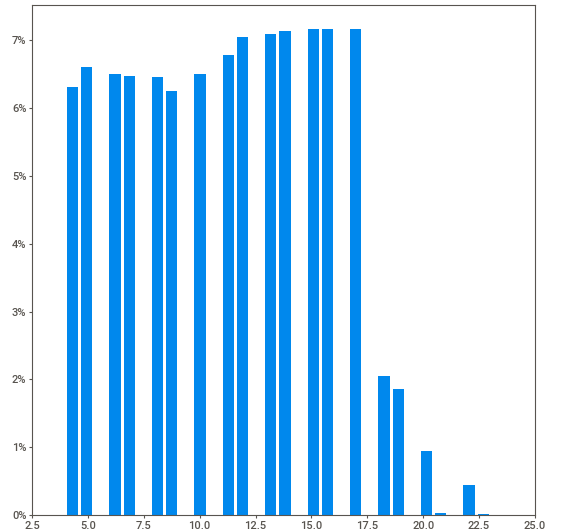
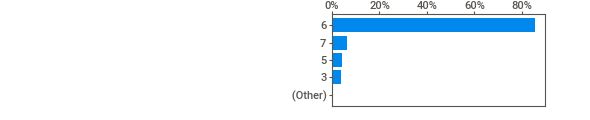
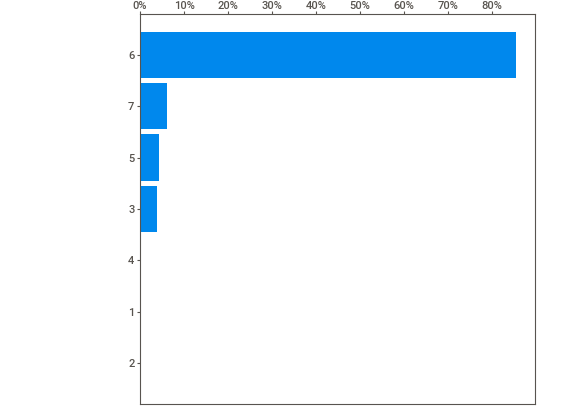
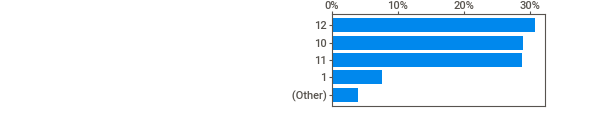
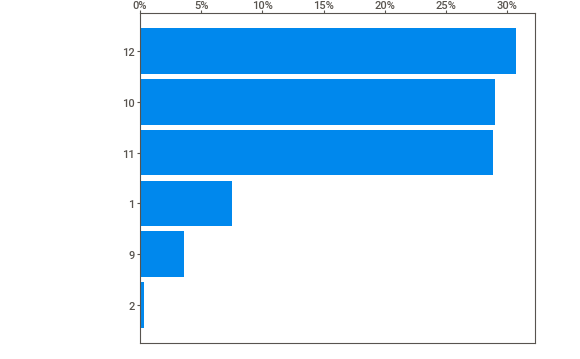
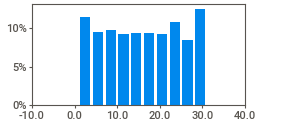
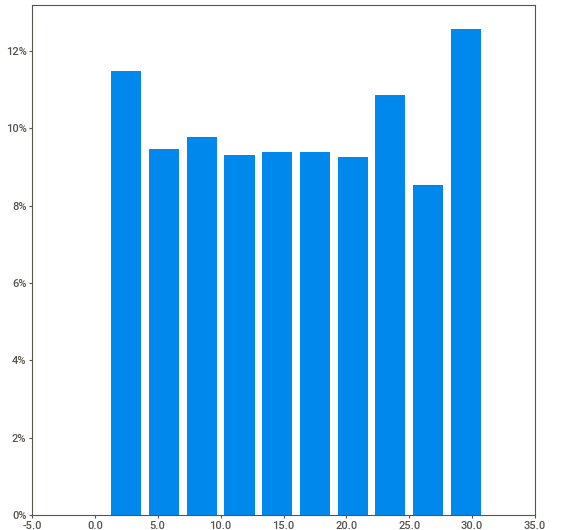
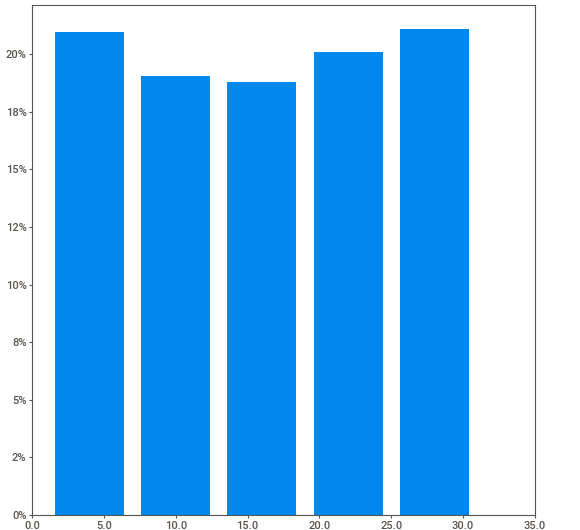
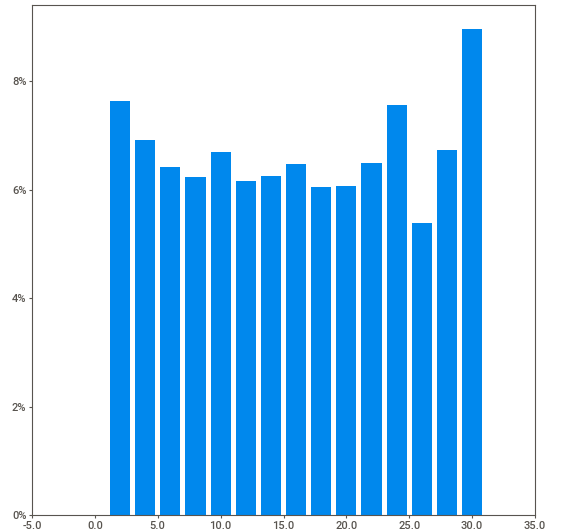
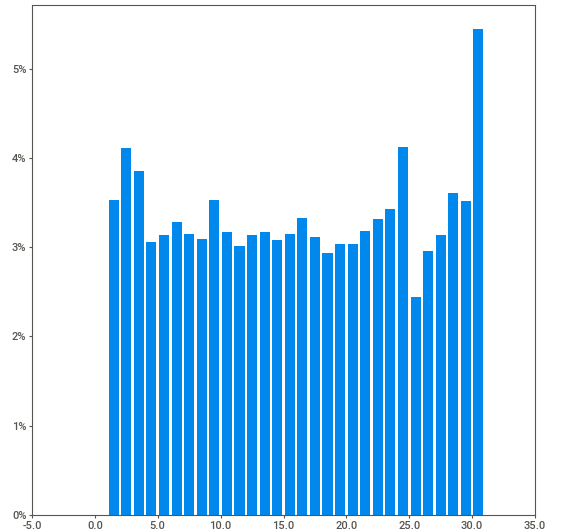
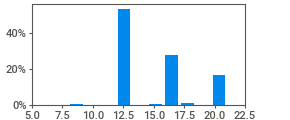
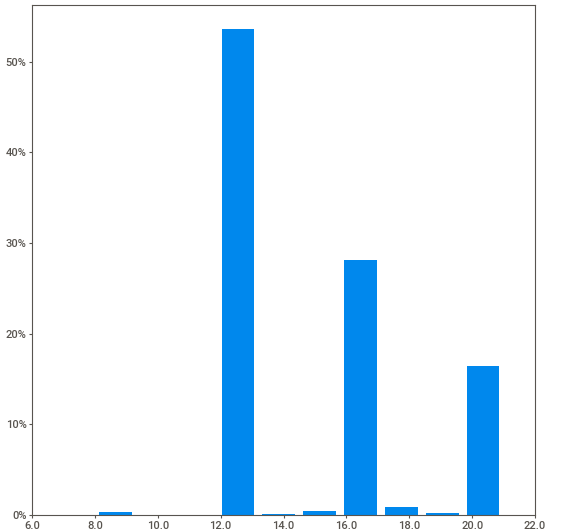
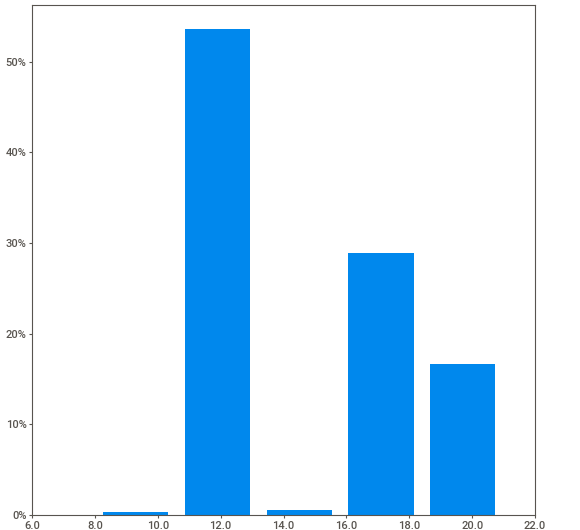
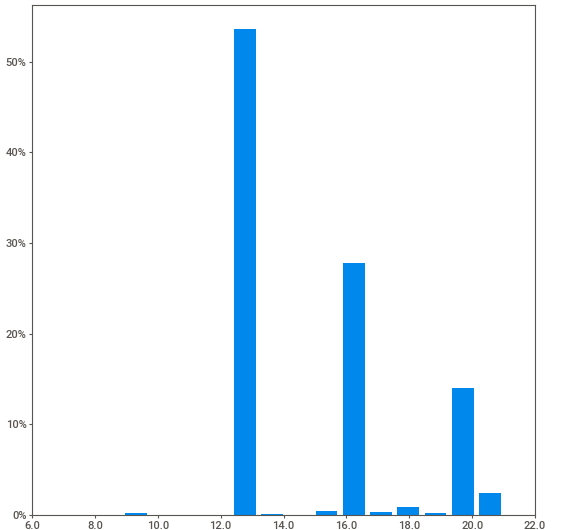
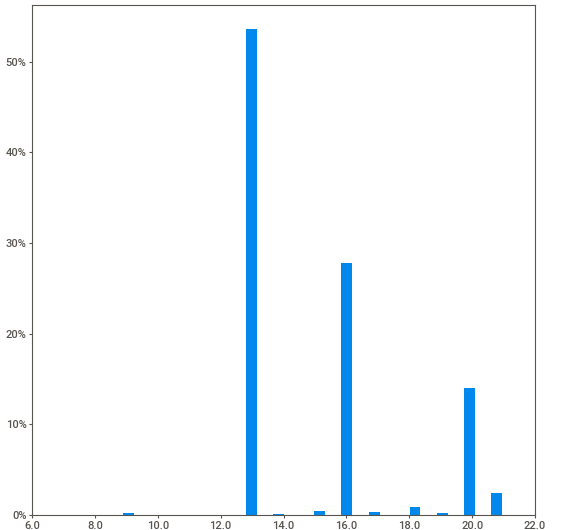
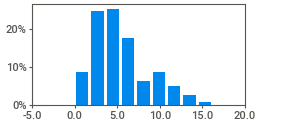
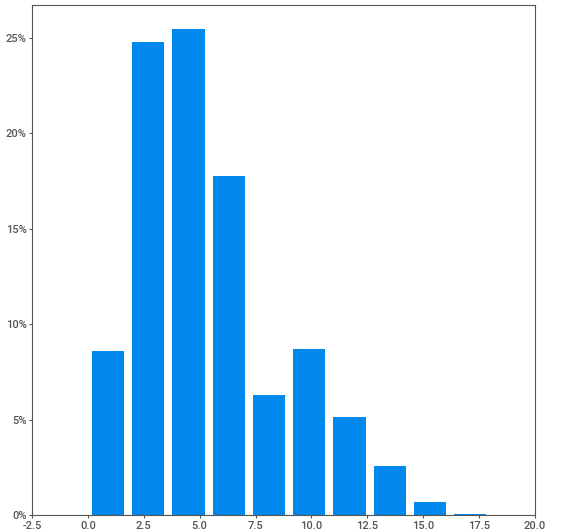
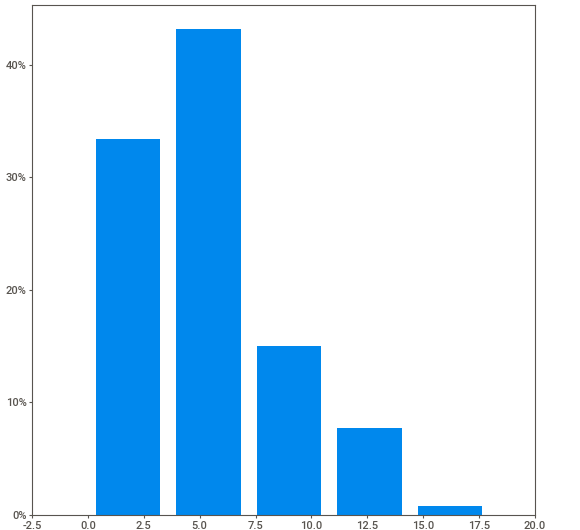
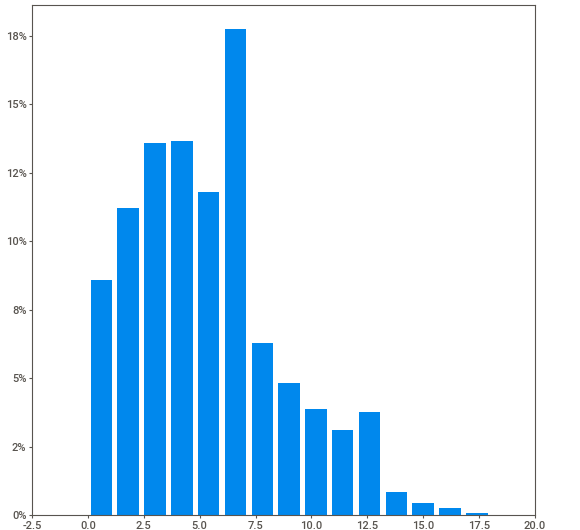
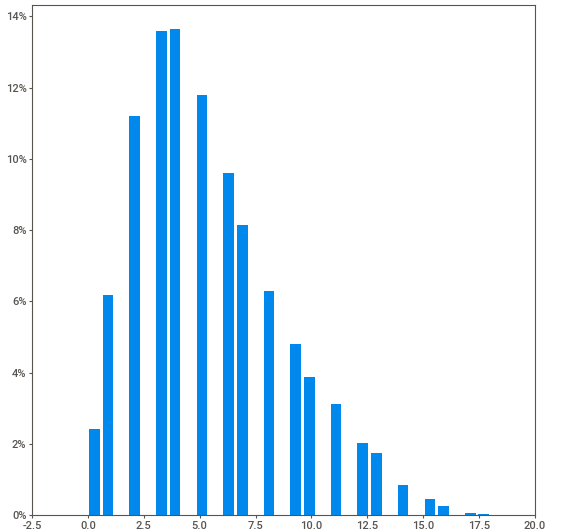
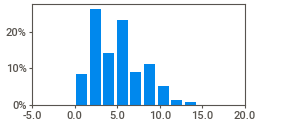
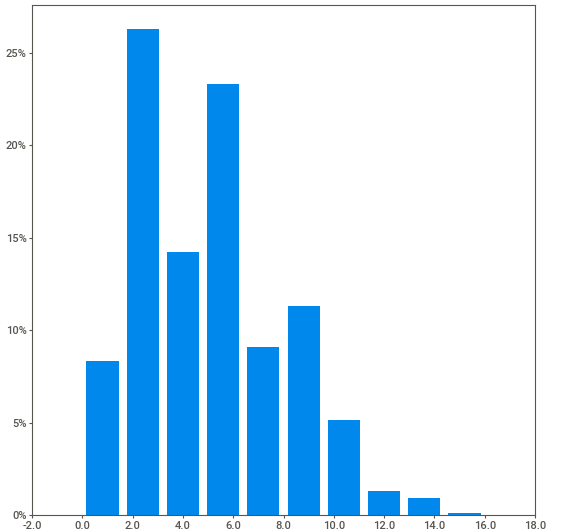
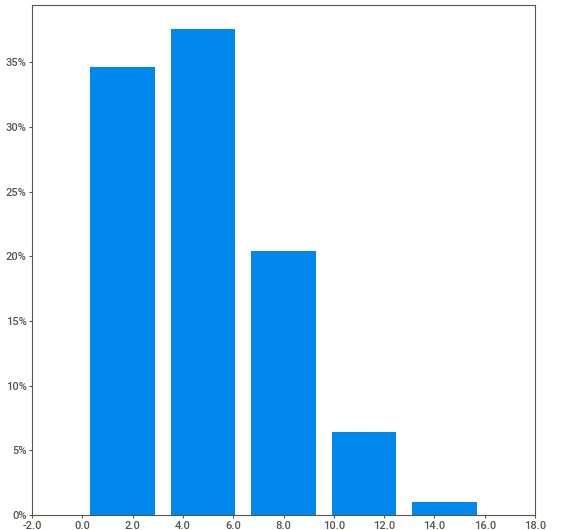
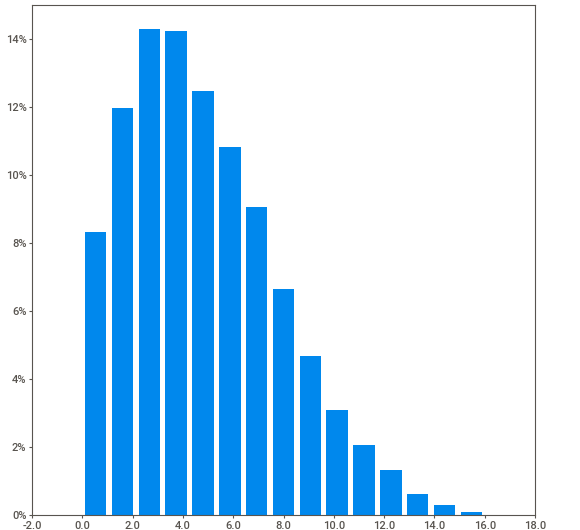
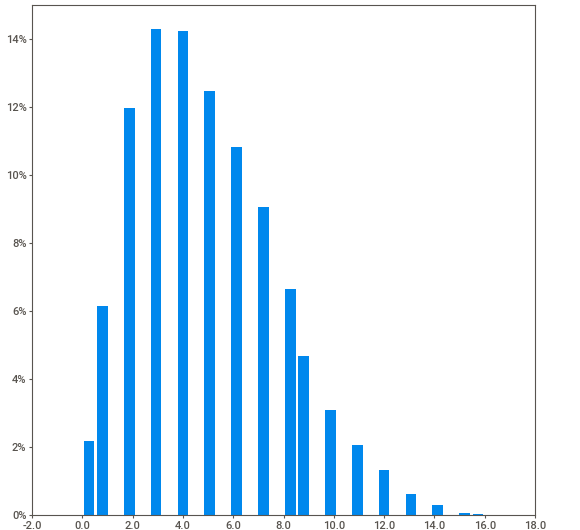
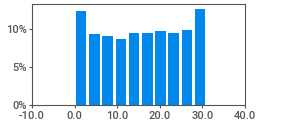
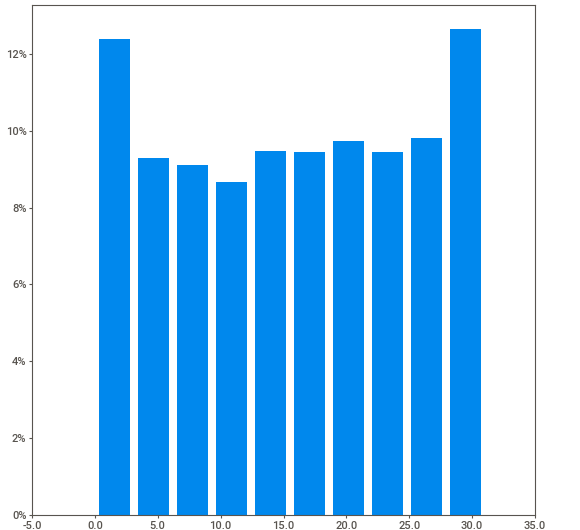
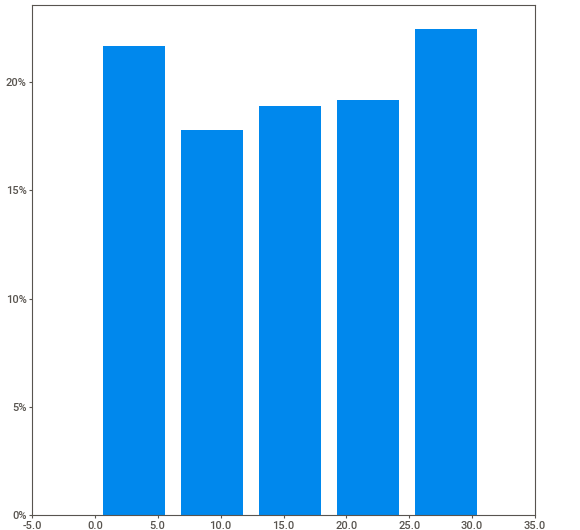
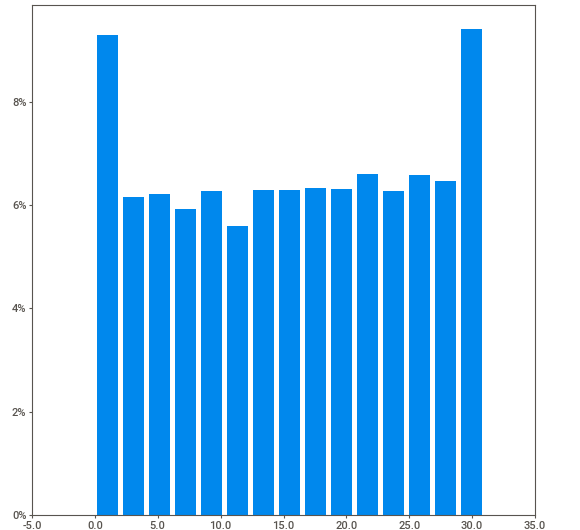
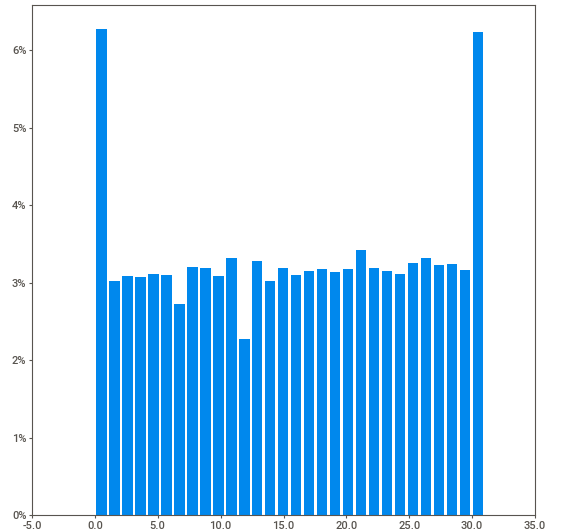
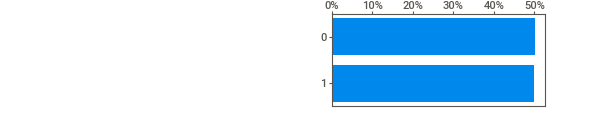
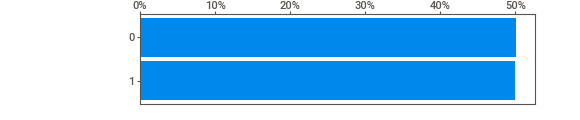
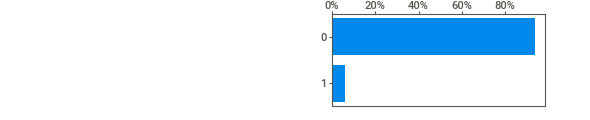
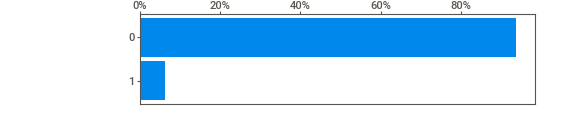
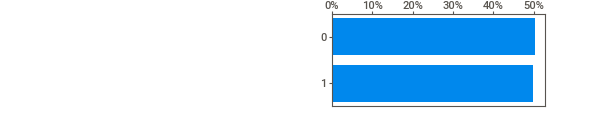
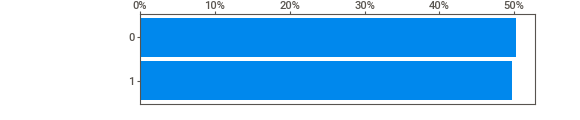
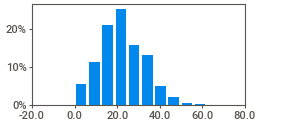
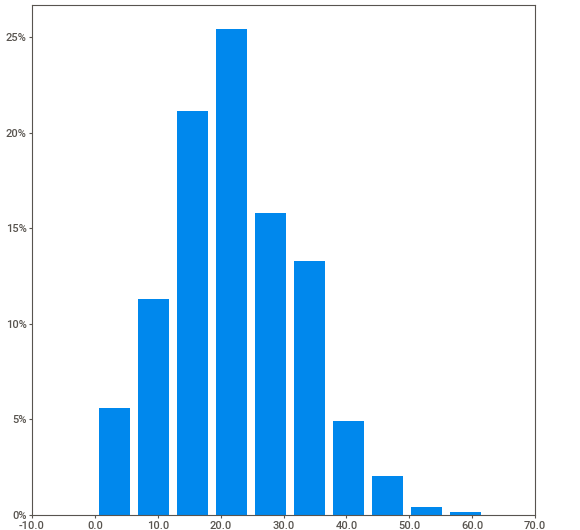
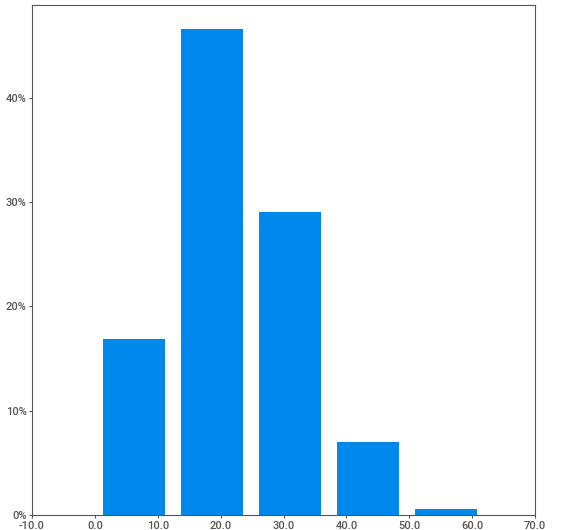
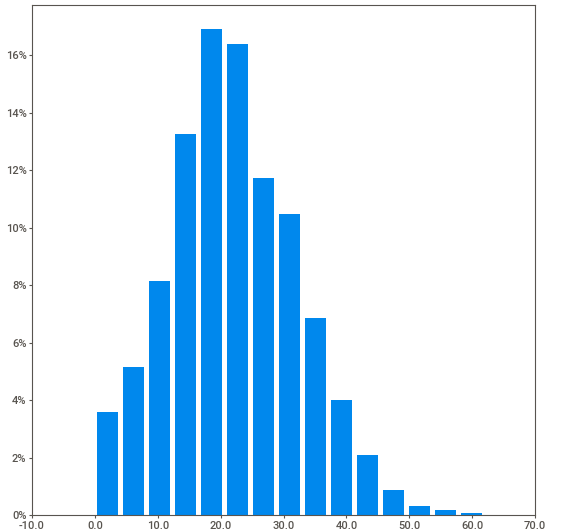
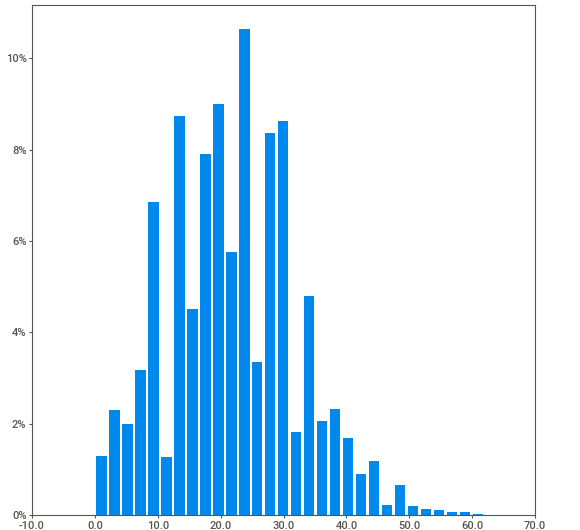
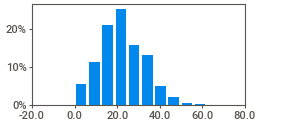
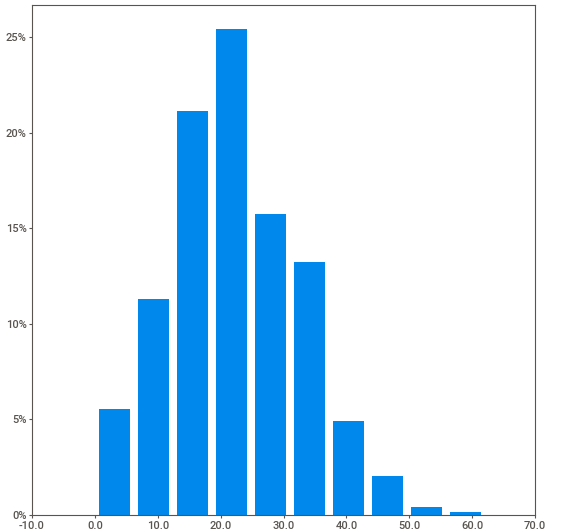
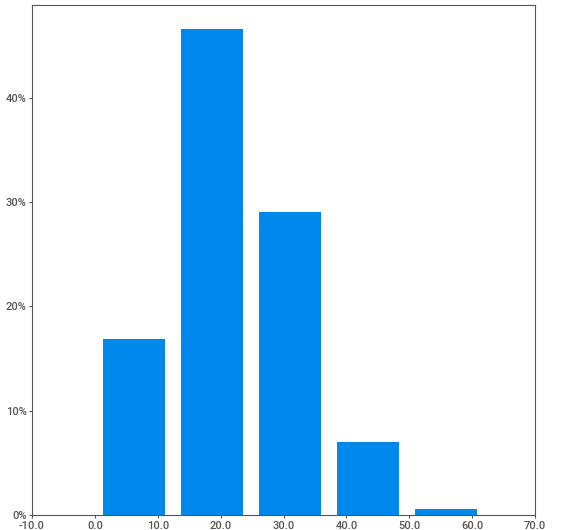
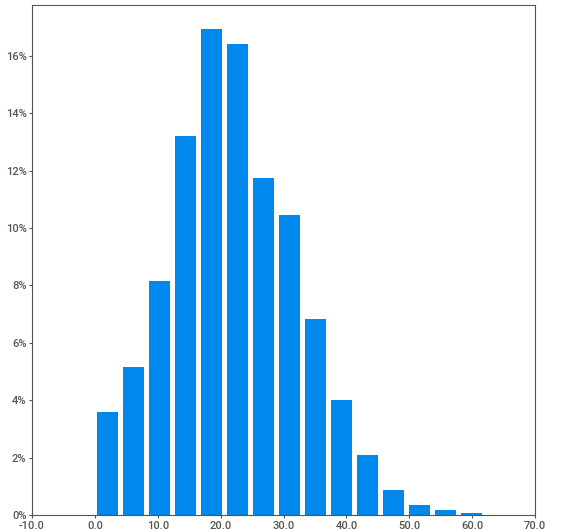
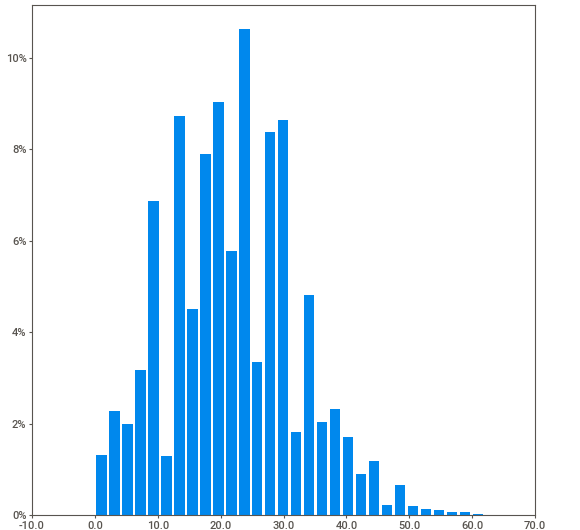
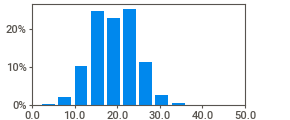
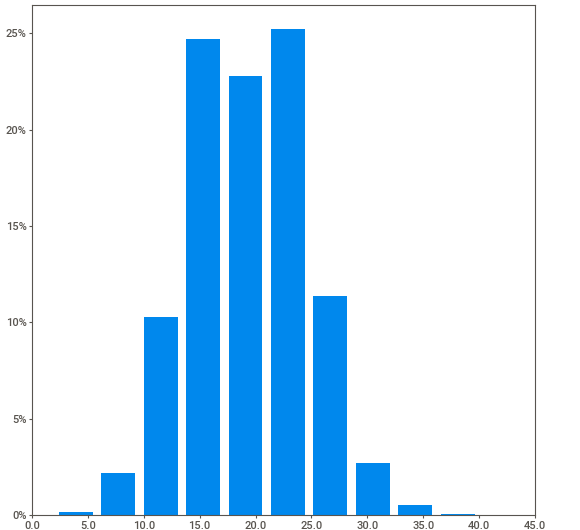
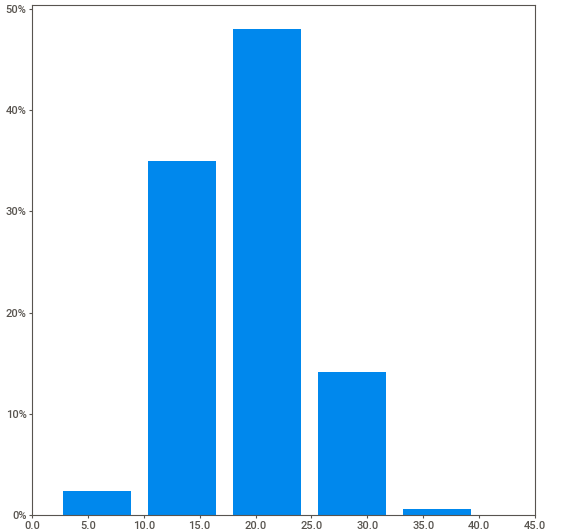
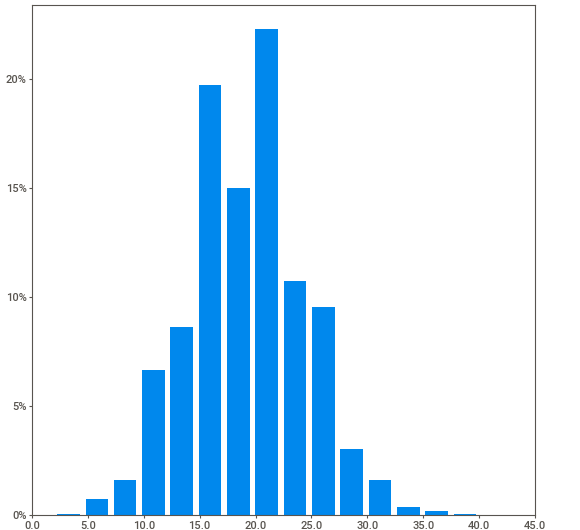
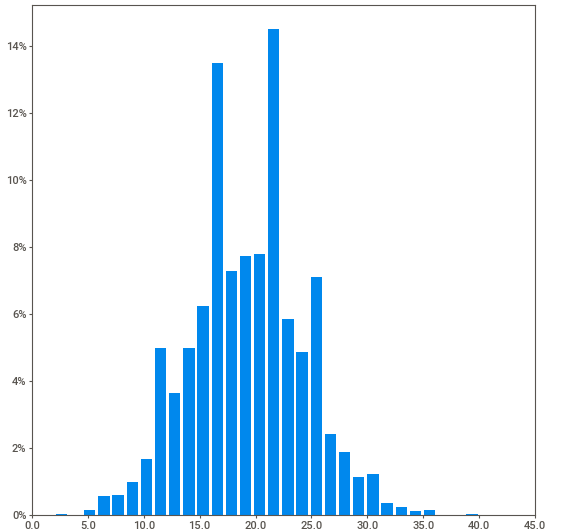
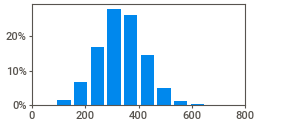
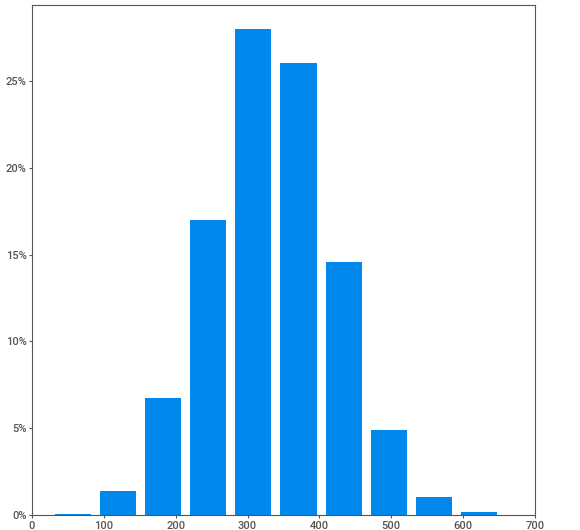
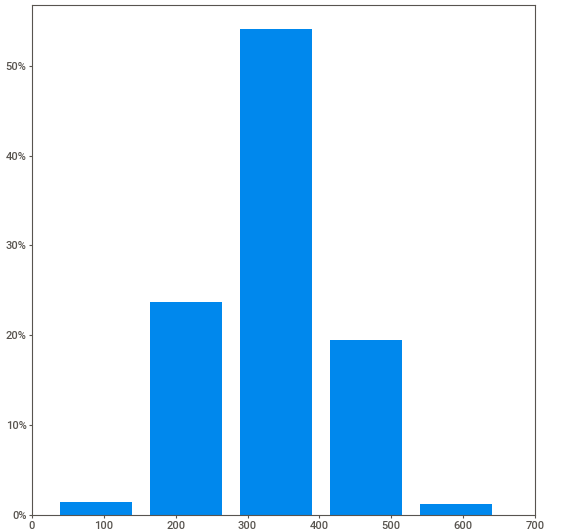
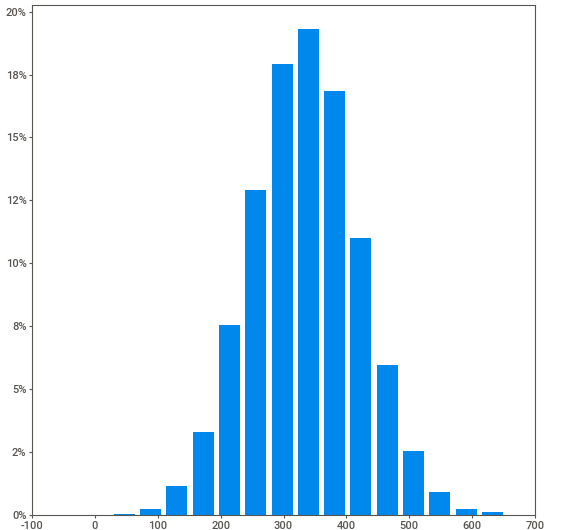
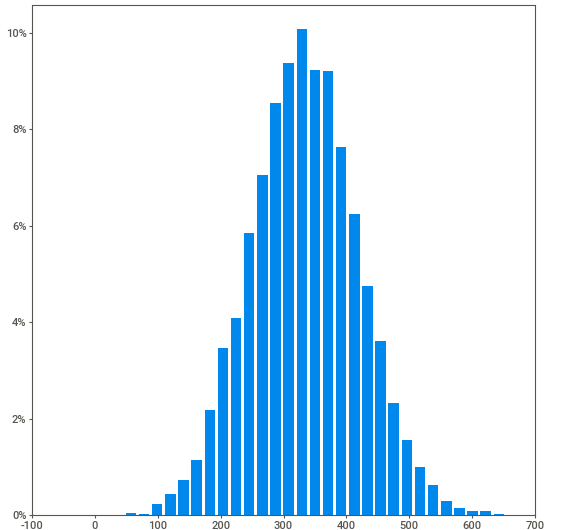
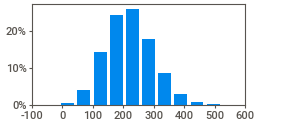
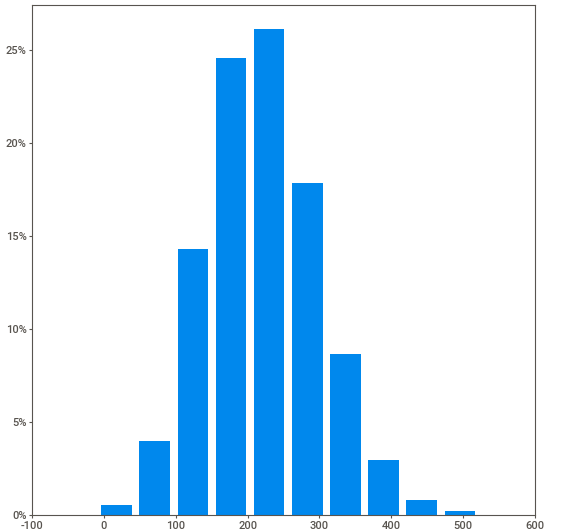
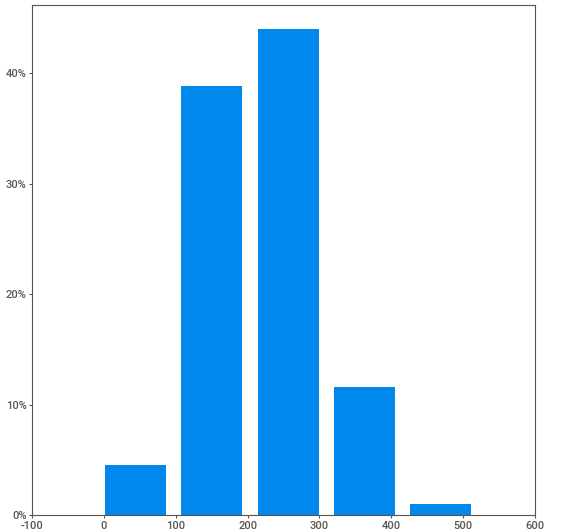
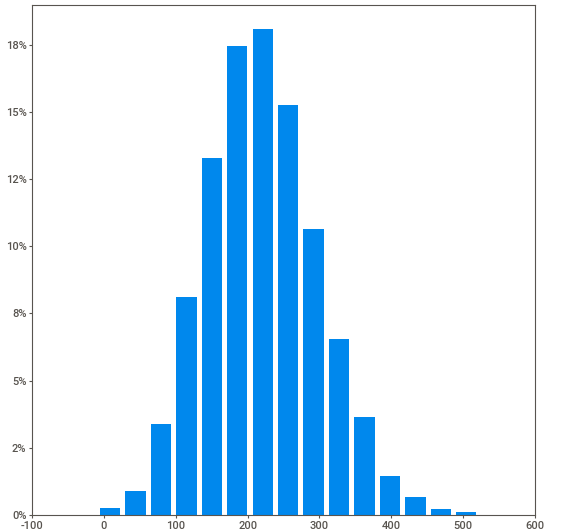
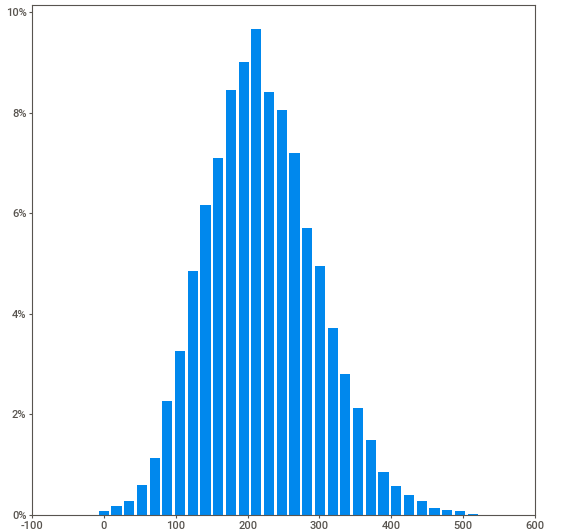
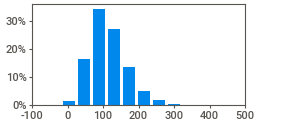
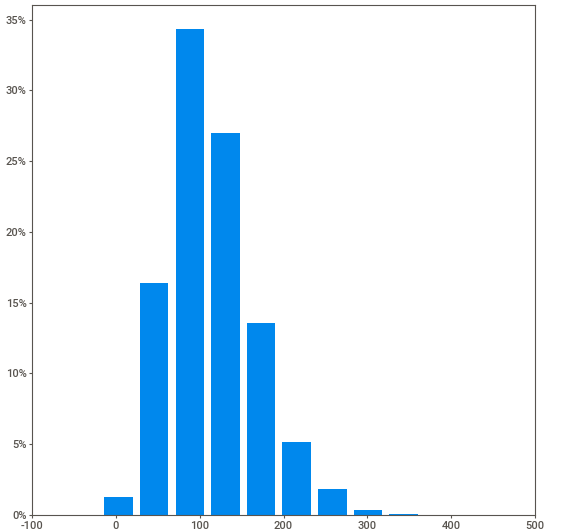
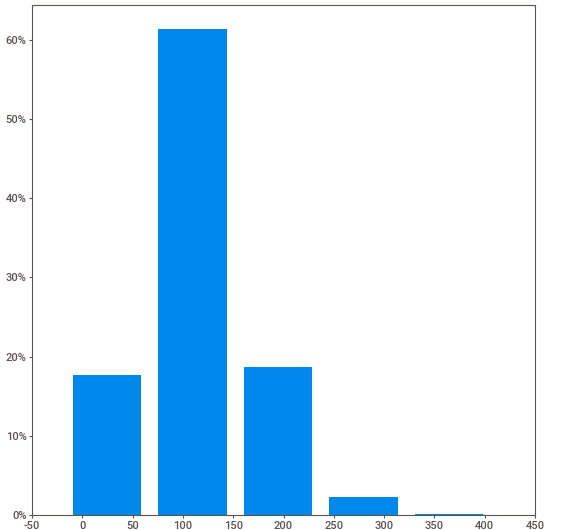
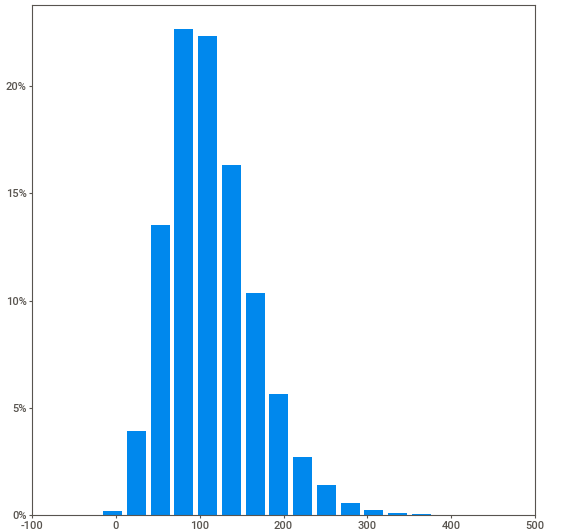
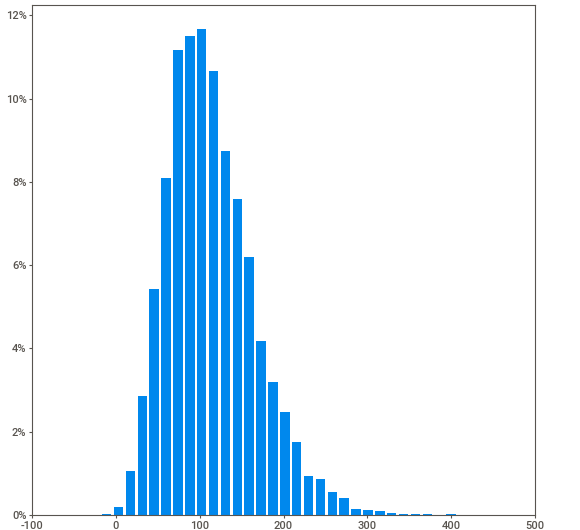
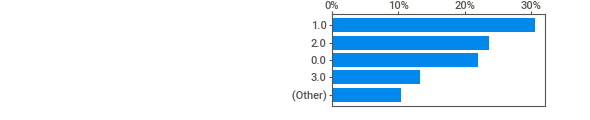
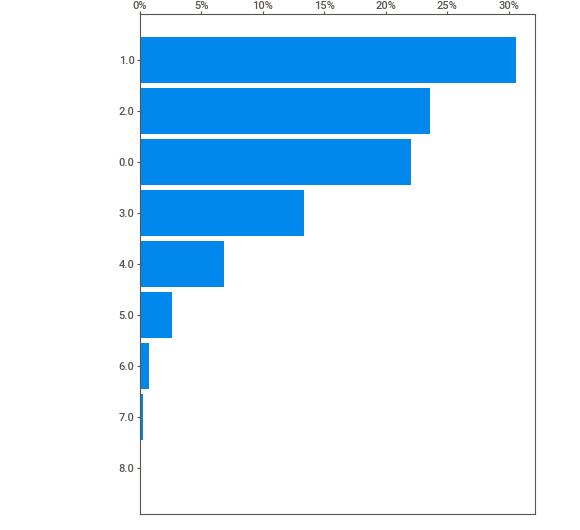
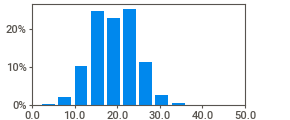
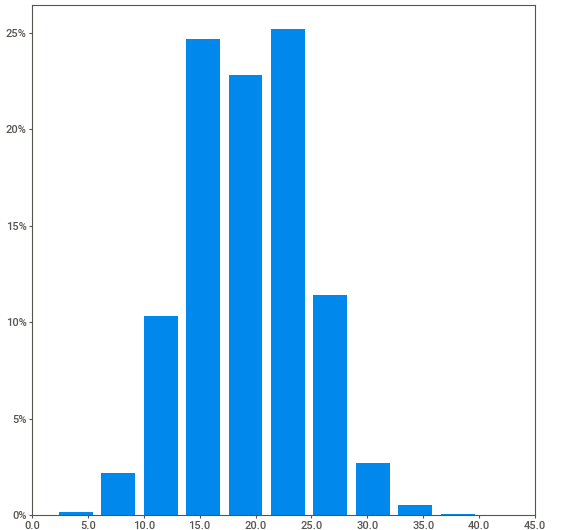
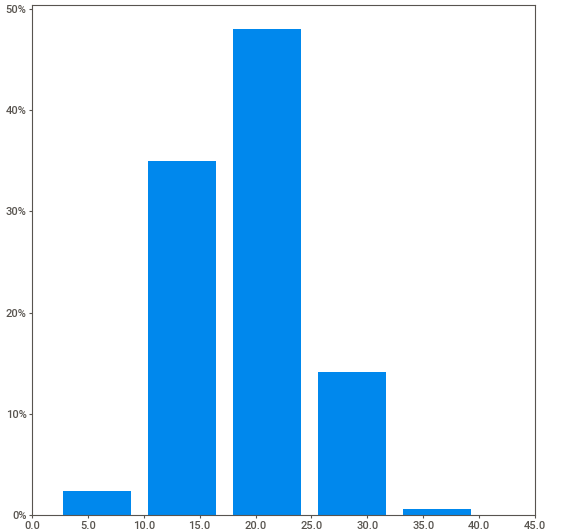
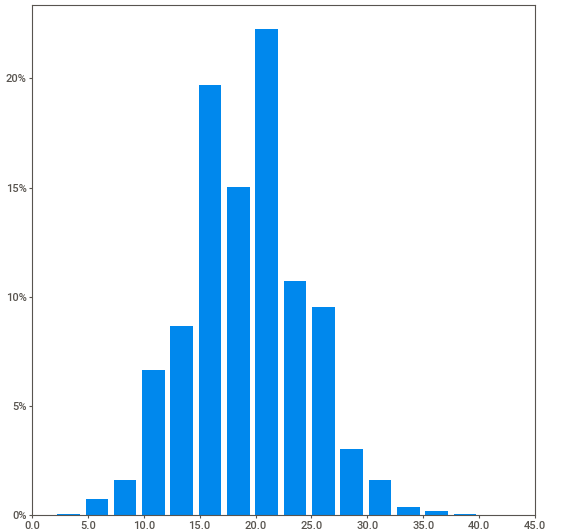
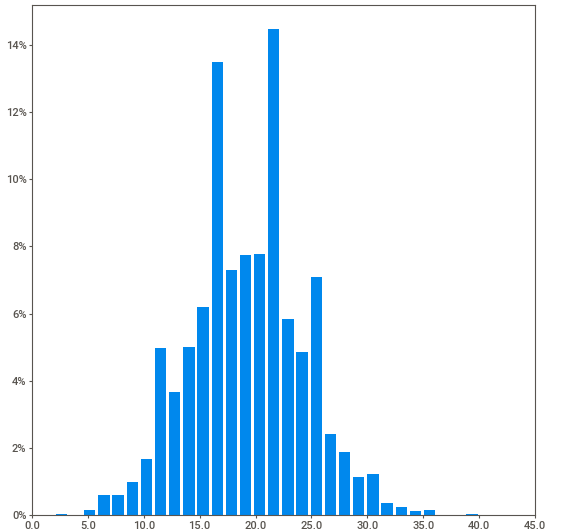
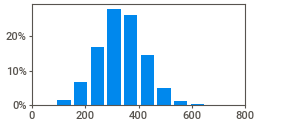
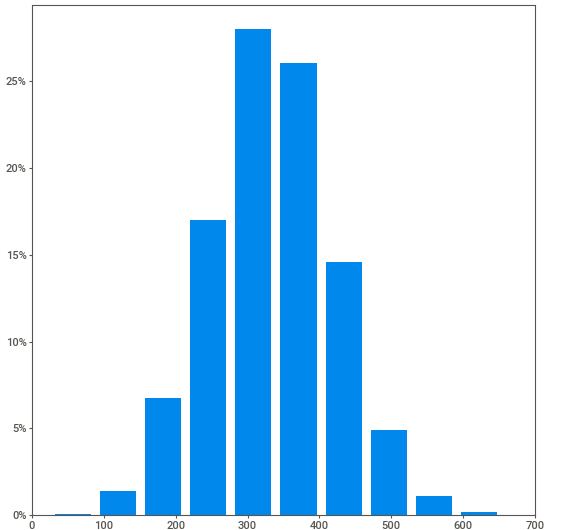
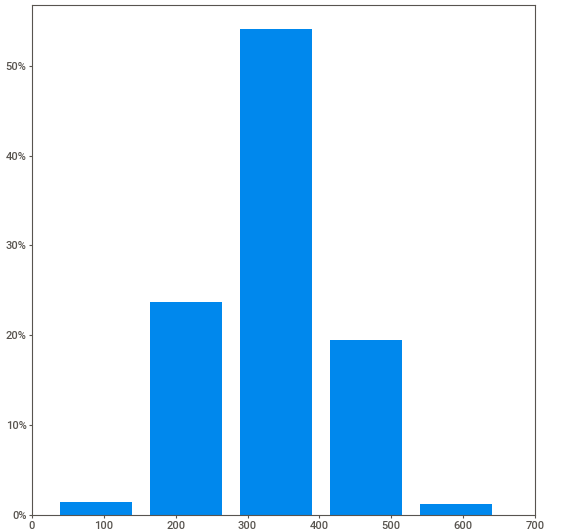
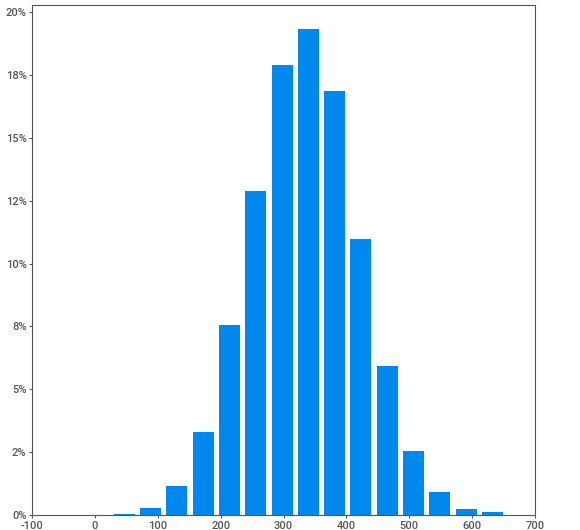
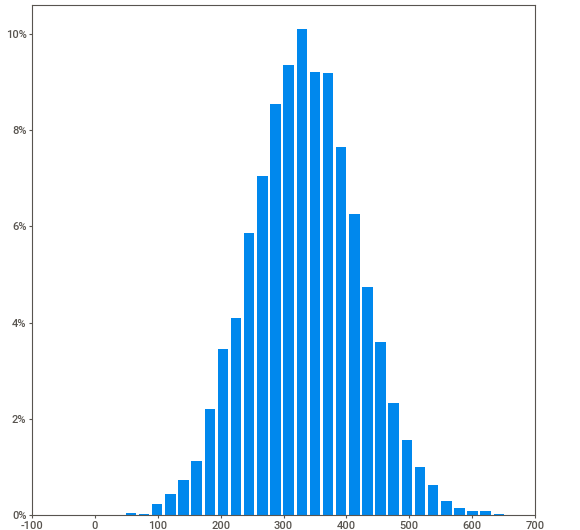
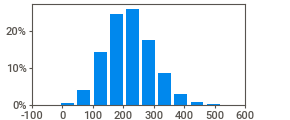
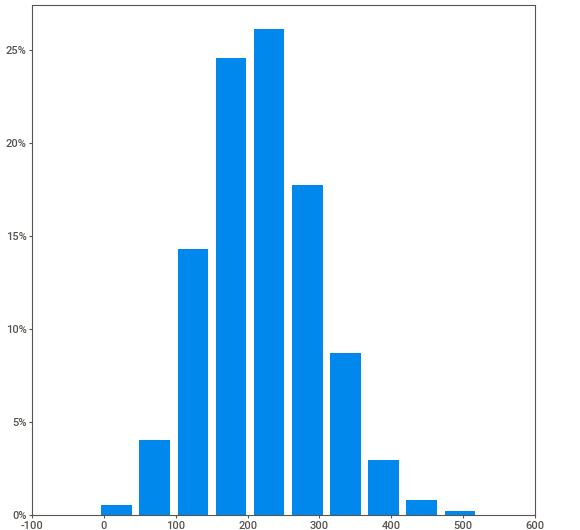
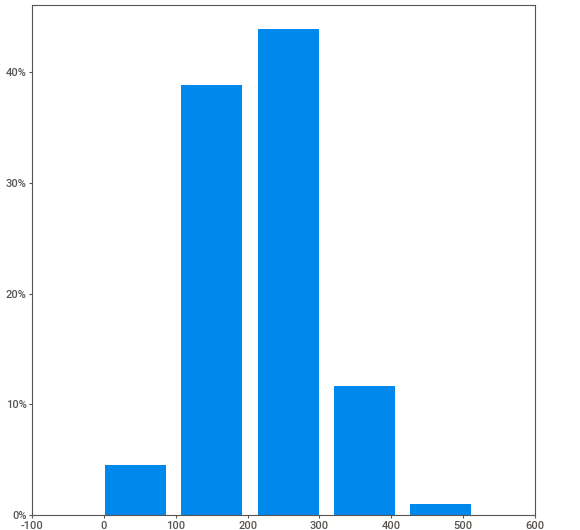
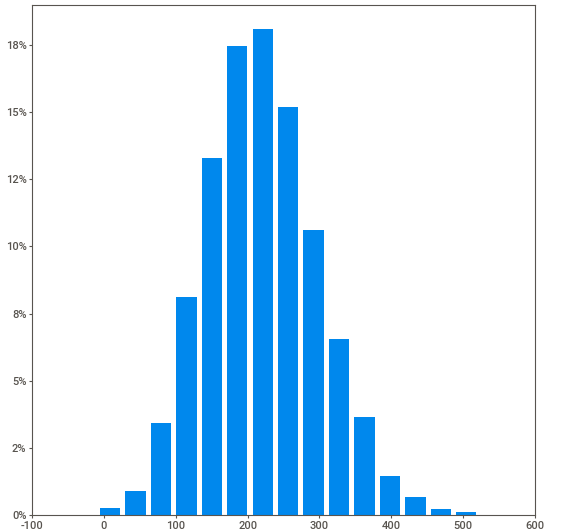
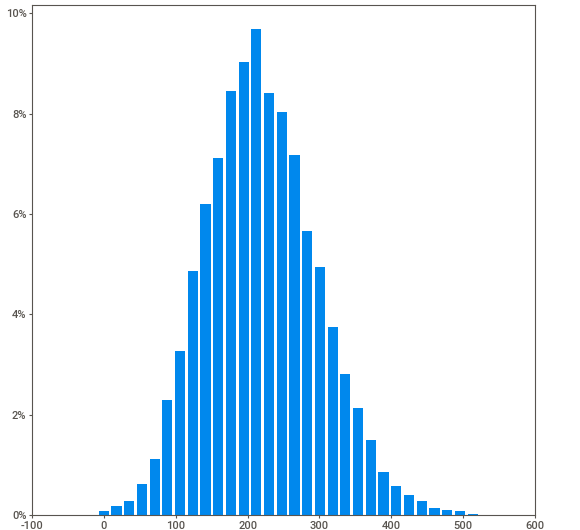
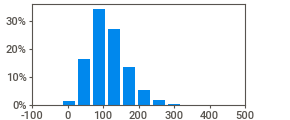
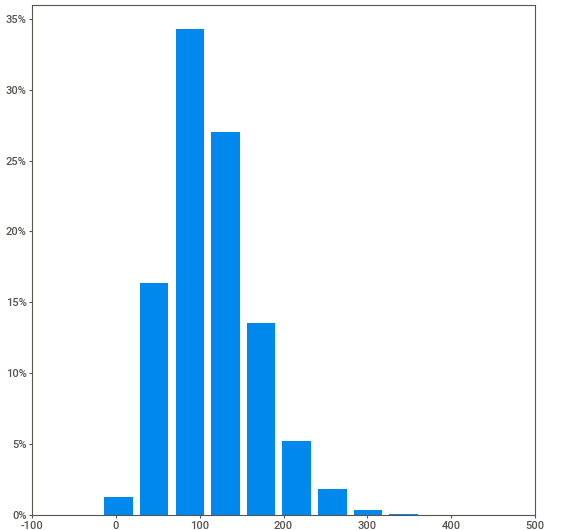
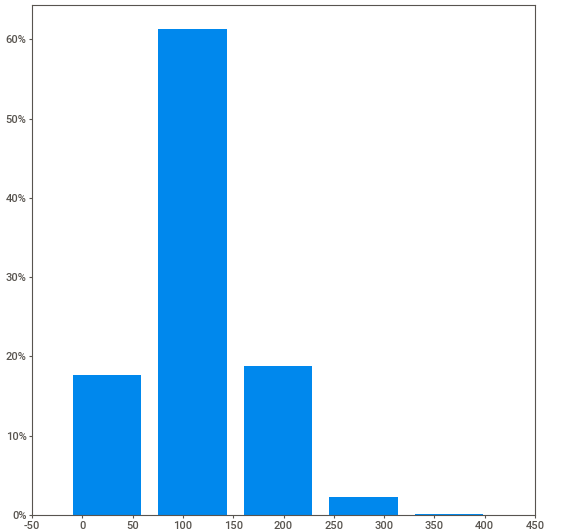
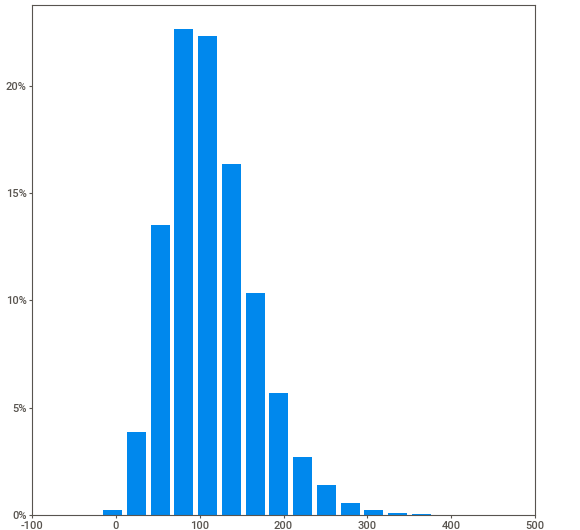
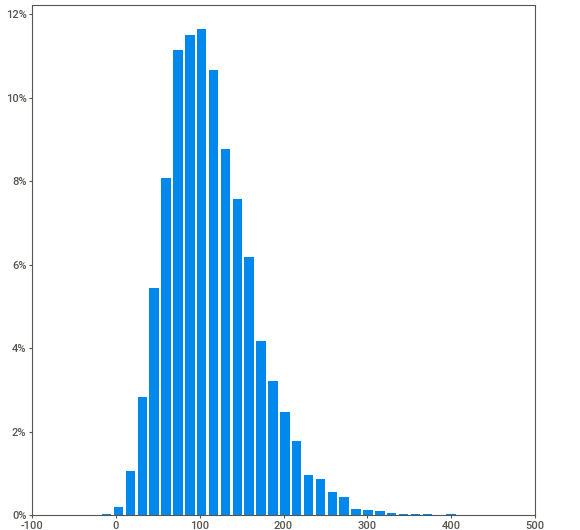
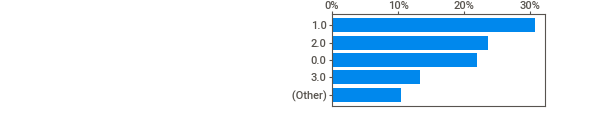
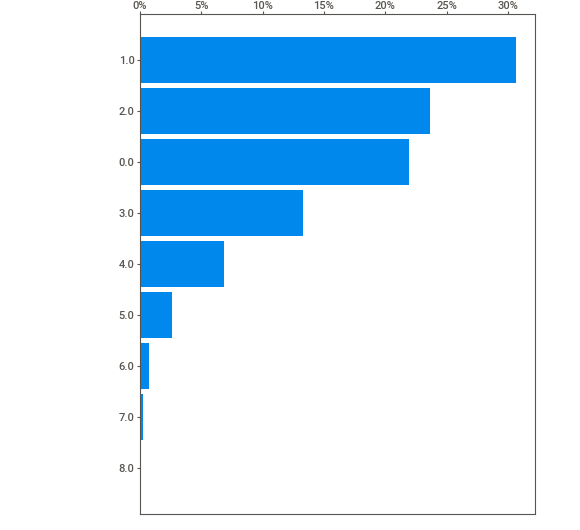
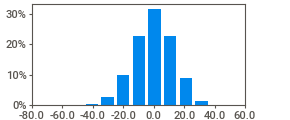
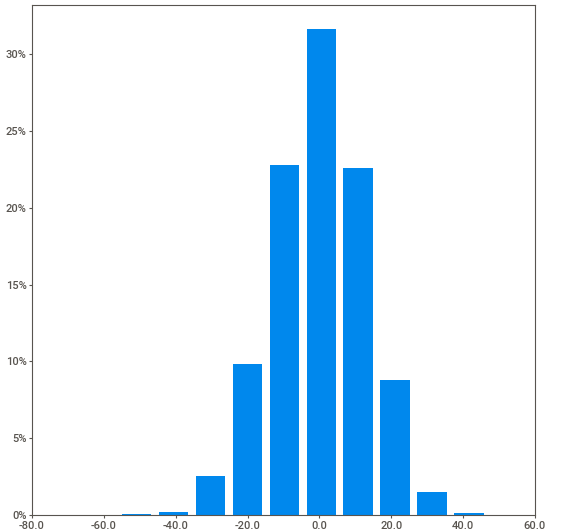
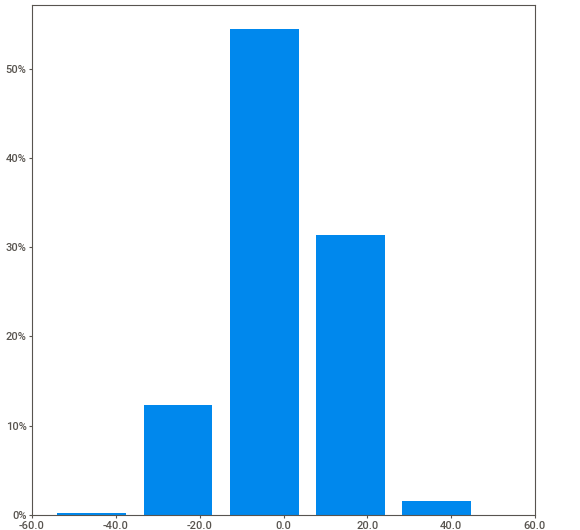
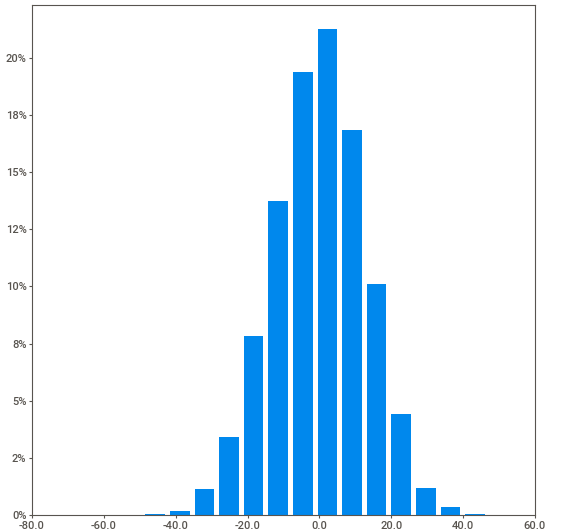
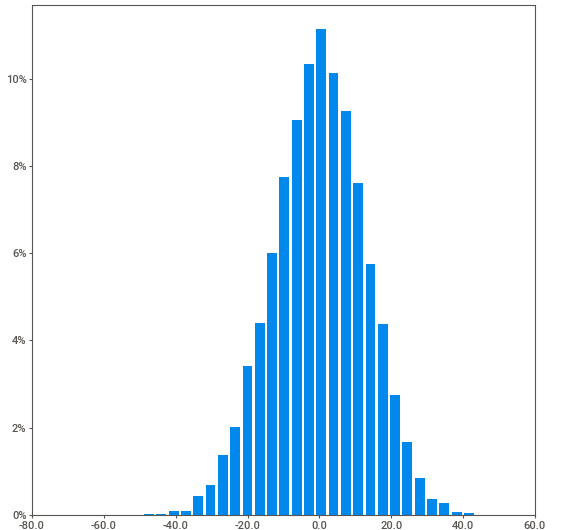
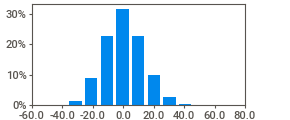
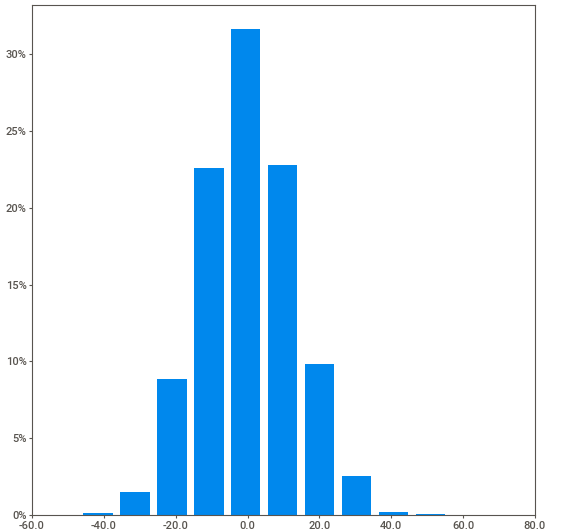
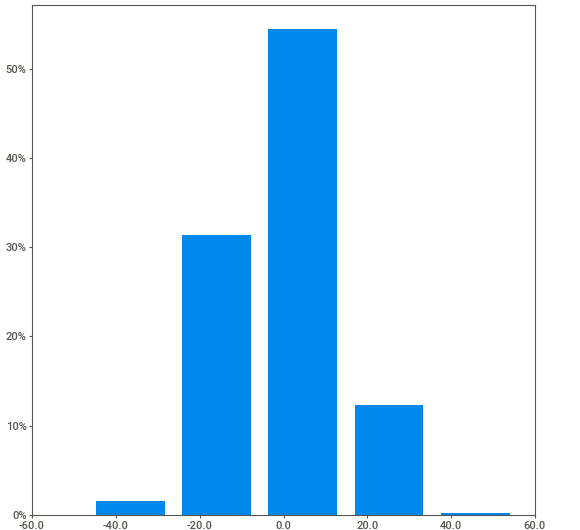
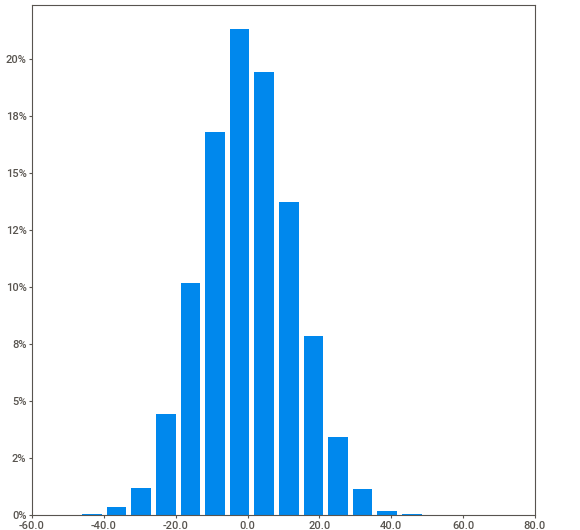
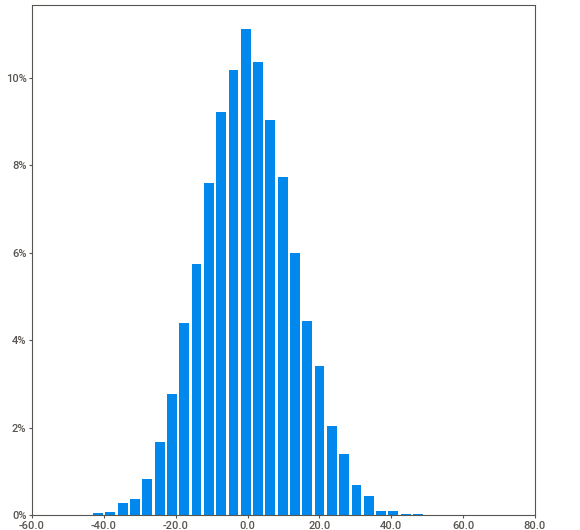
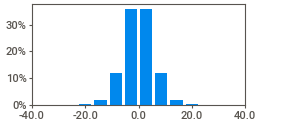
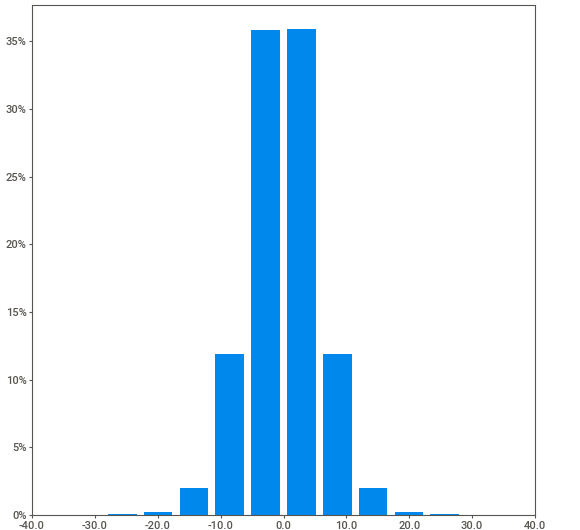
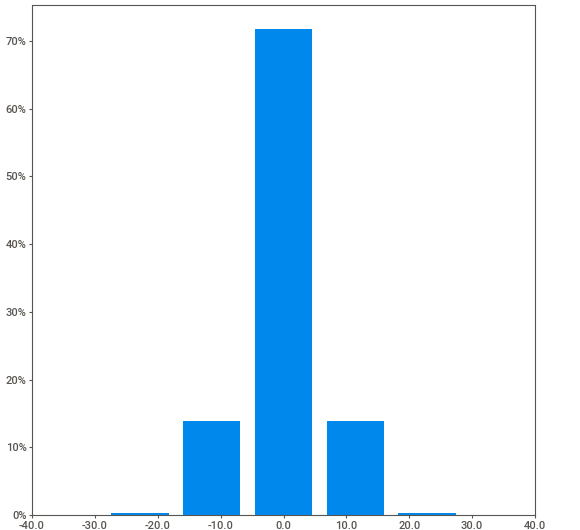
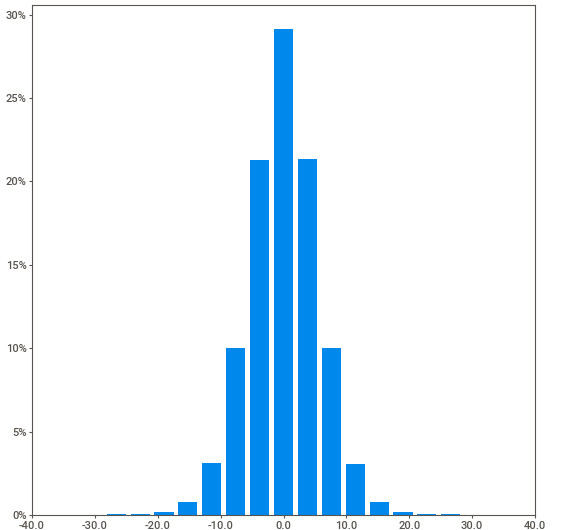
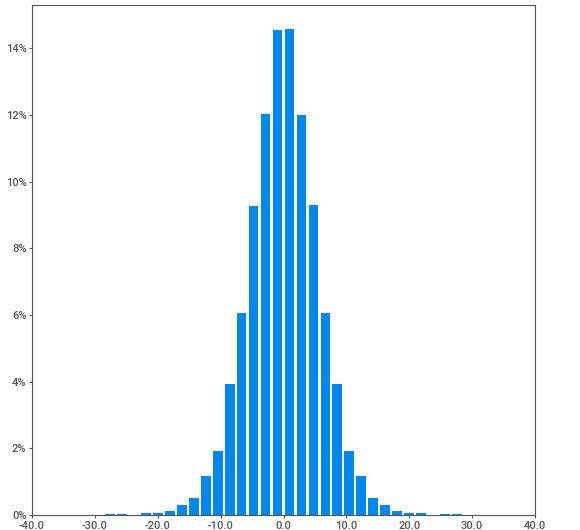
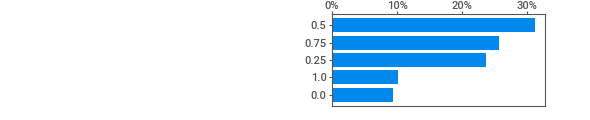
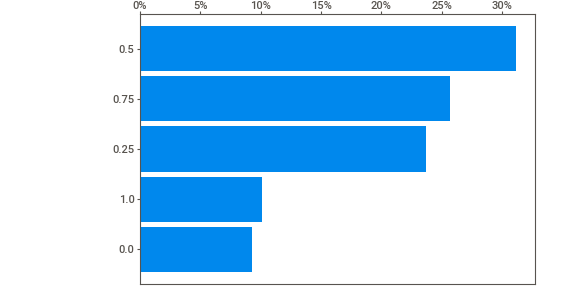
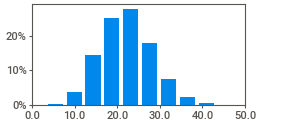
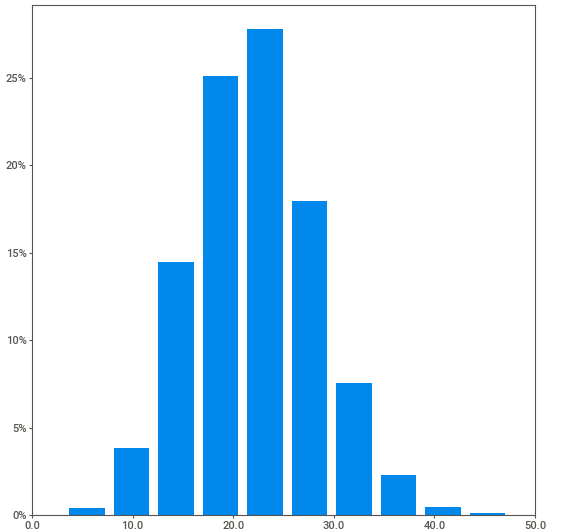
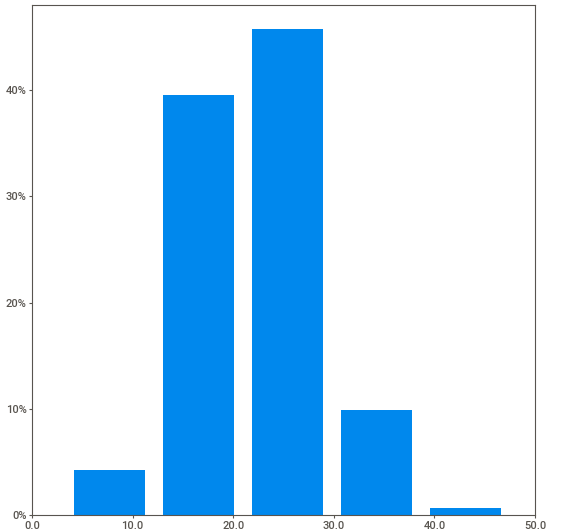
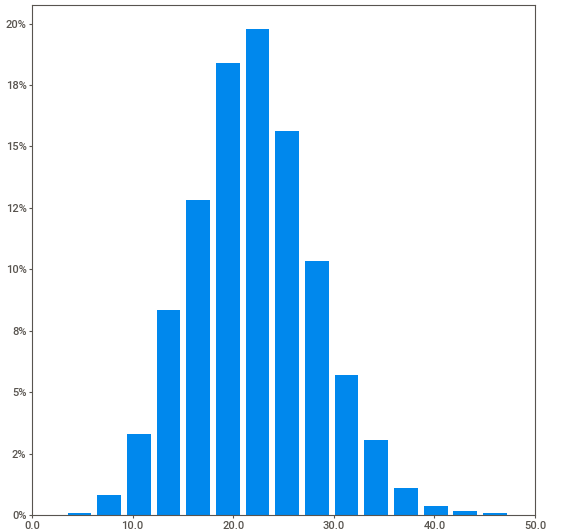
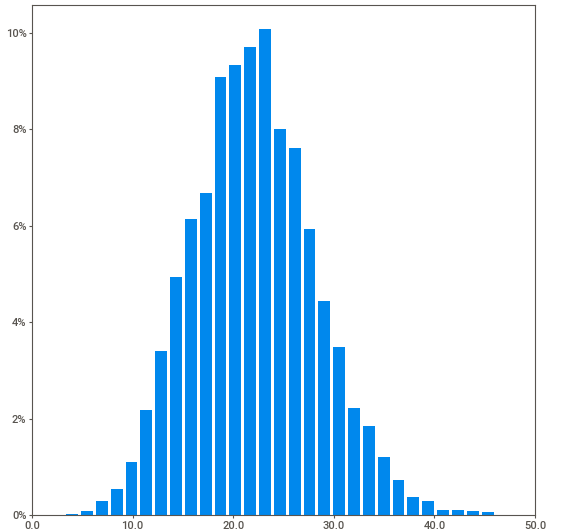
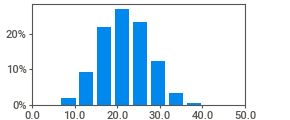
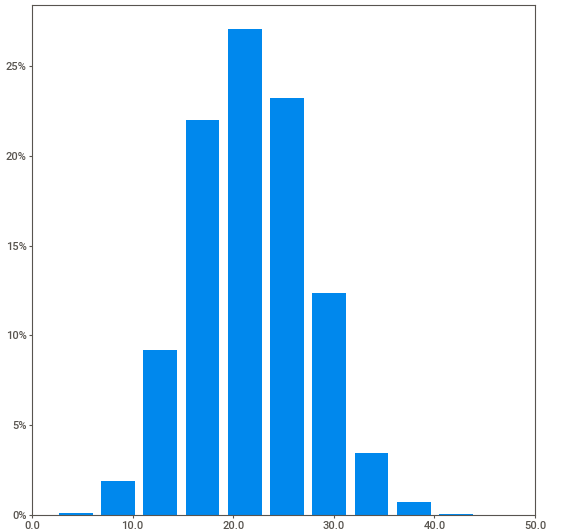
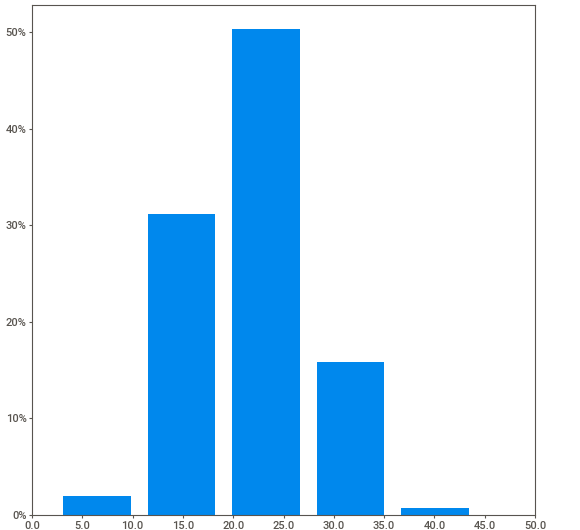
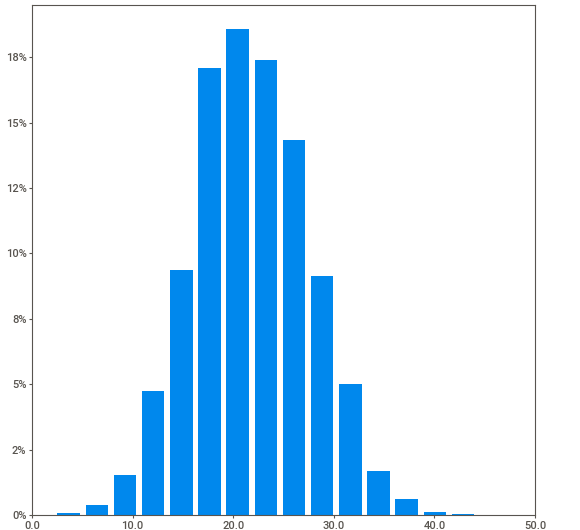
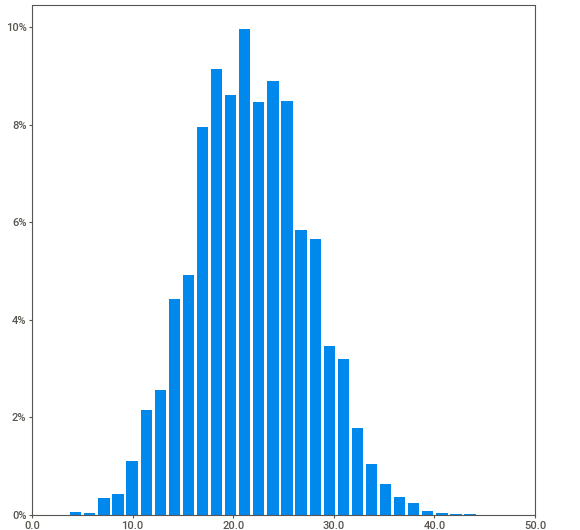
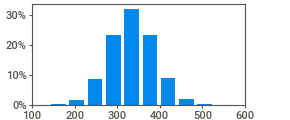
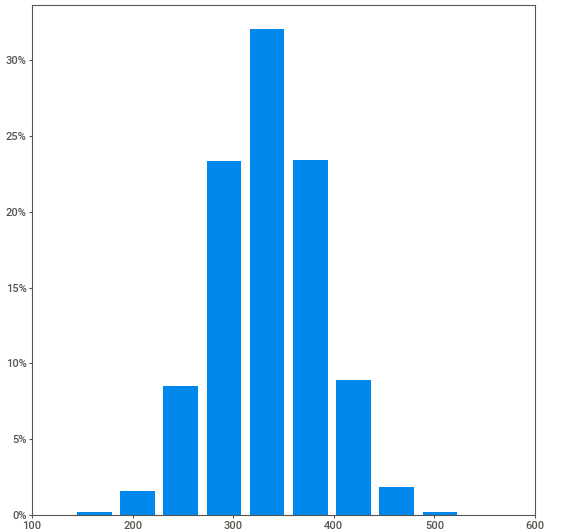
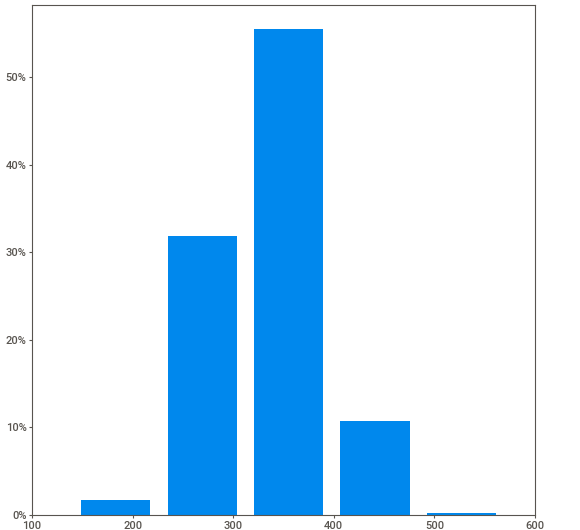
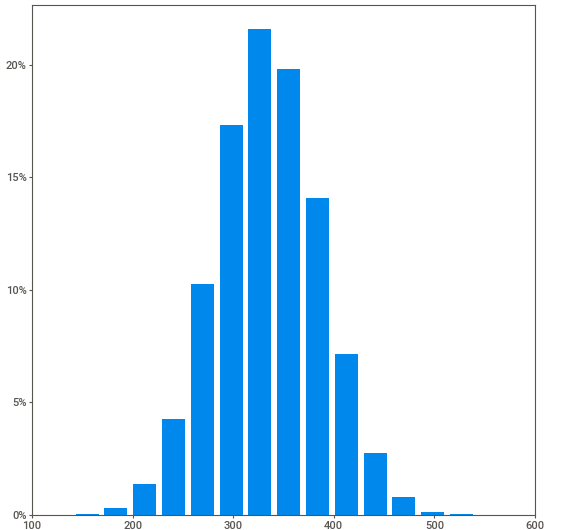
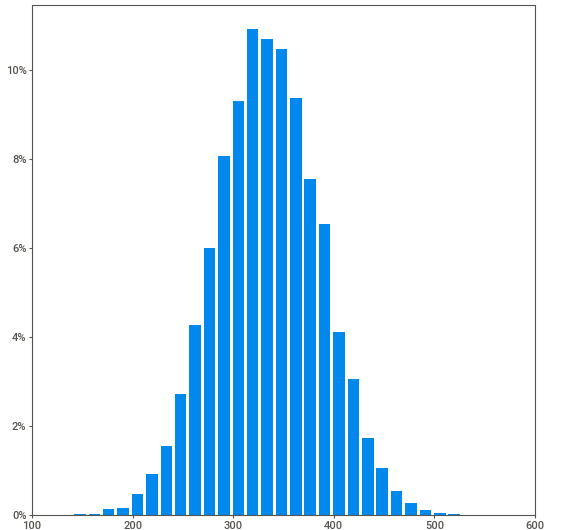
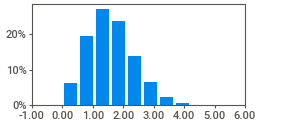
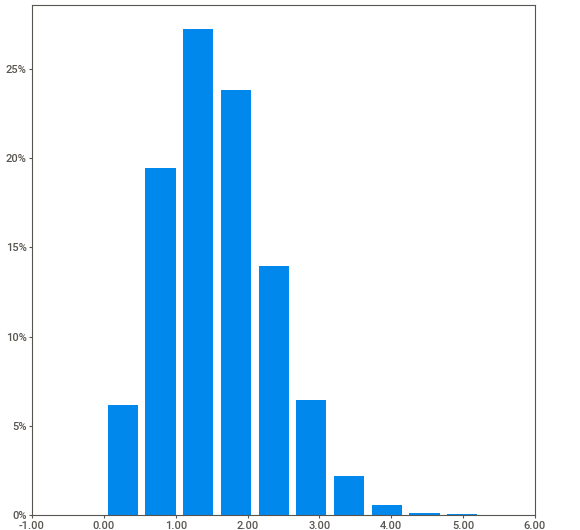
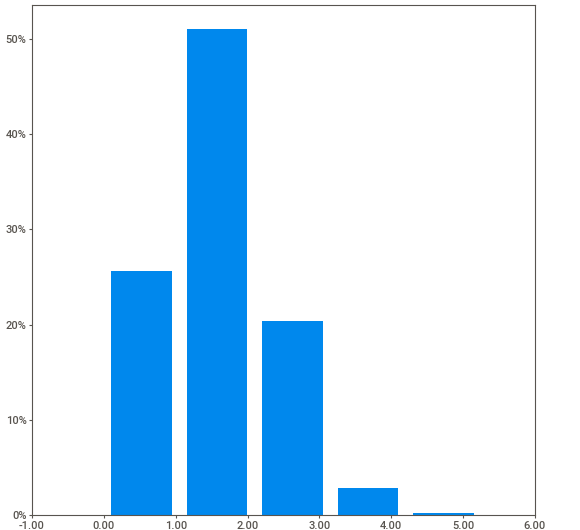
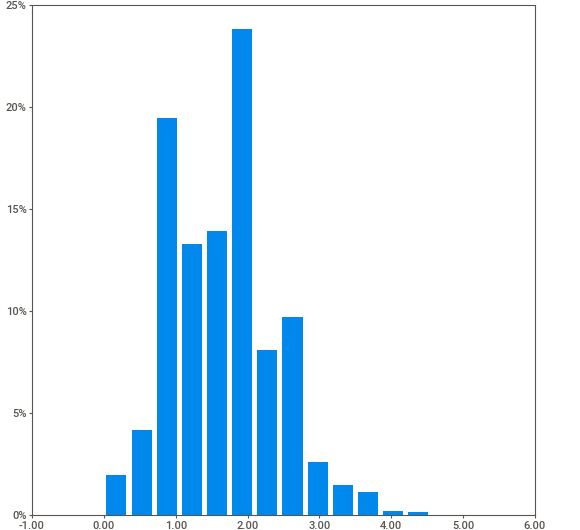
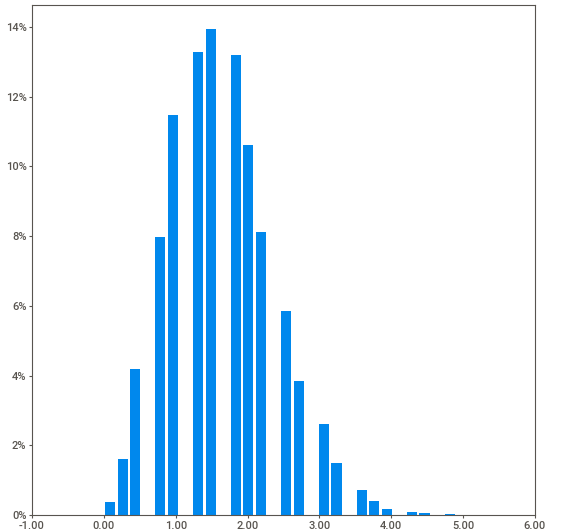
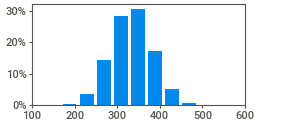
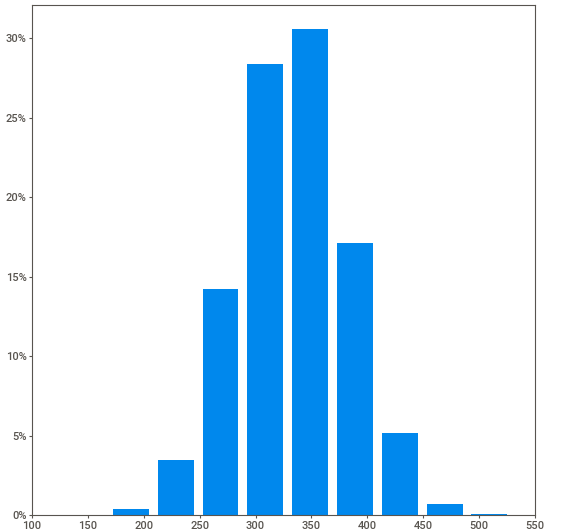
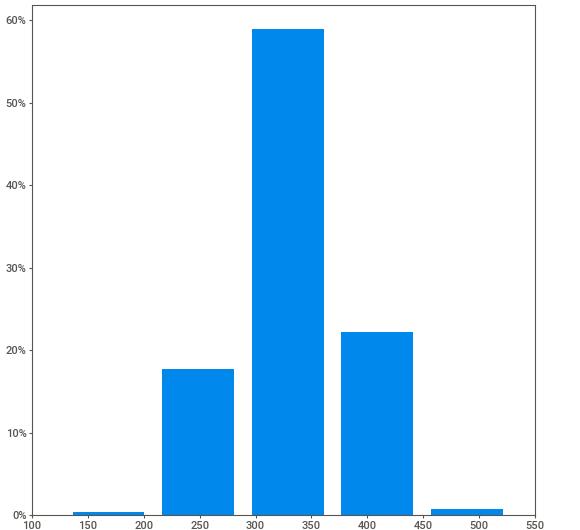
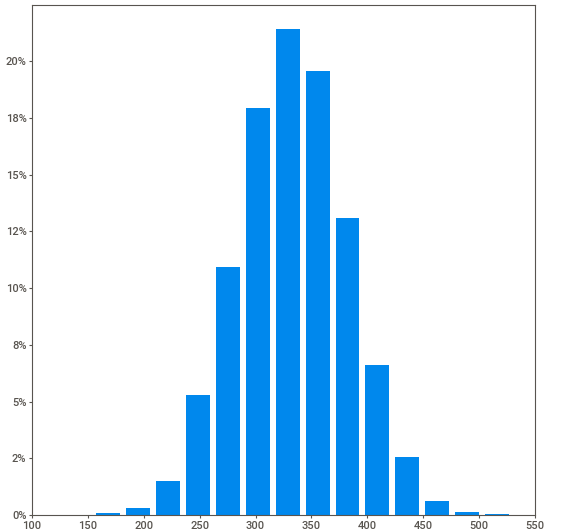
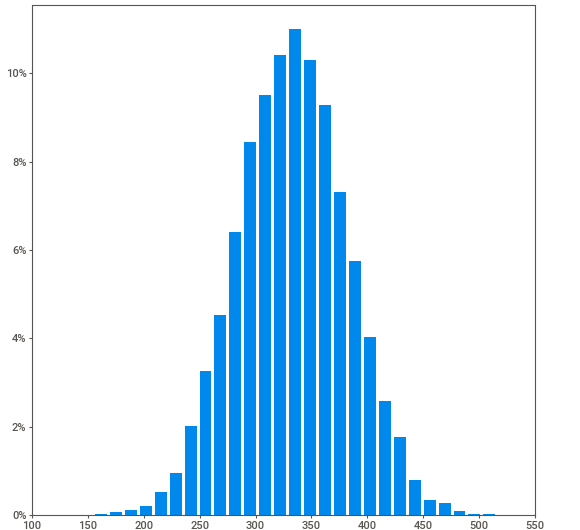
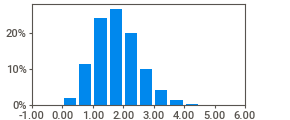
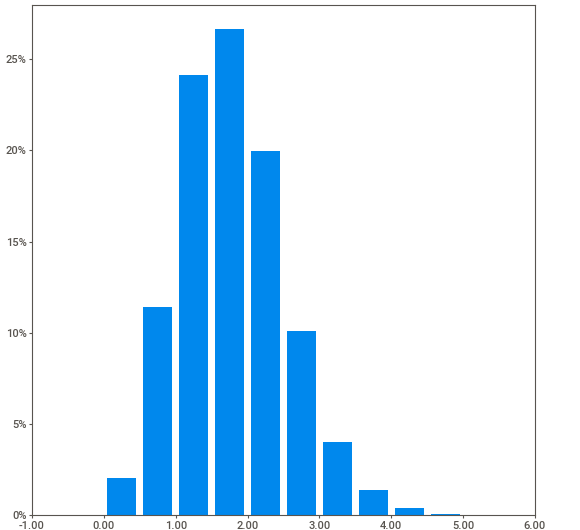
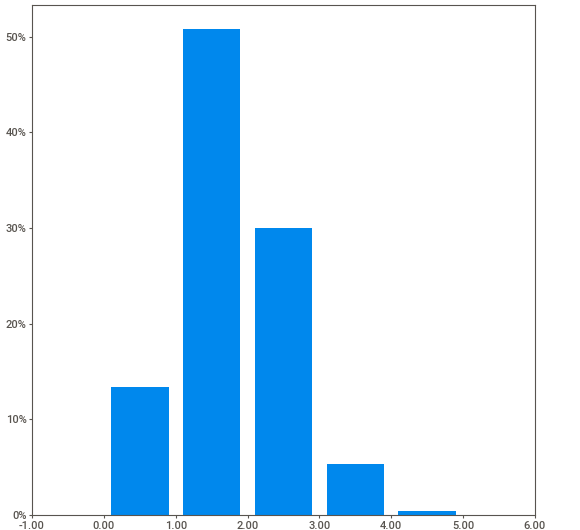
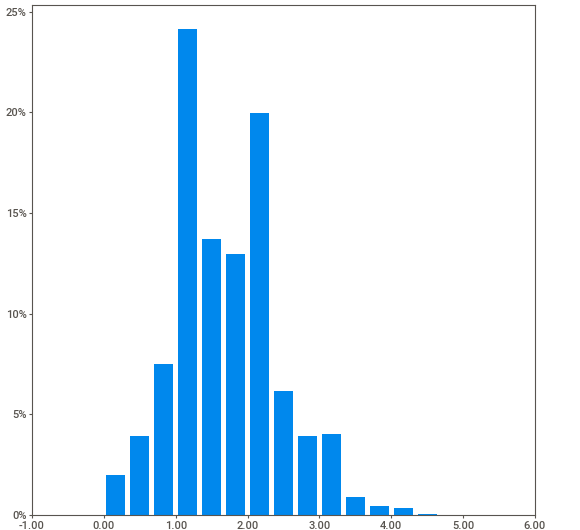
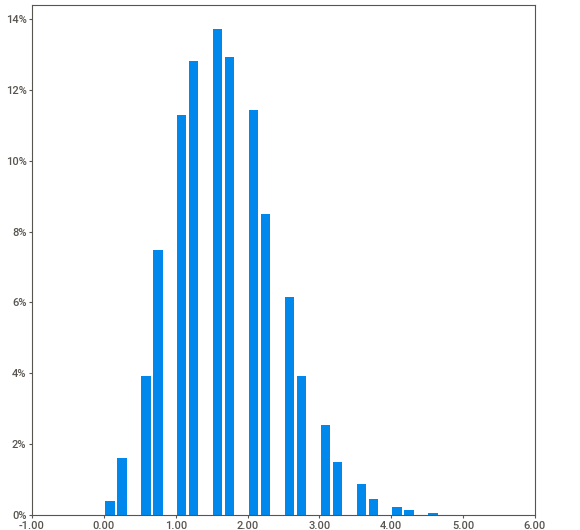
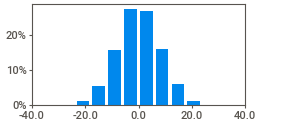
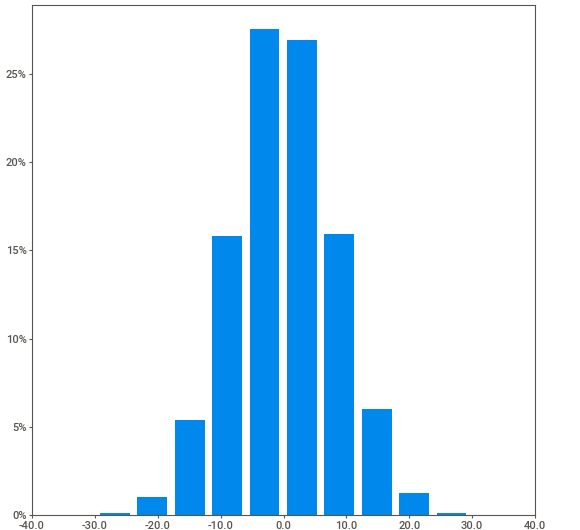
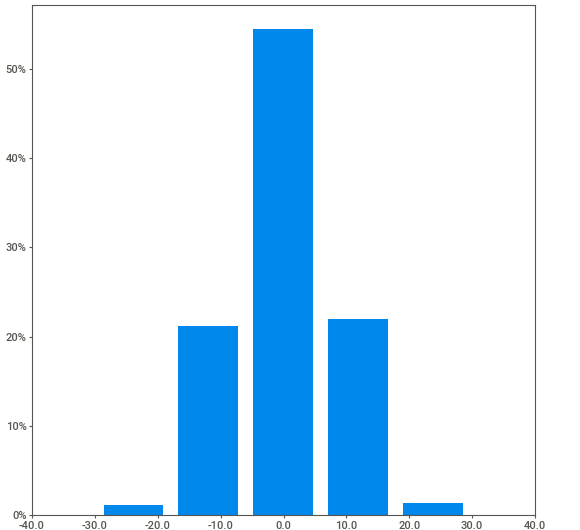
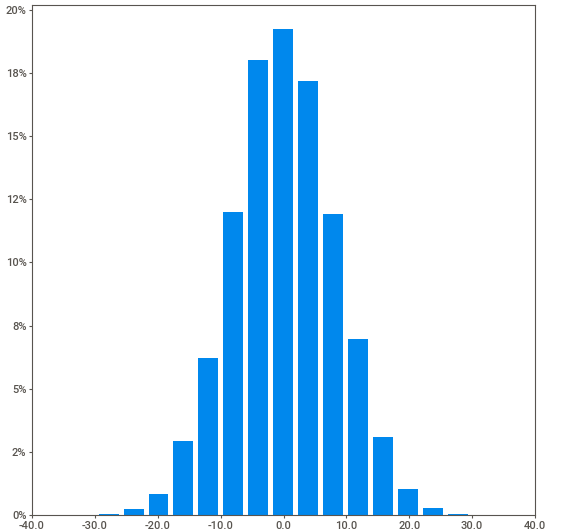
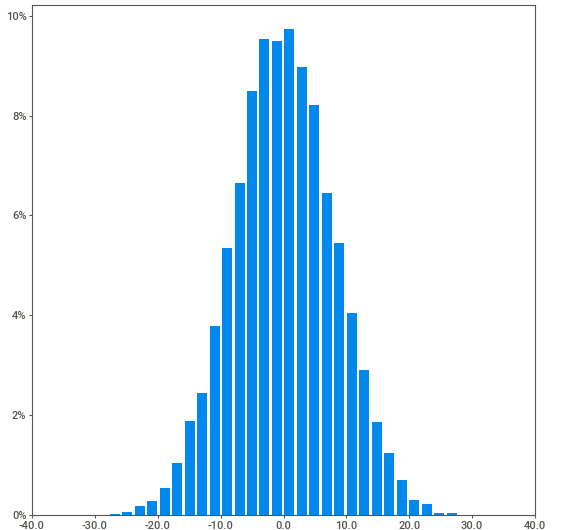
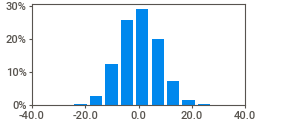
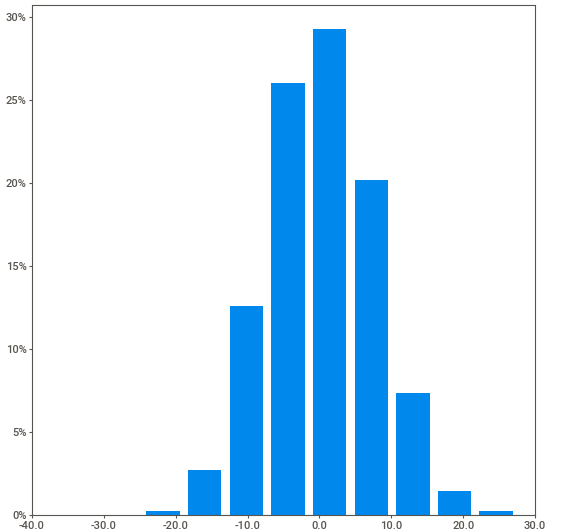
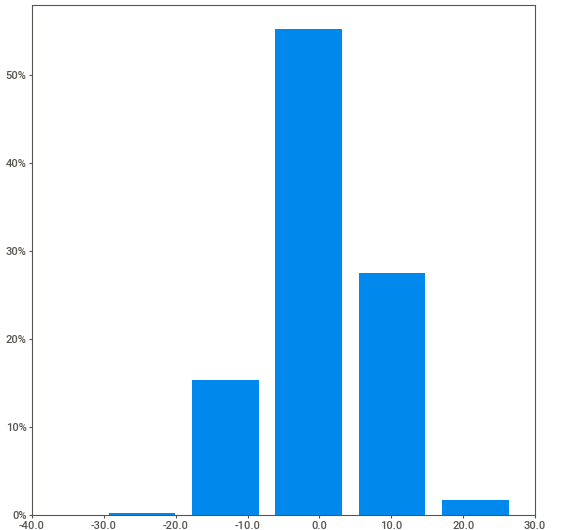
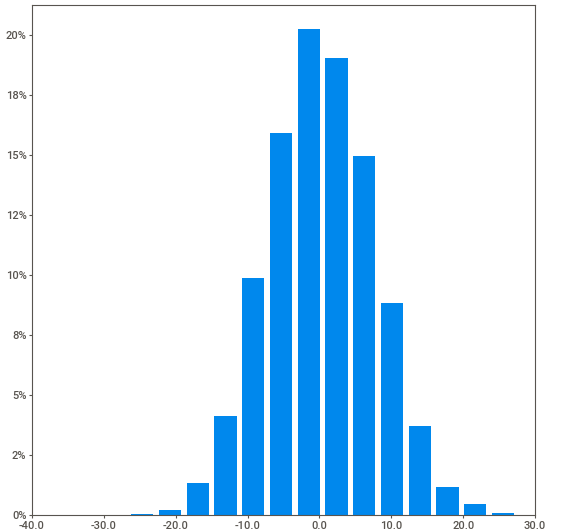
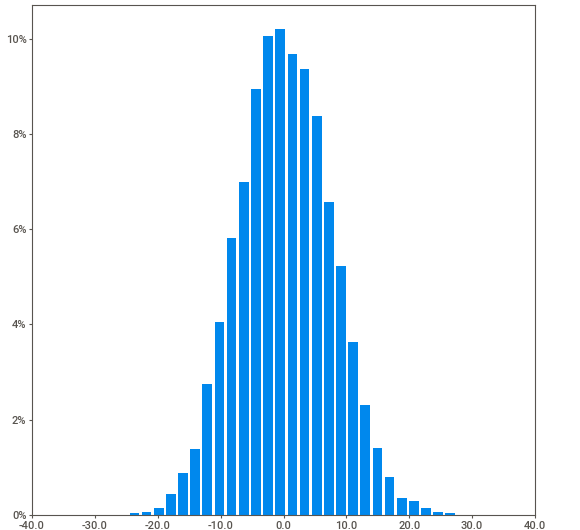
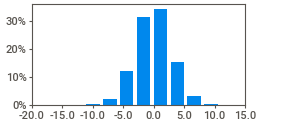
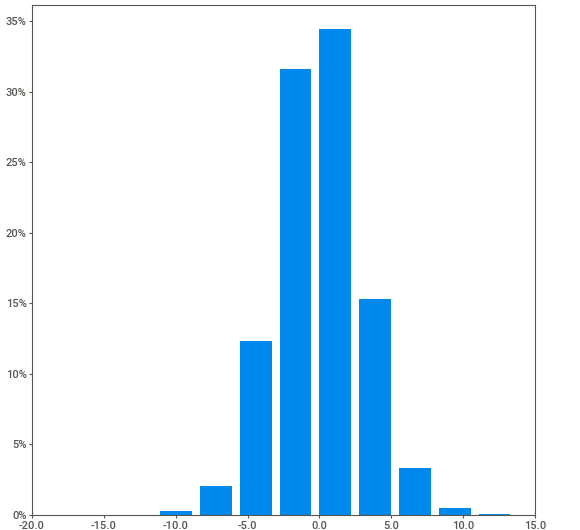
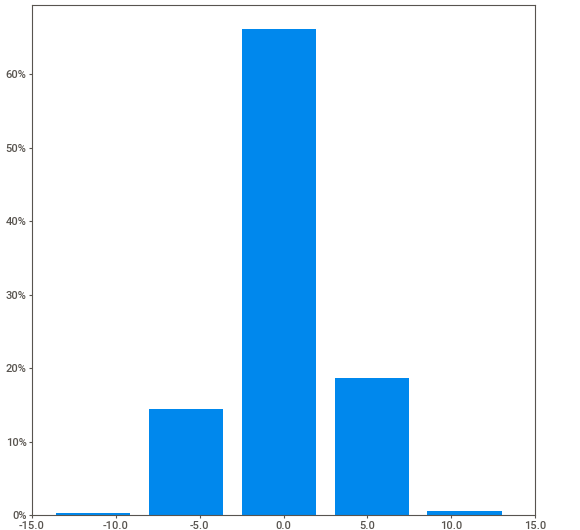
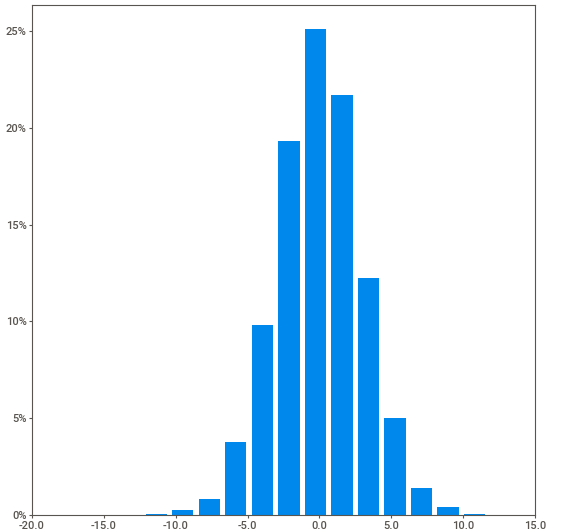
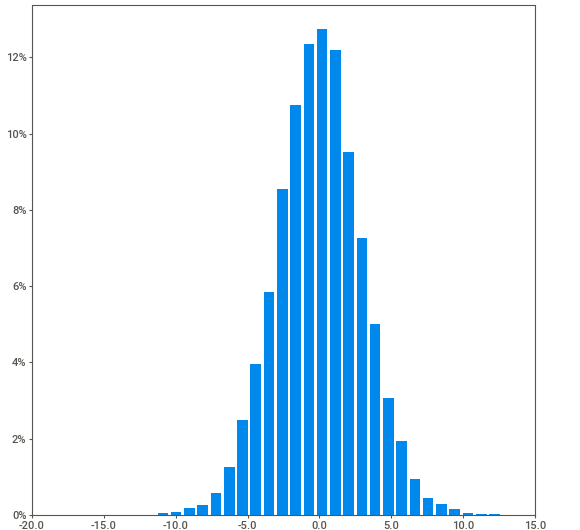
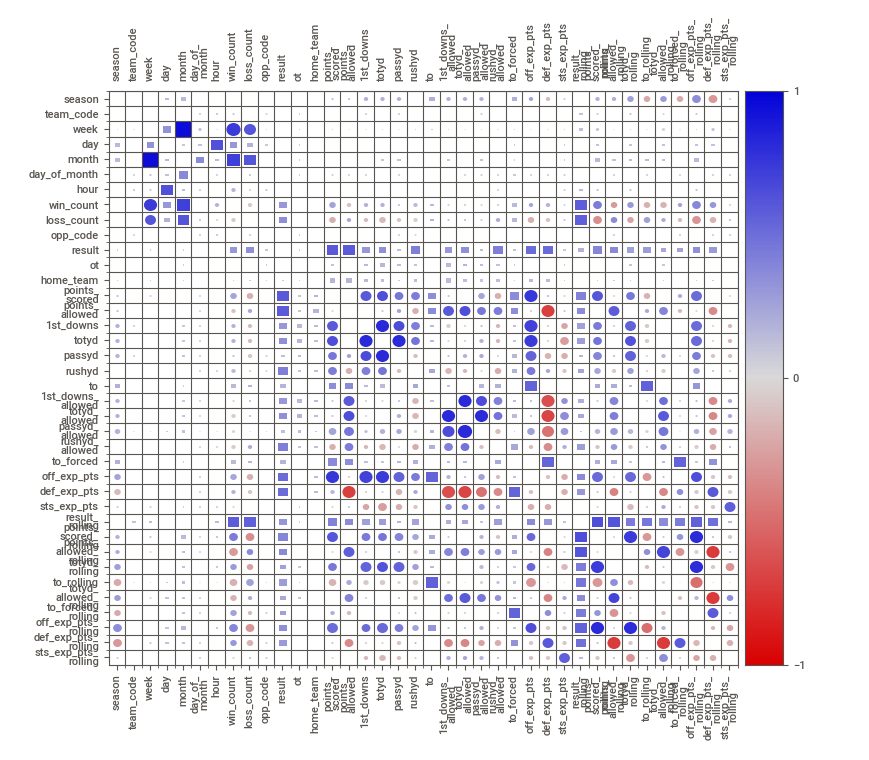
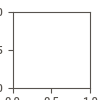

In [54]:
df_report = sv.analyze(df_rolling)
#df_report.show_html()
df_report.show_notebook()


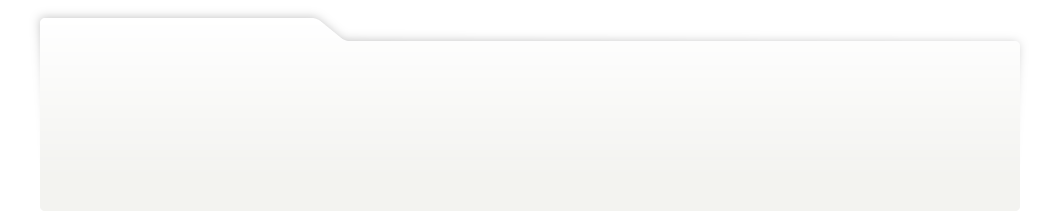
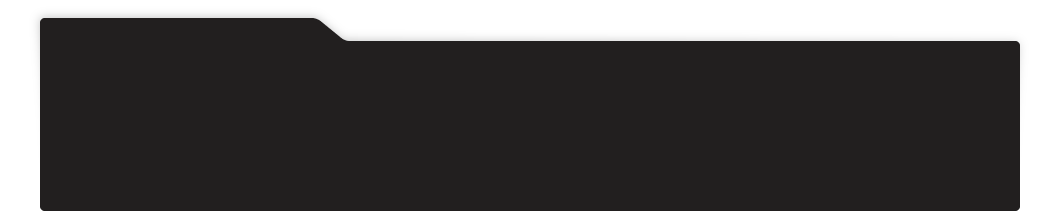
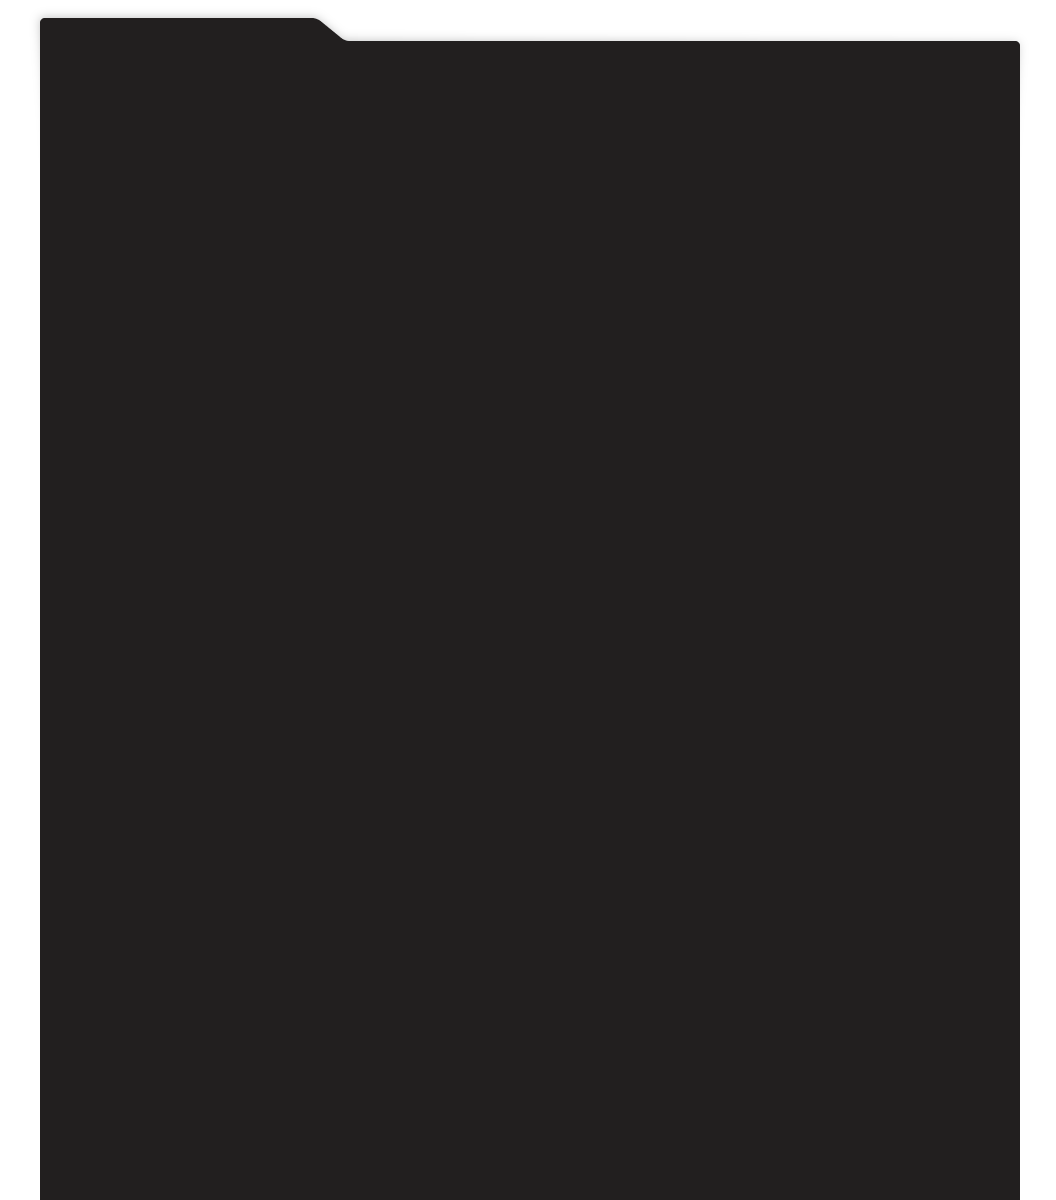
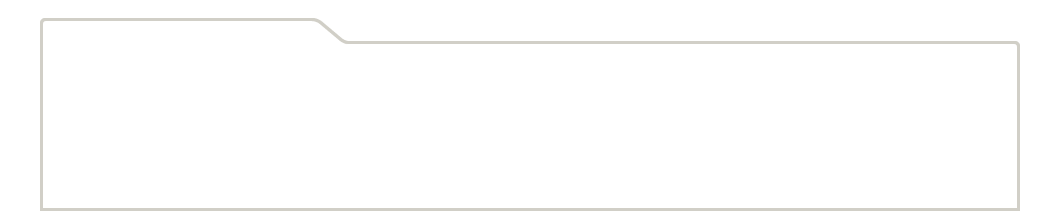
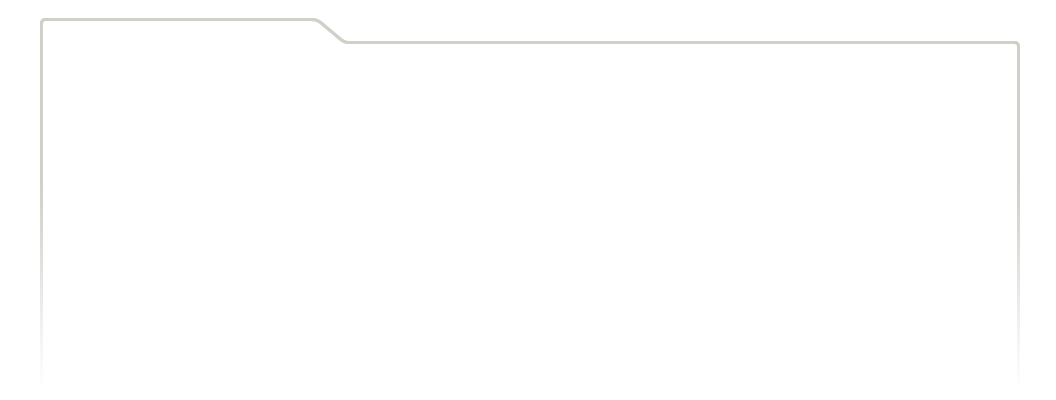
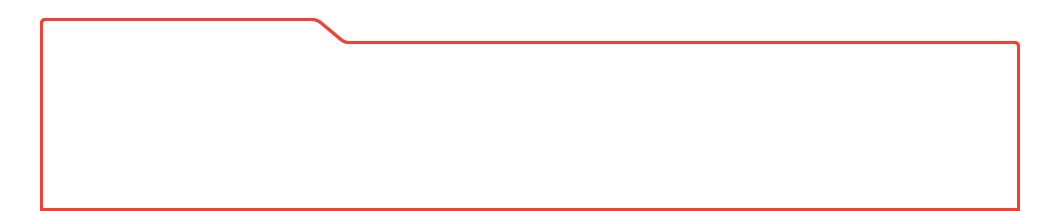
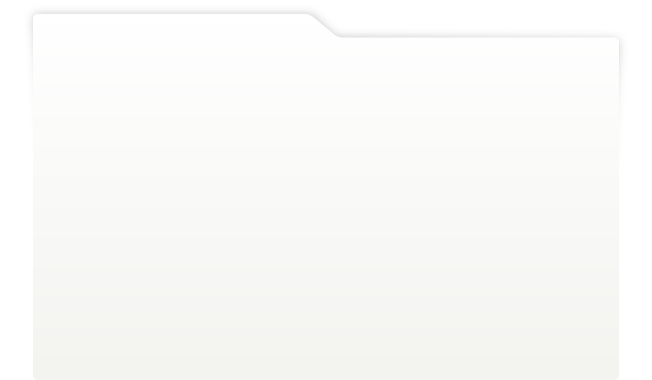
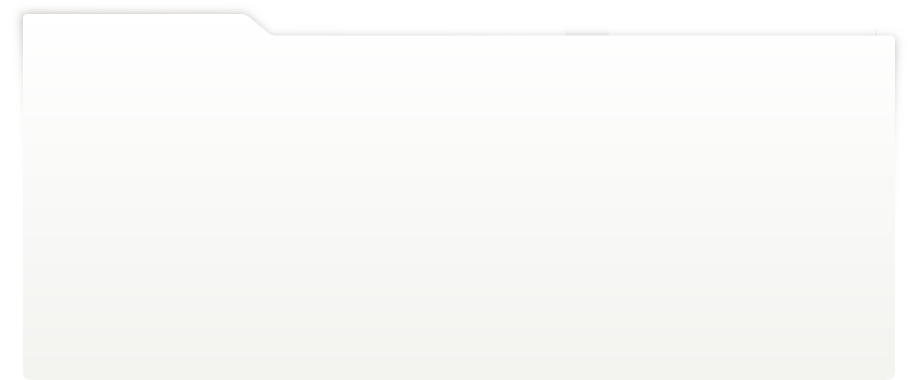
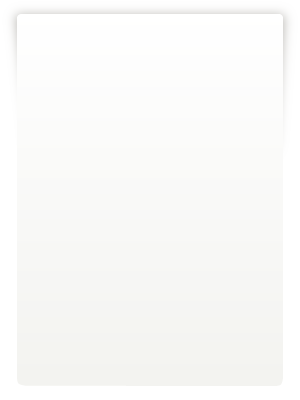
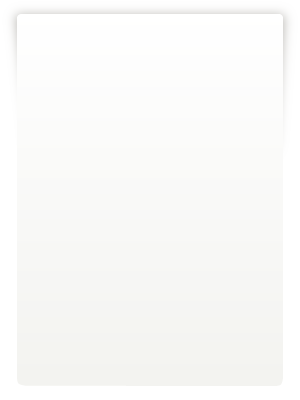
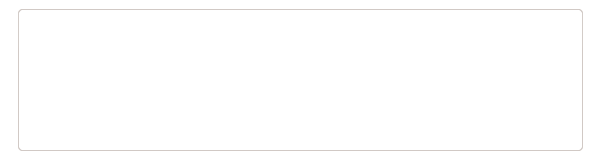
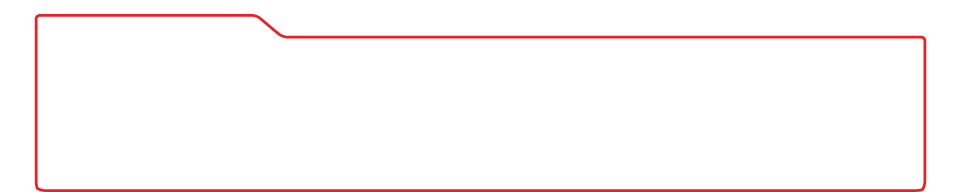
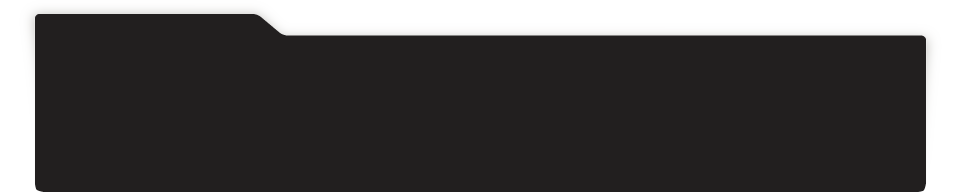
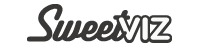
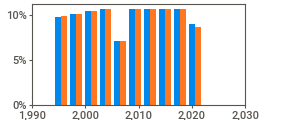
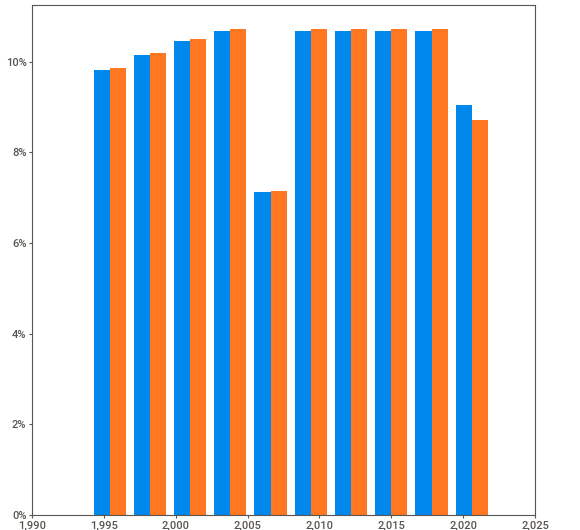
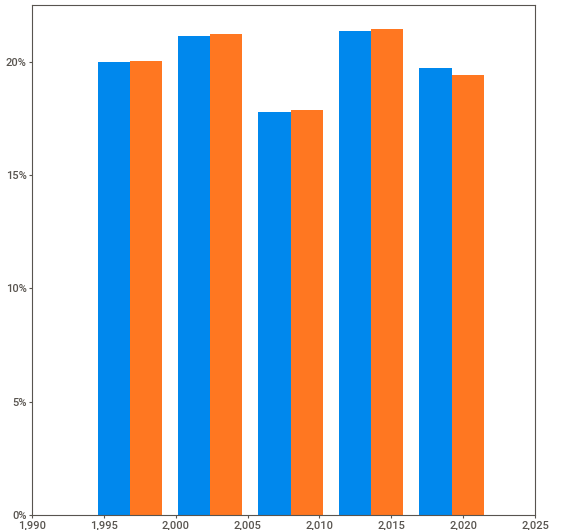
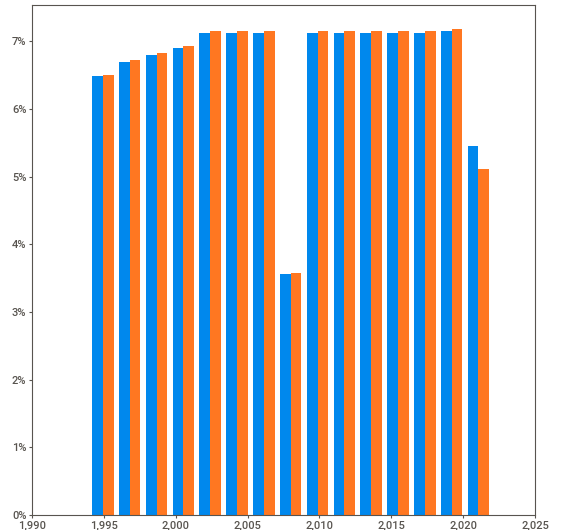
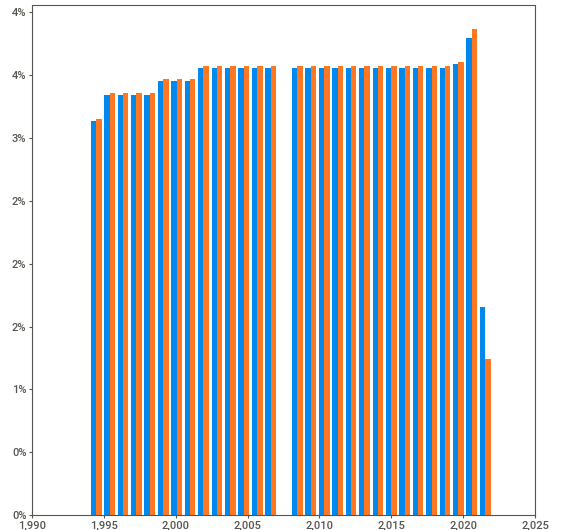
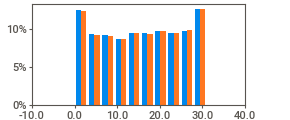
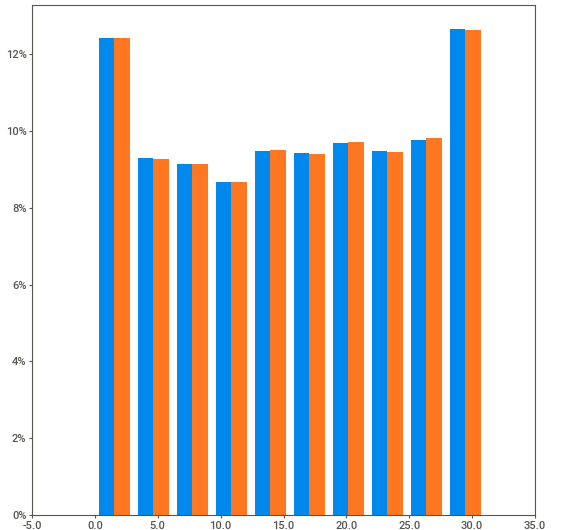
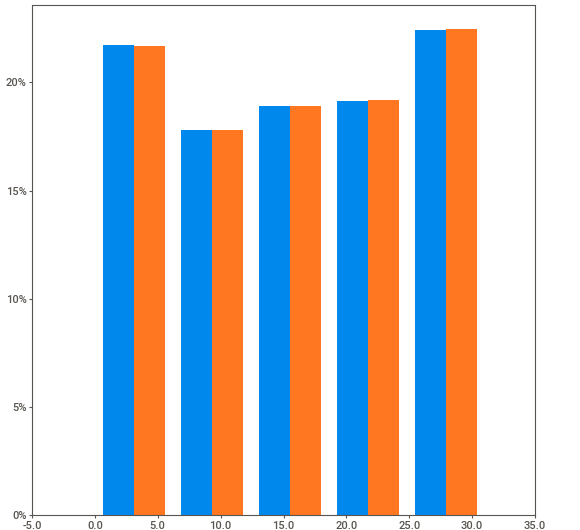
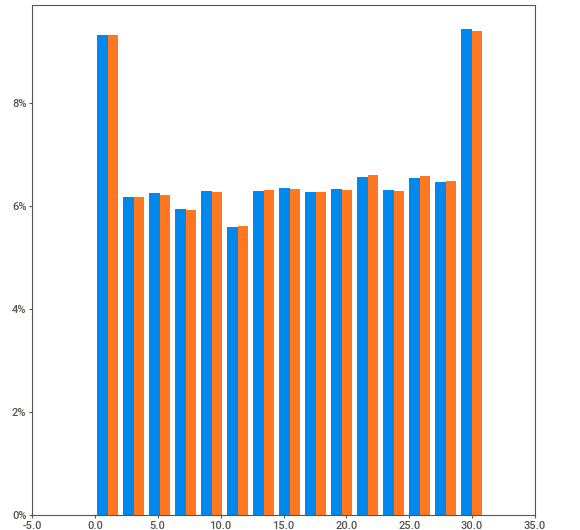
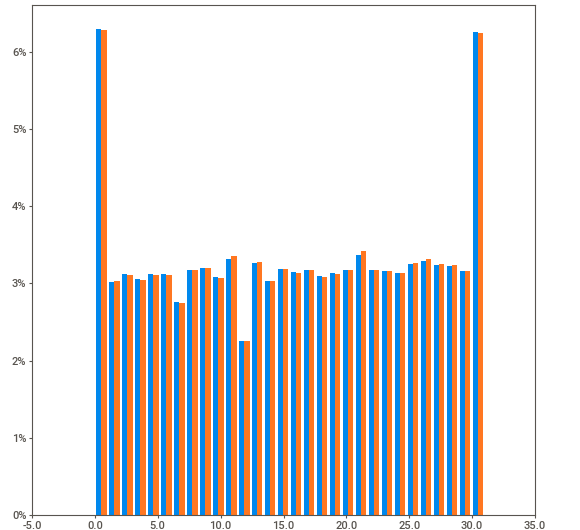
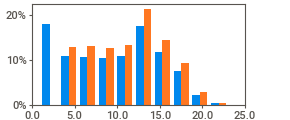
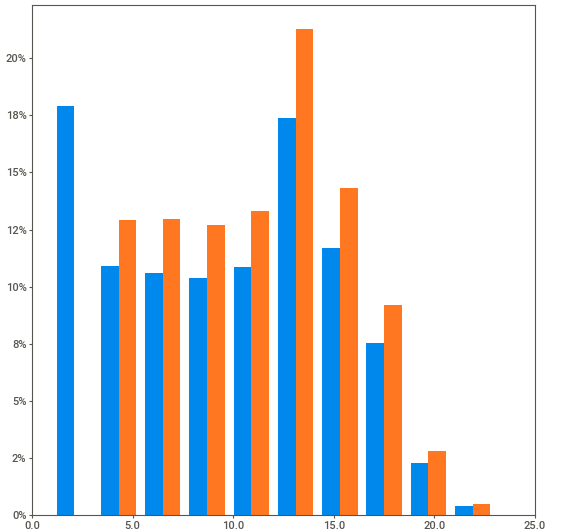
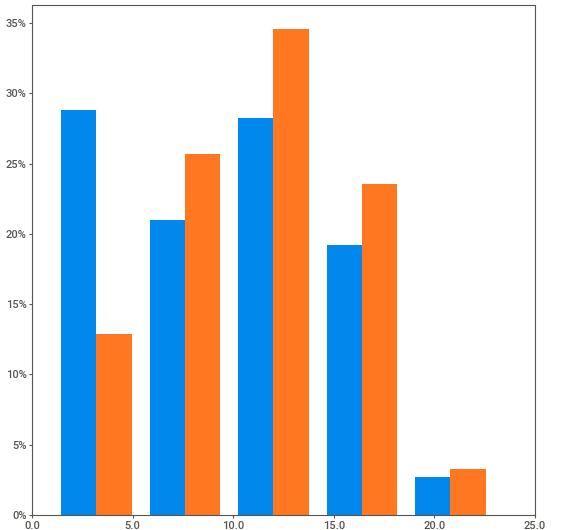
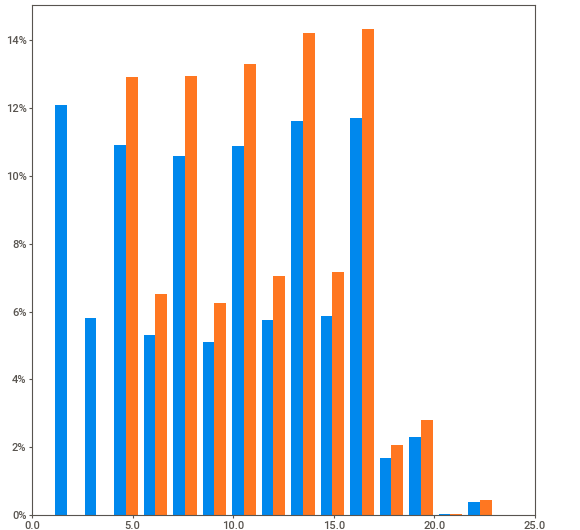
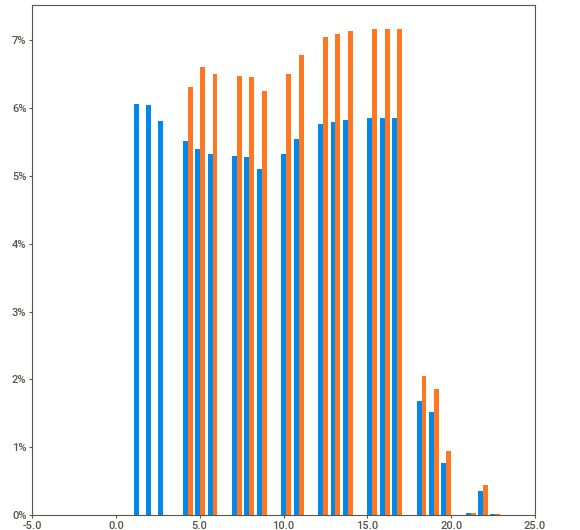
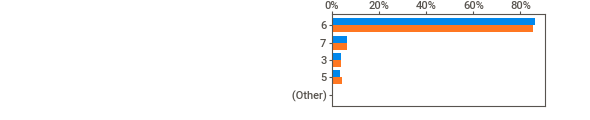
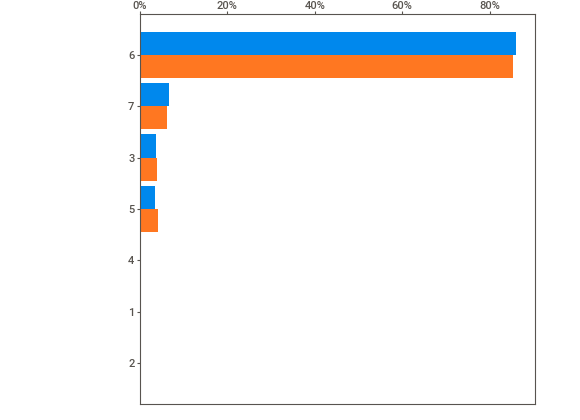
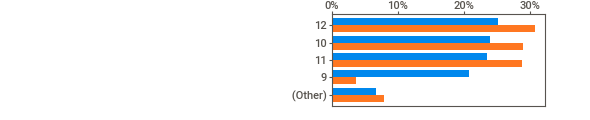
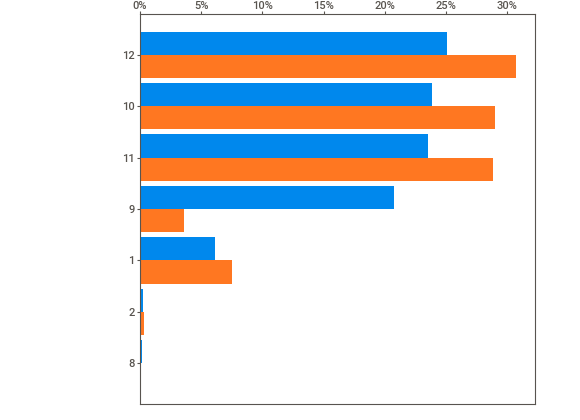
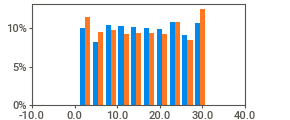
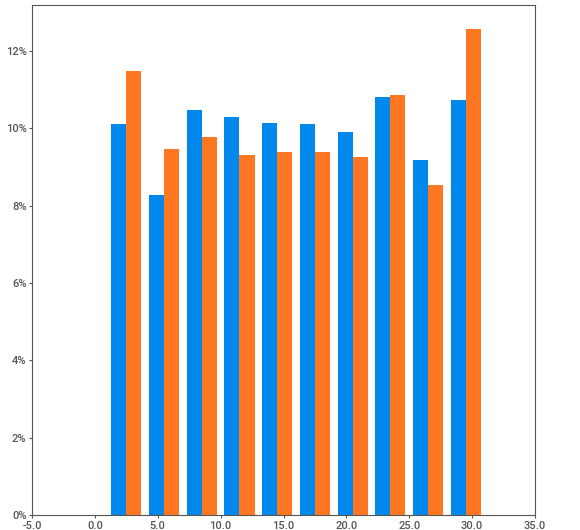
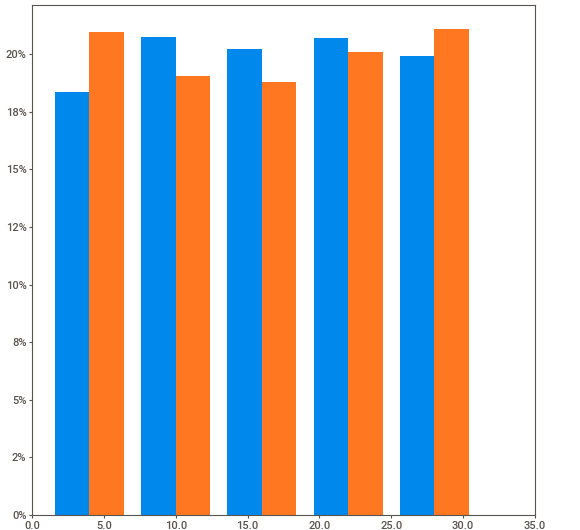
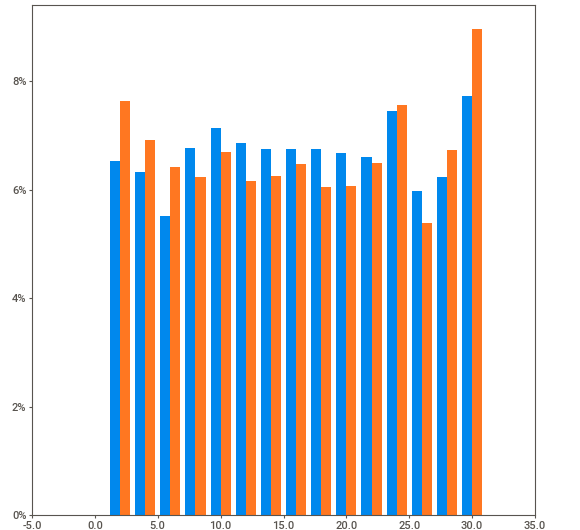
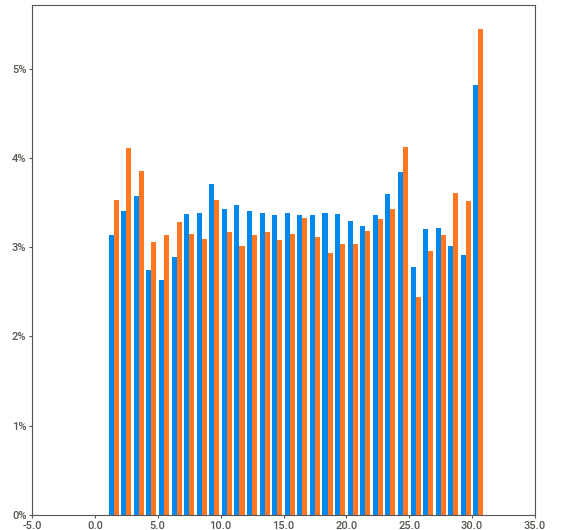
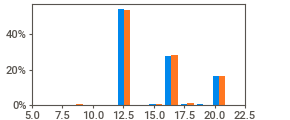
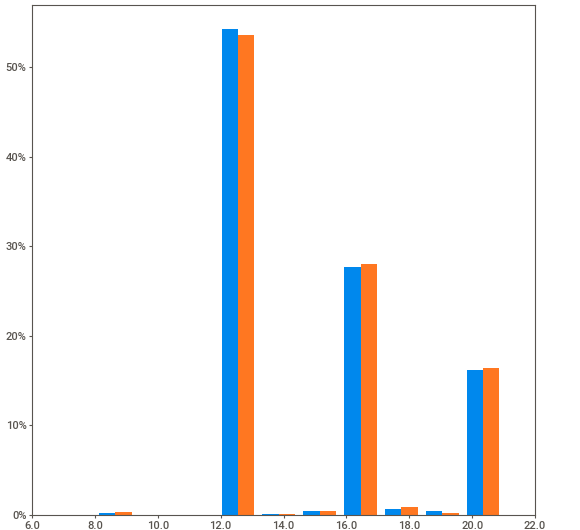
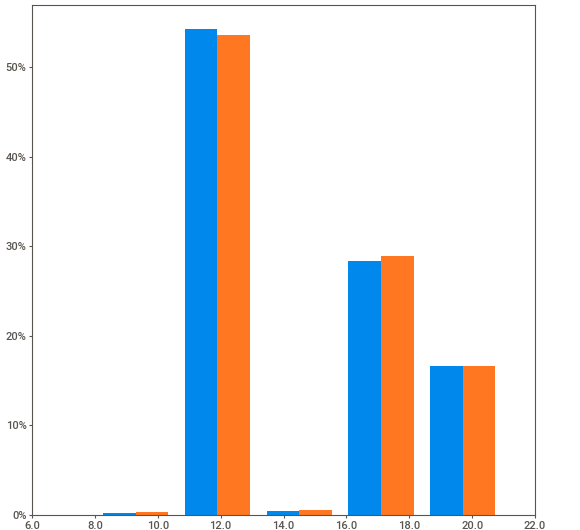
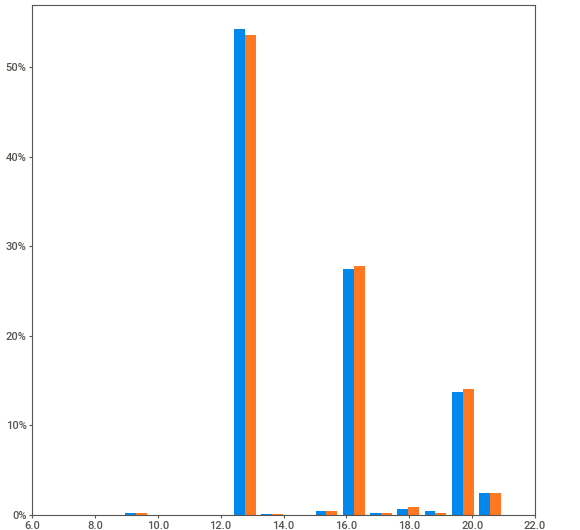
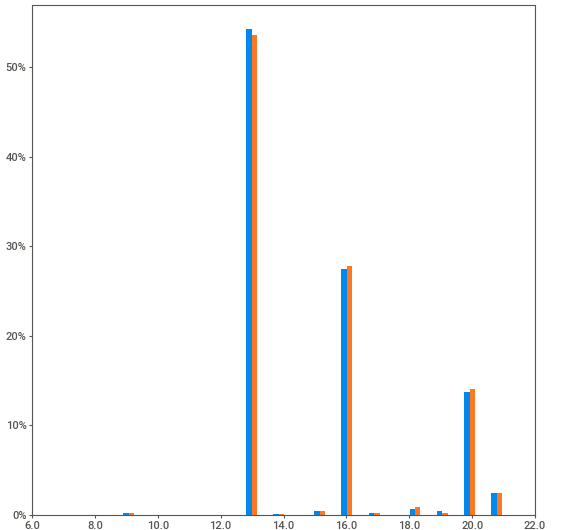
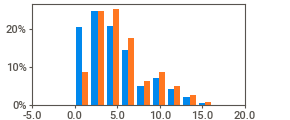
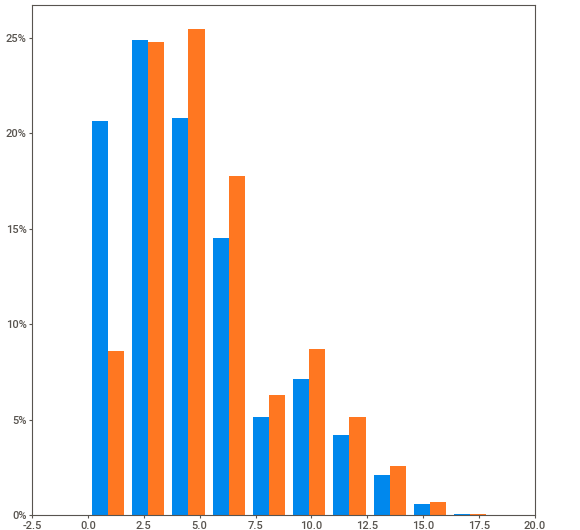
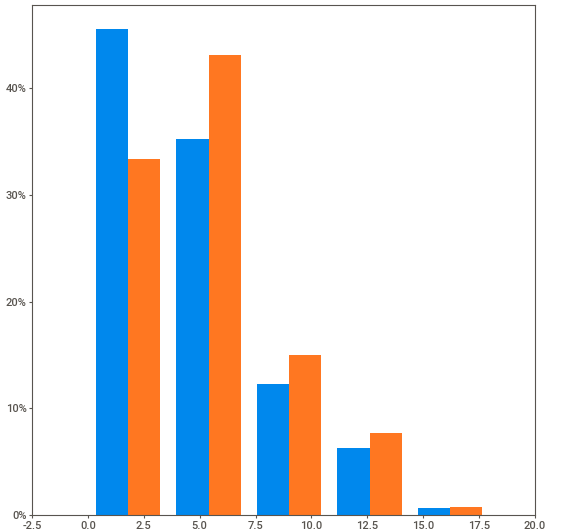
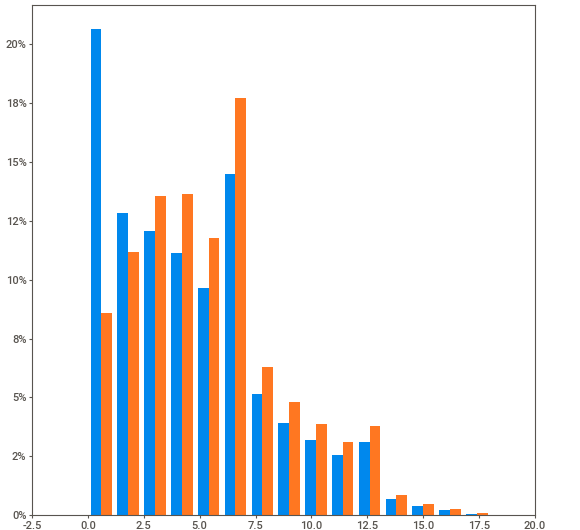
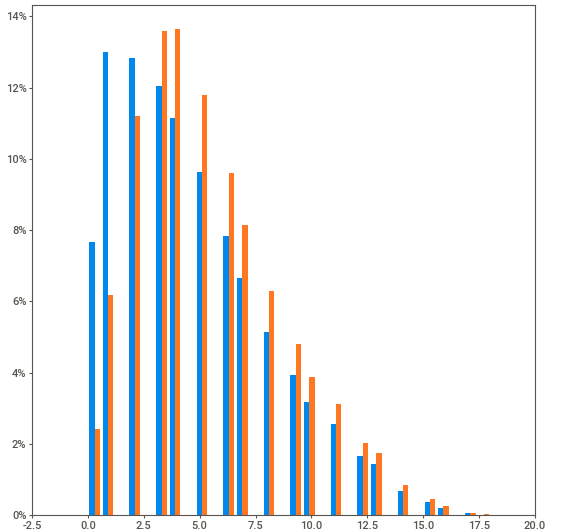
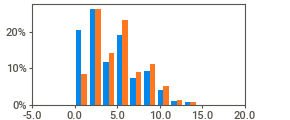
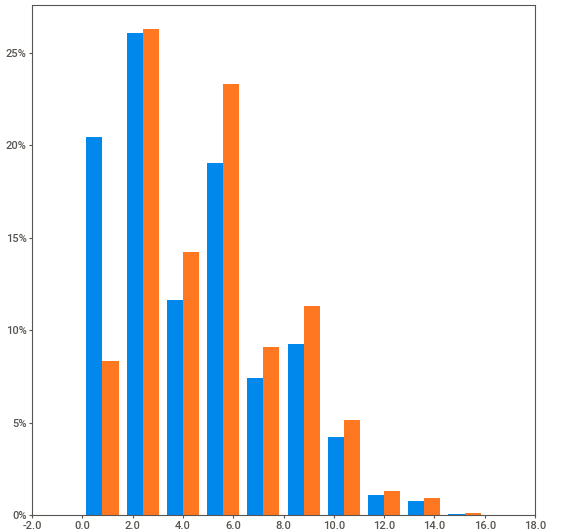
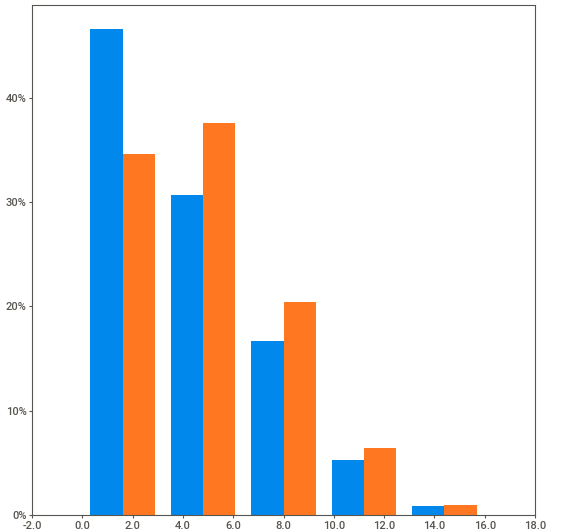
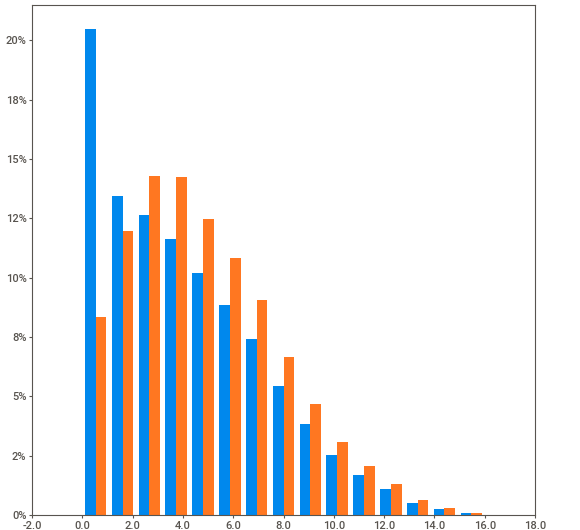
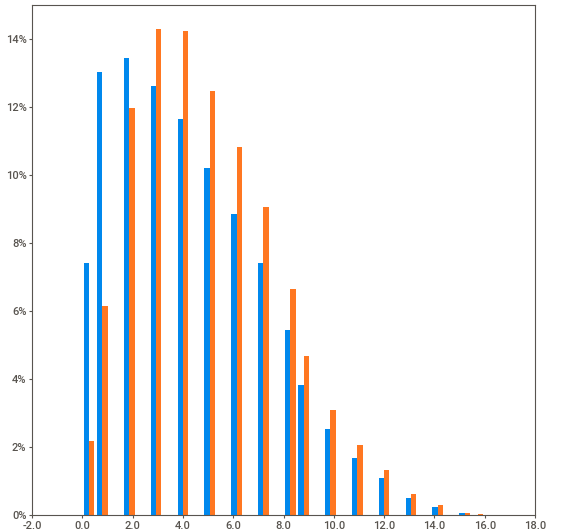
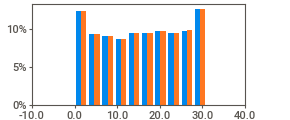
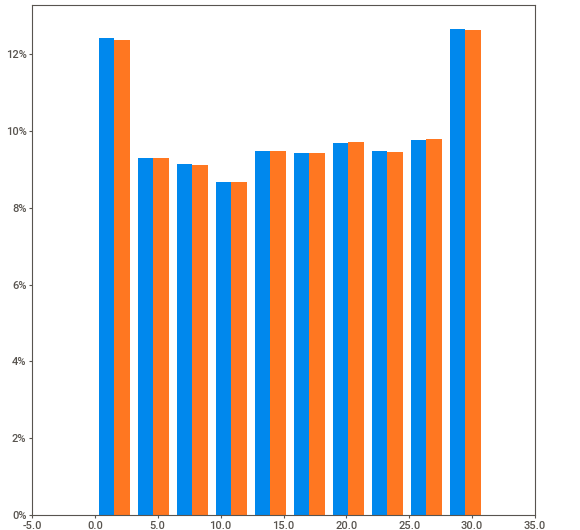
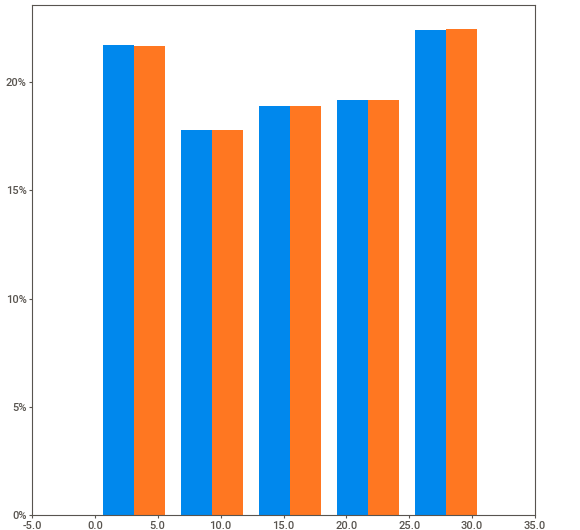
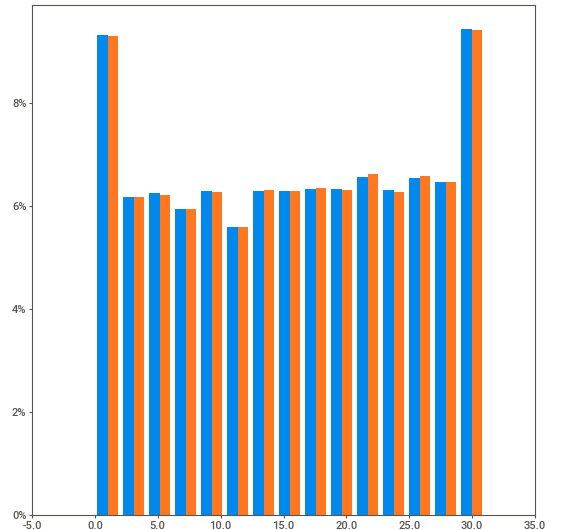
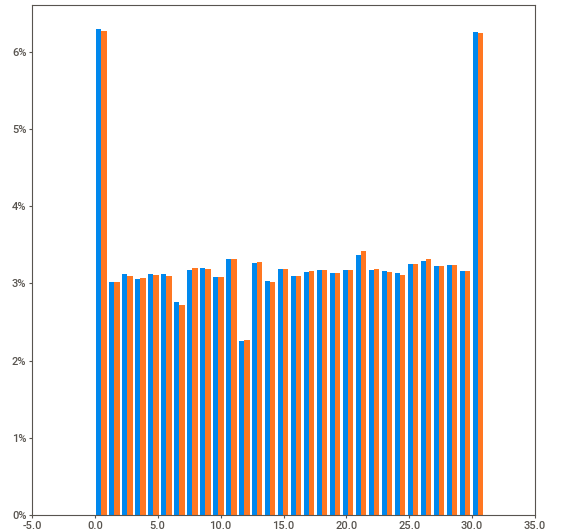
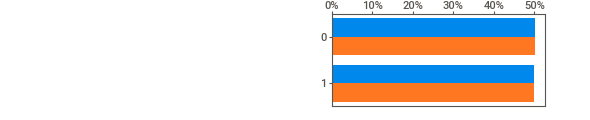
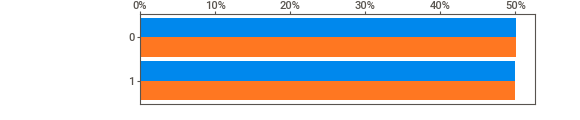
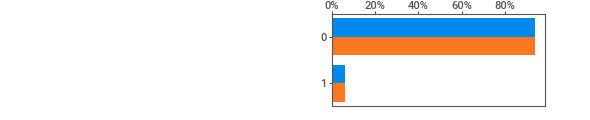
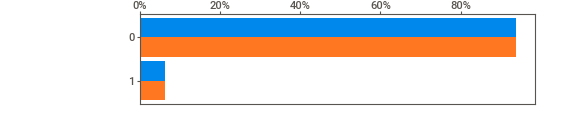
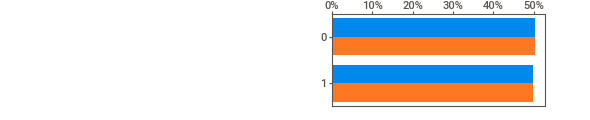
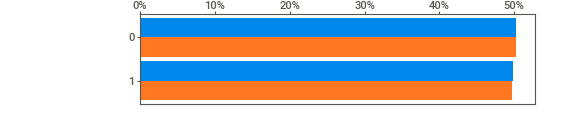
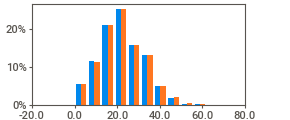
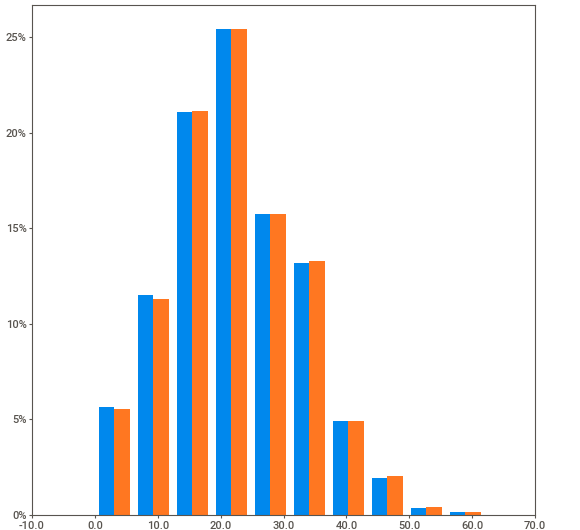
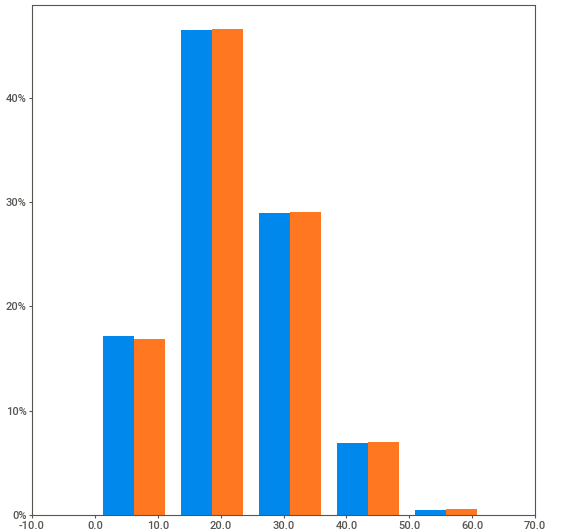
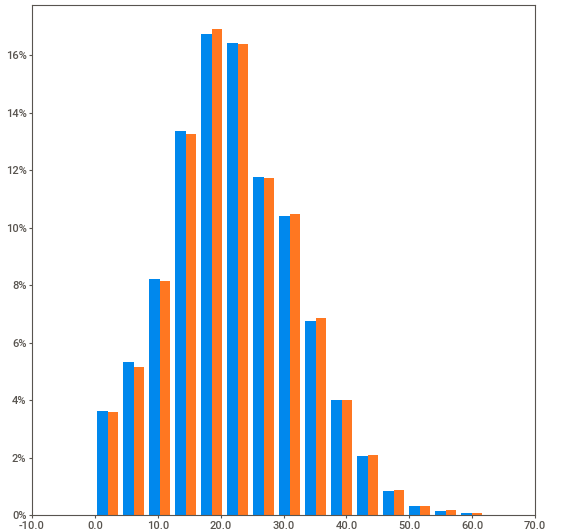
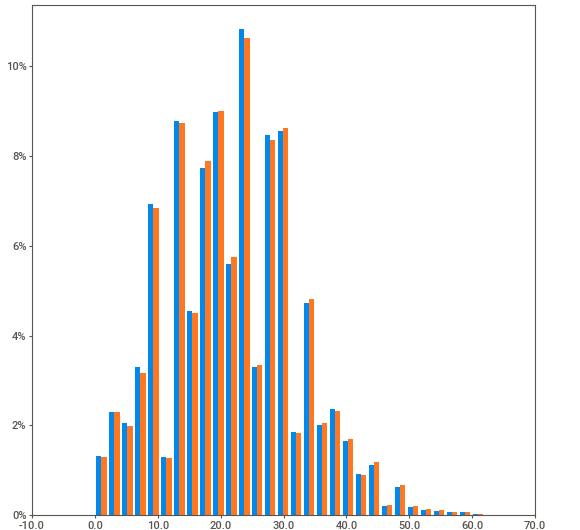
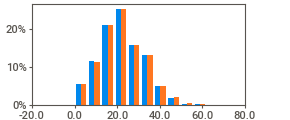
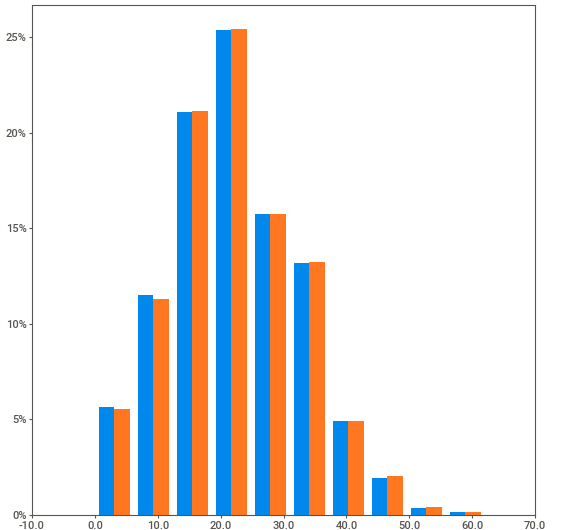
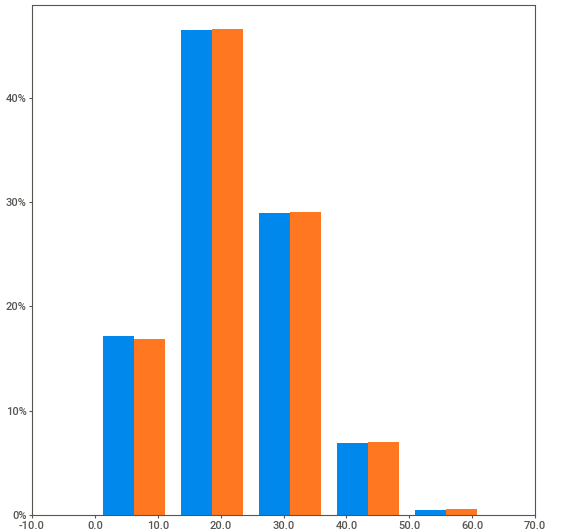
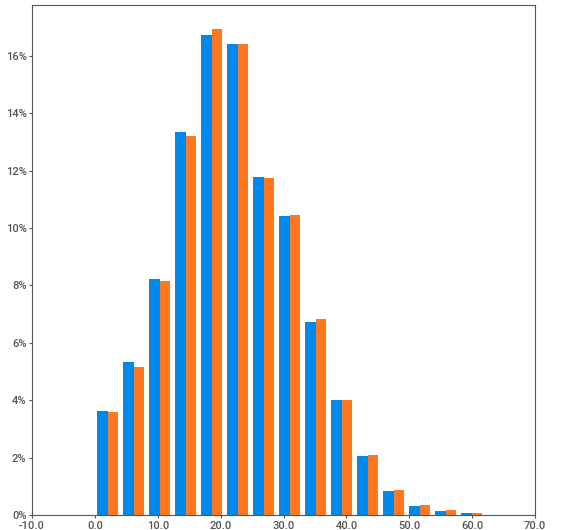
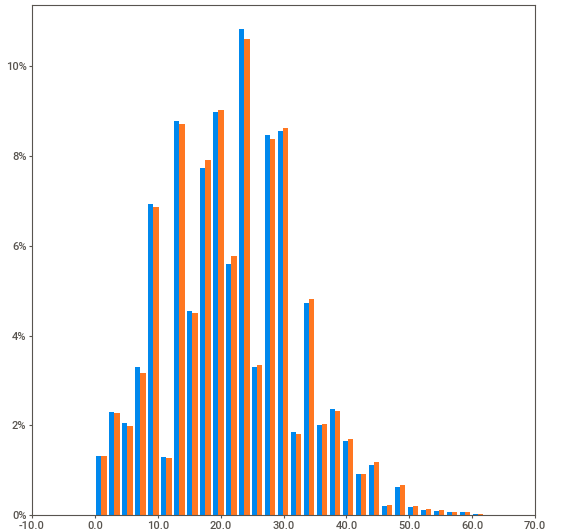
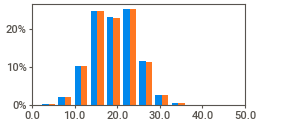
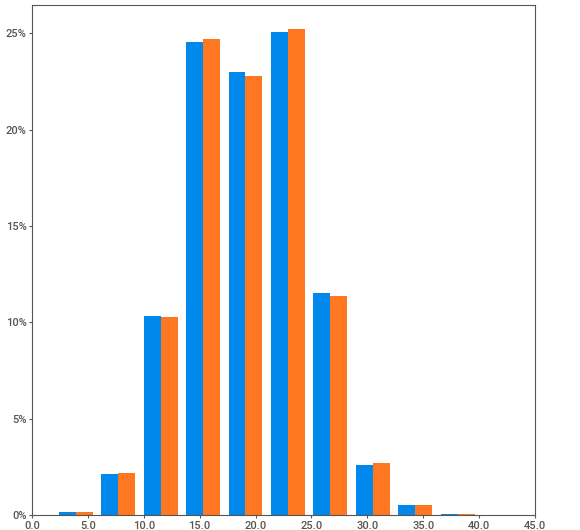
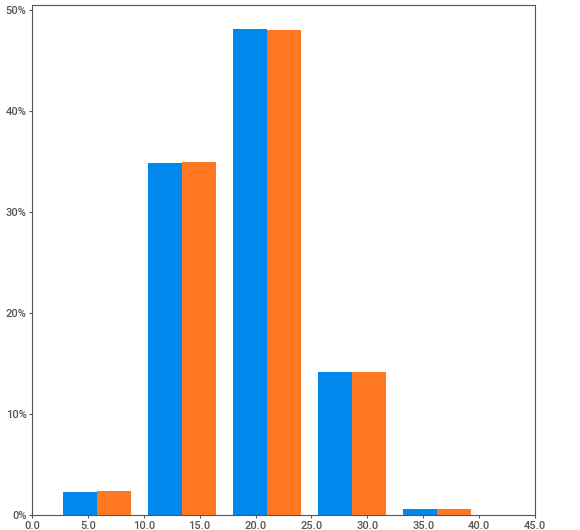
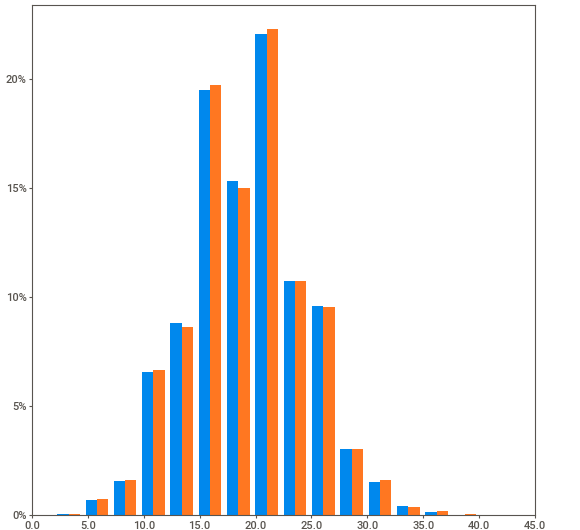
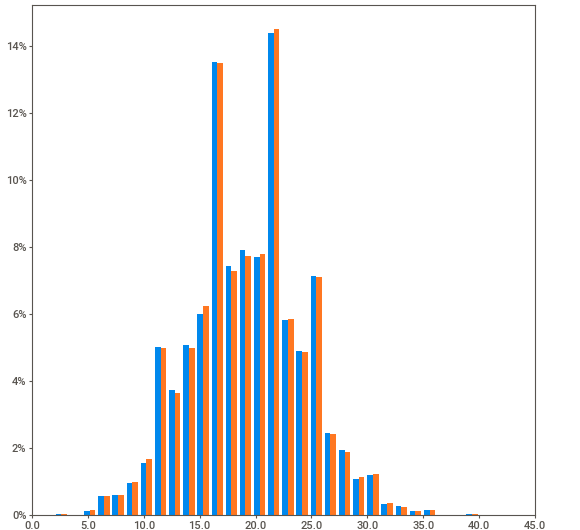
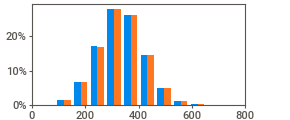
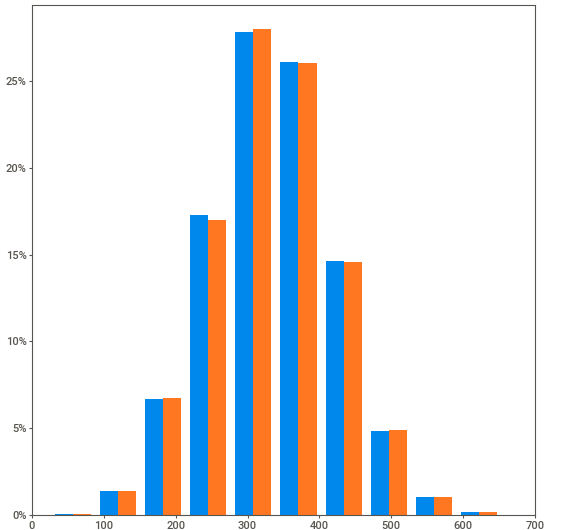
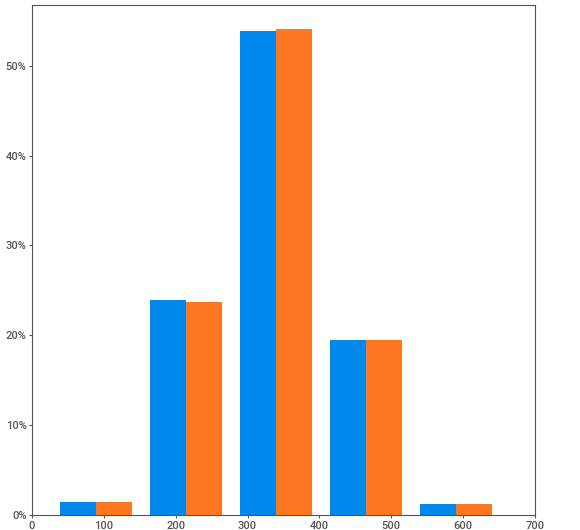
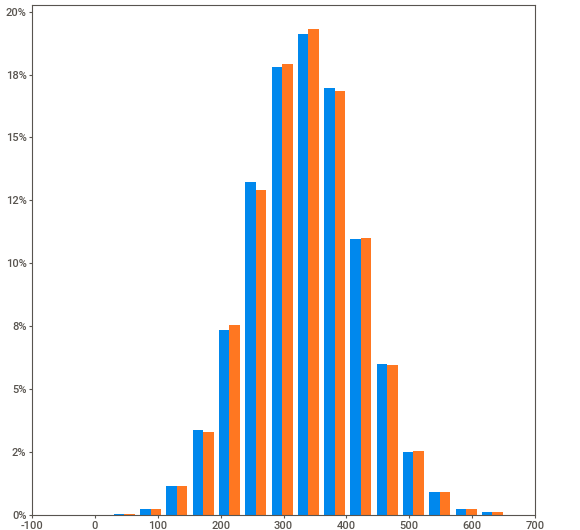
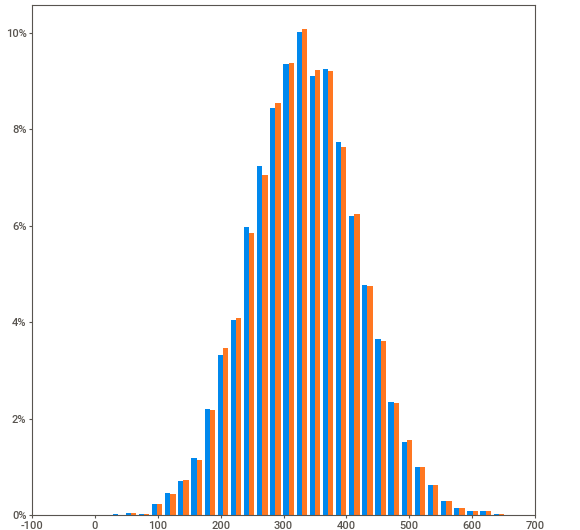
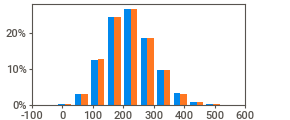
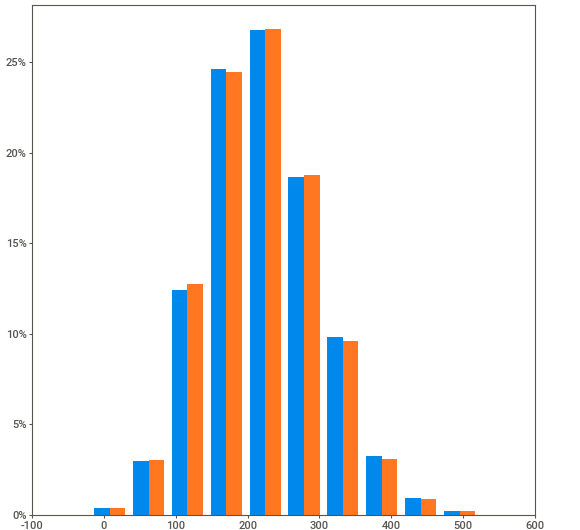
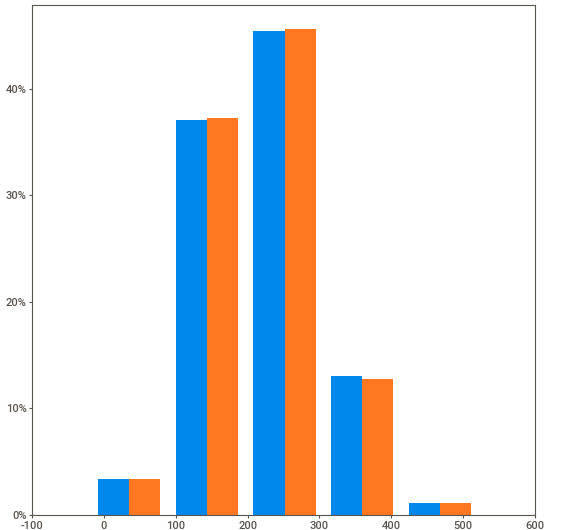
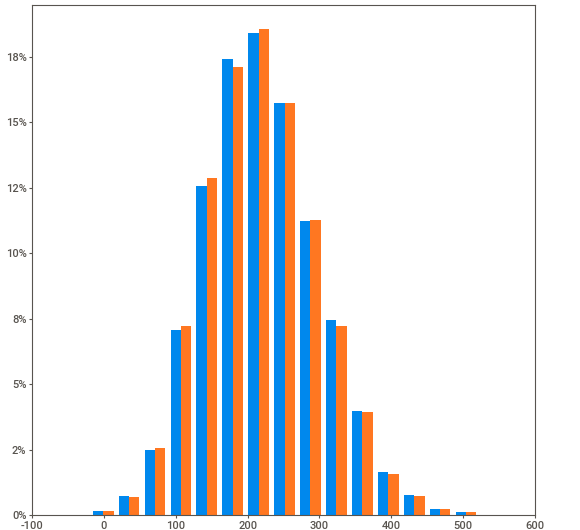
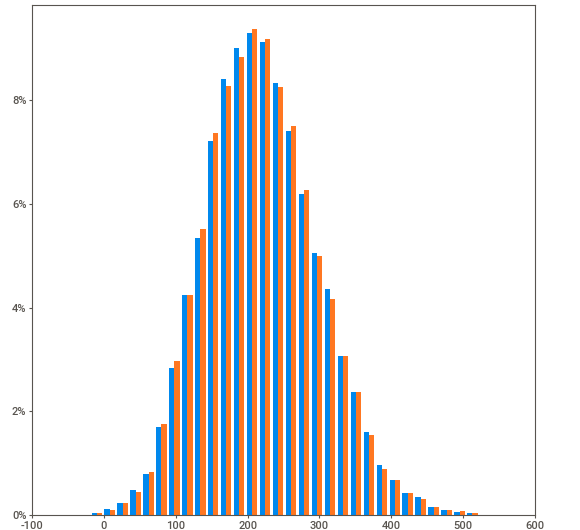
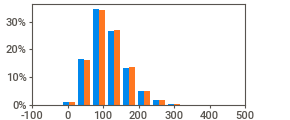
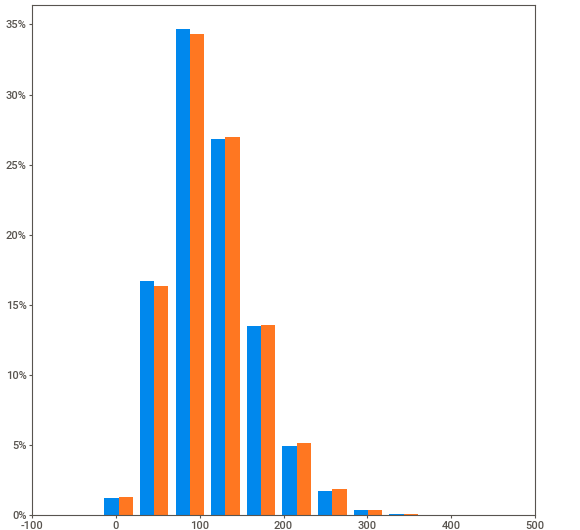
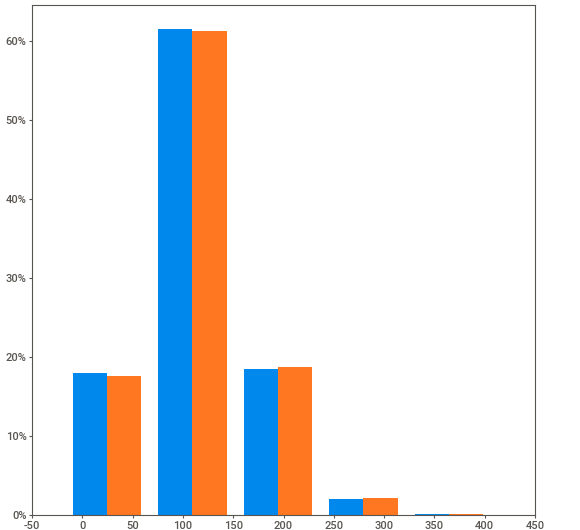
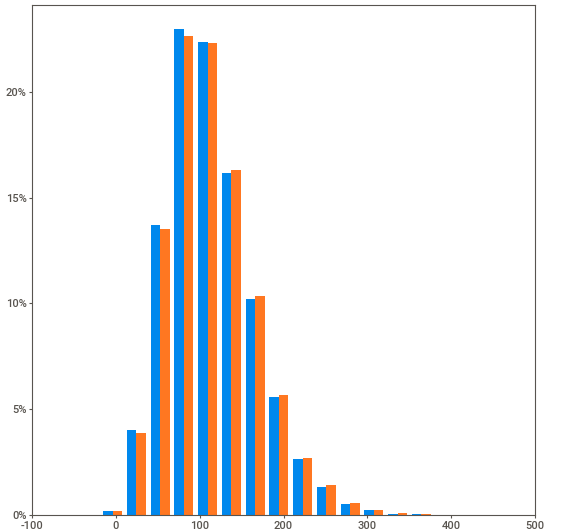
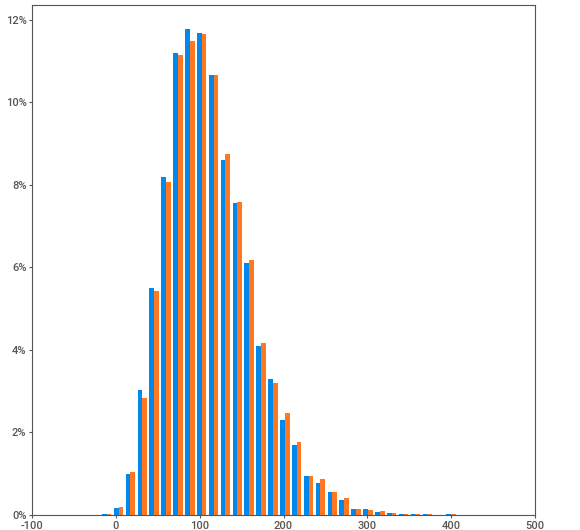
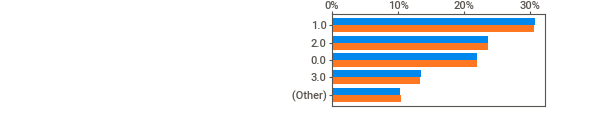
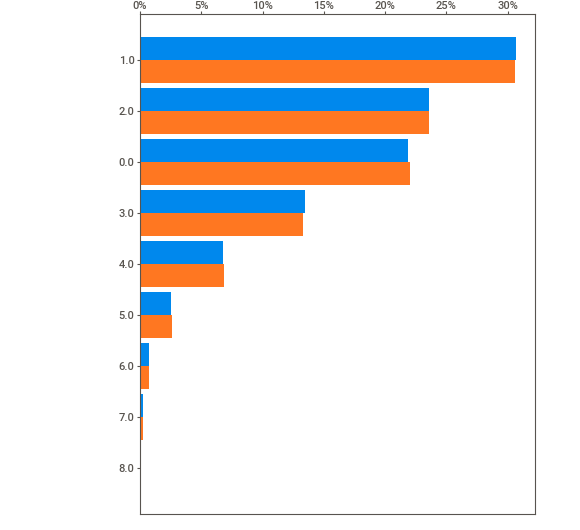
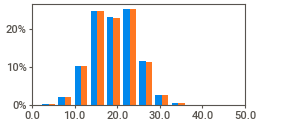
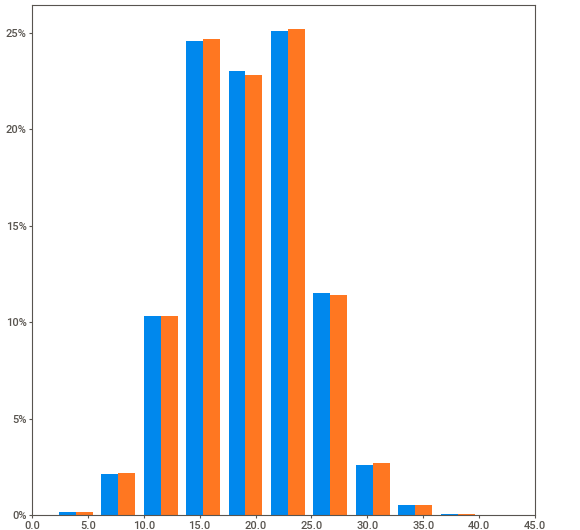
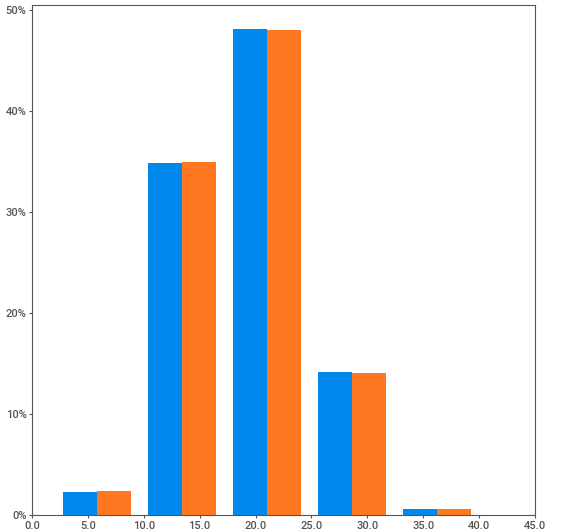
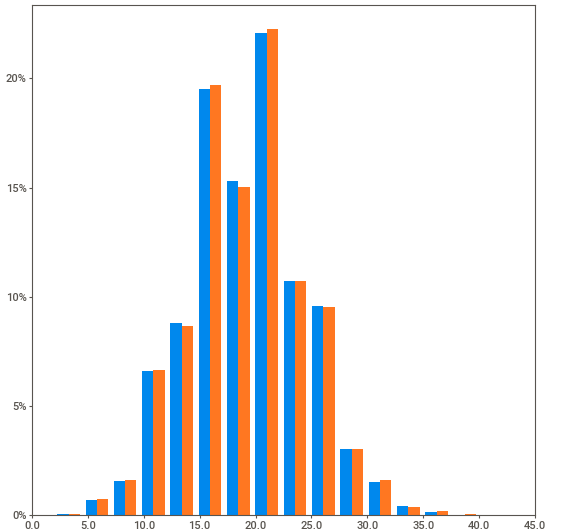
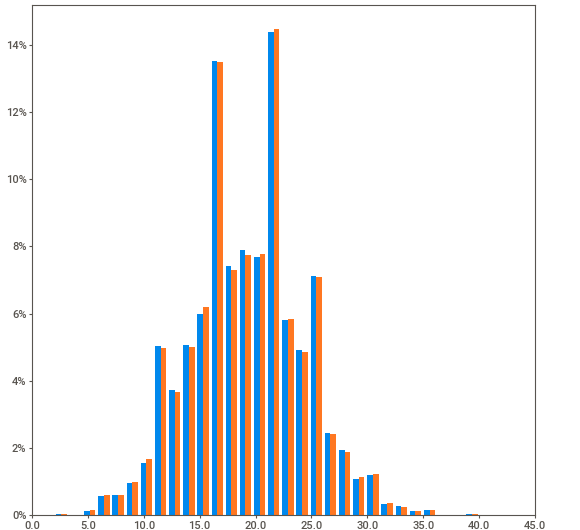
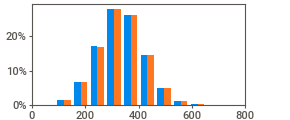
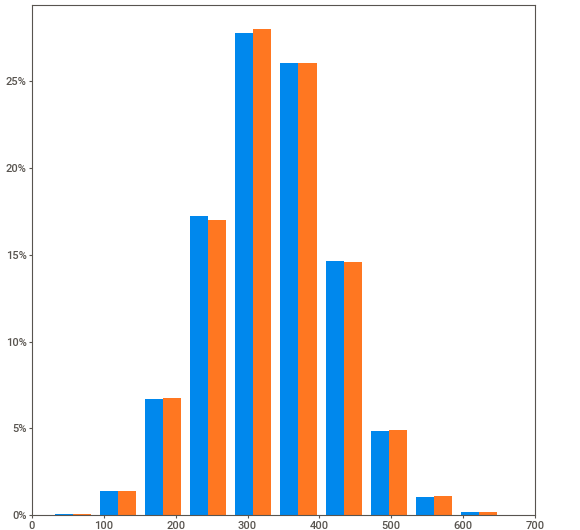
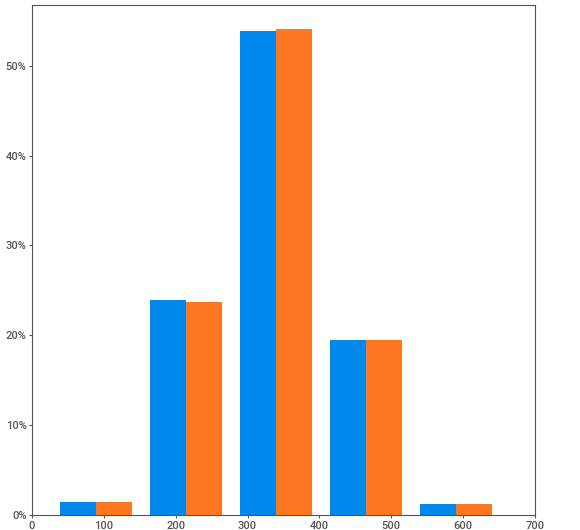
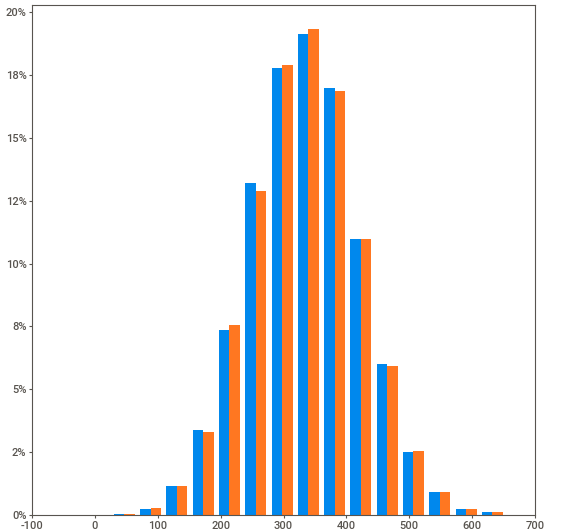
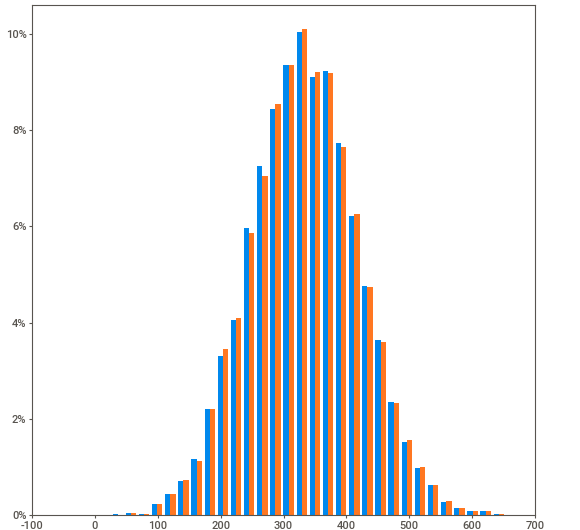
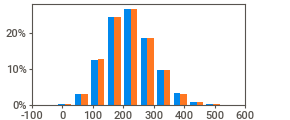
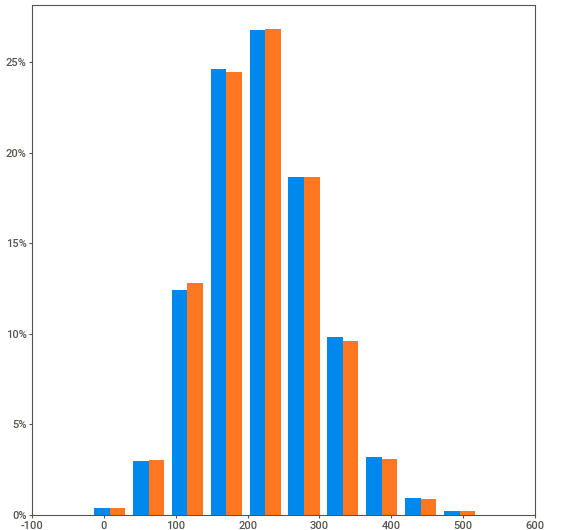
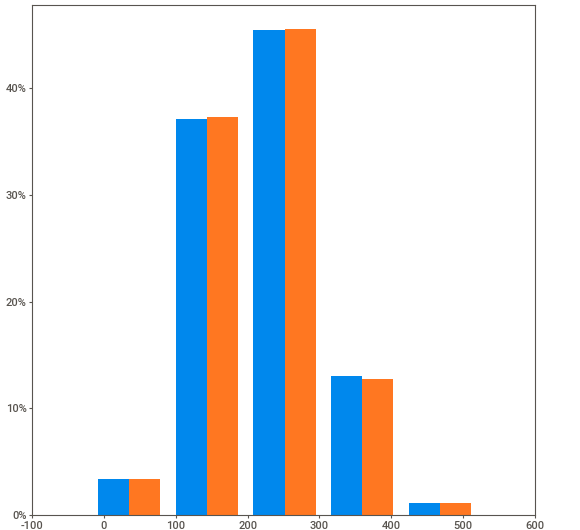
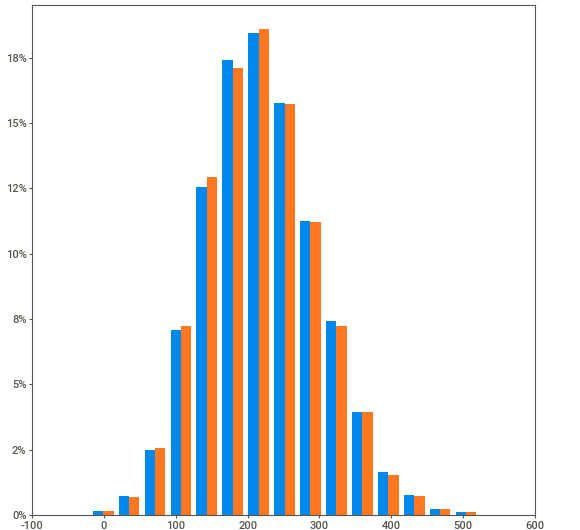
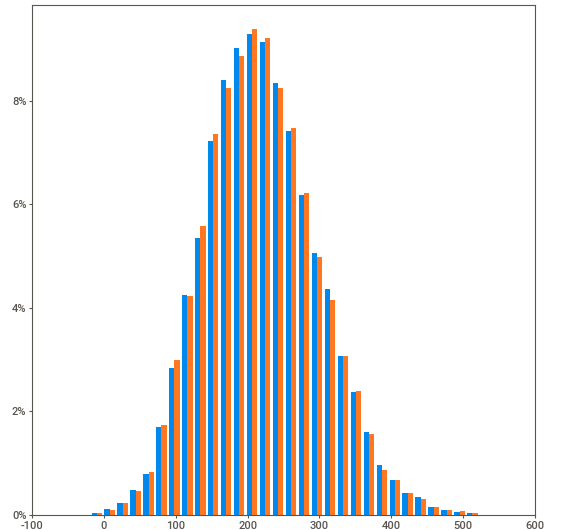
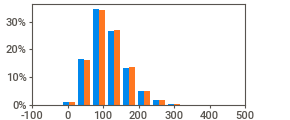
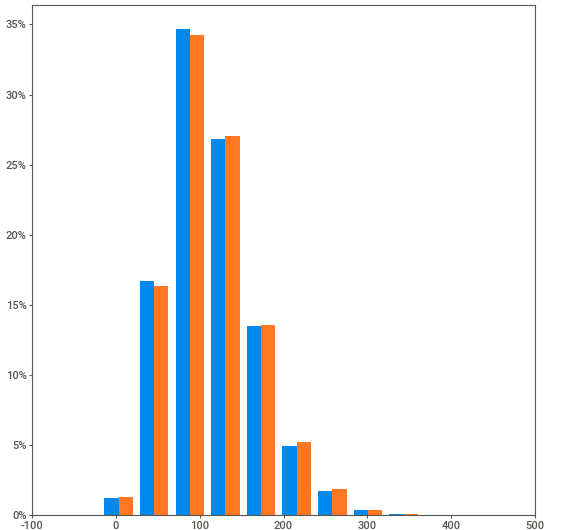
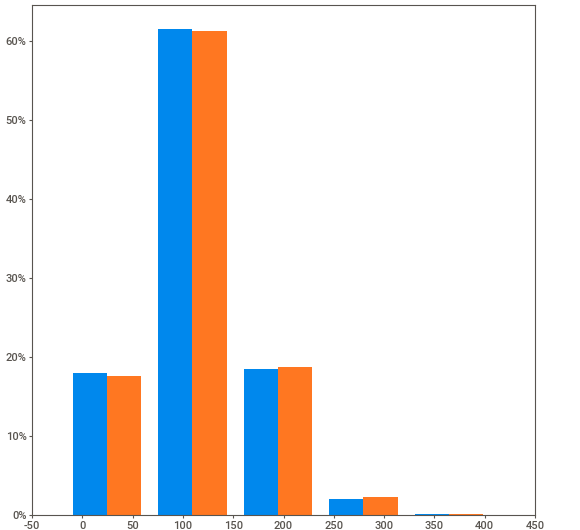
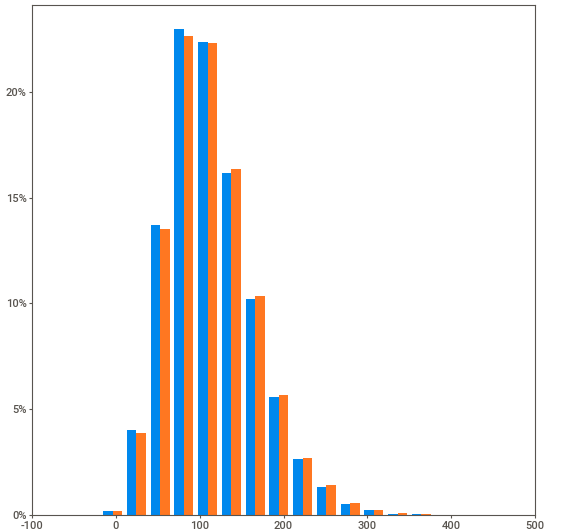
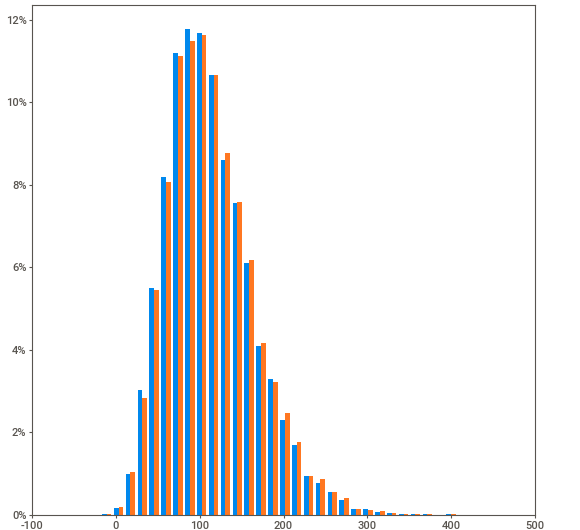
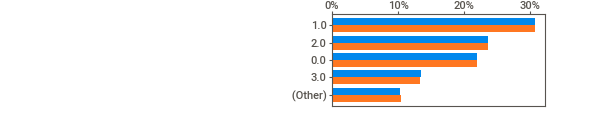
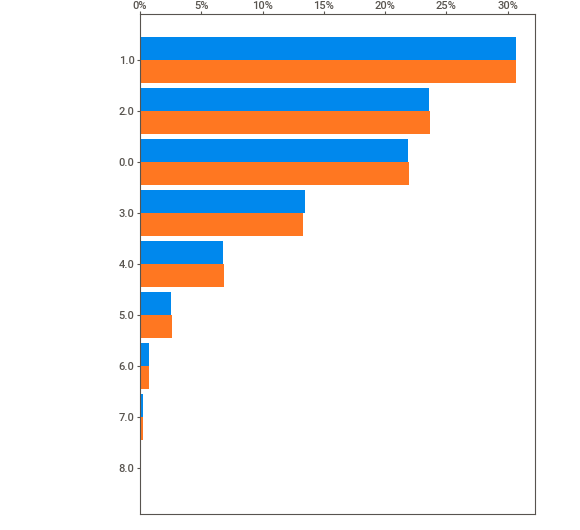
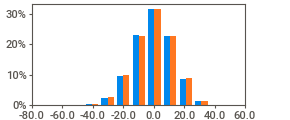
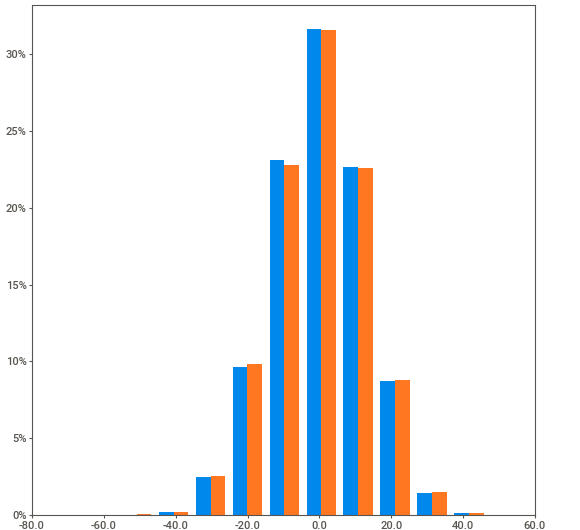
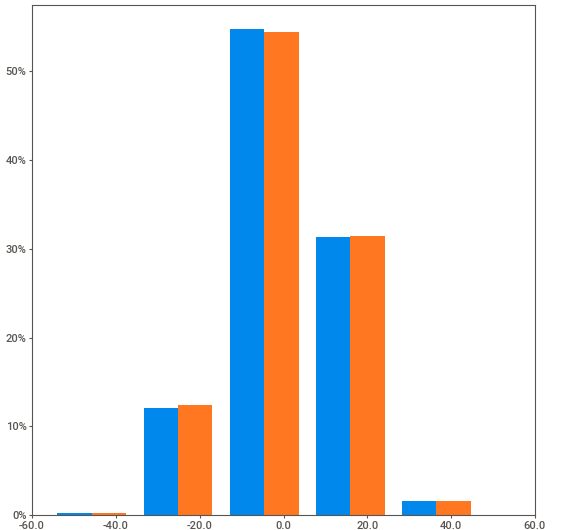
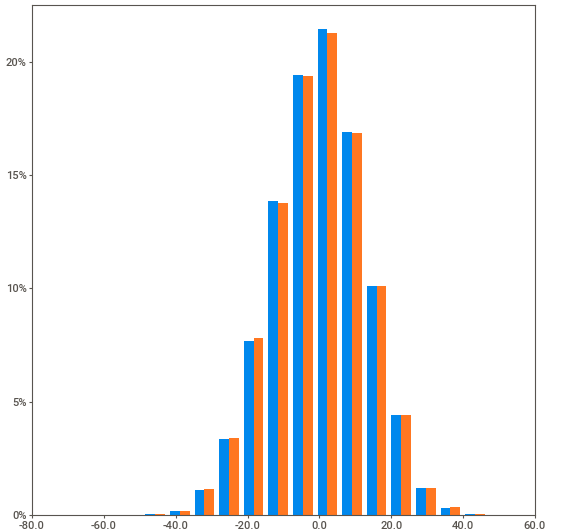
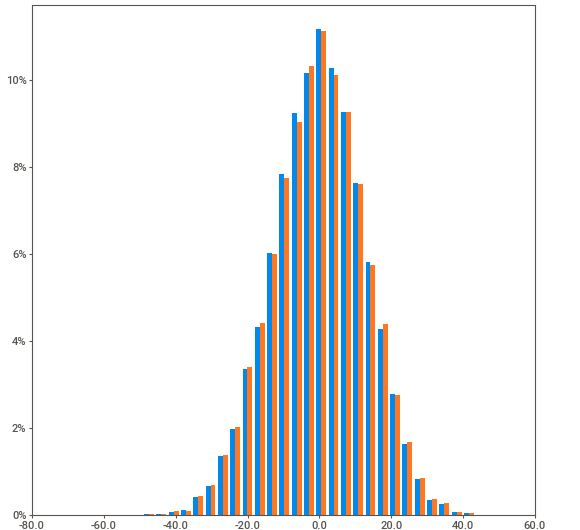
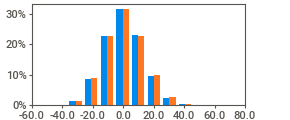
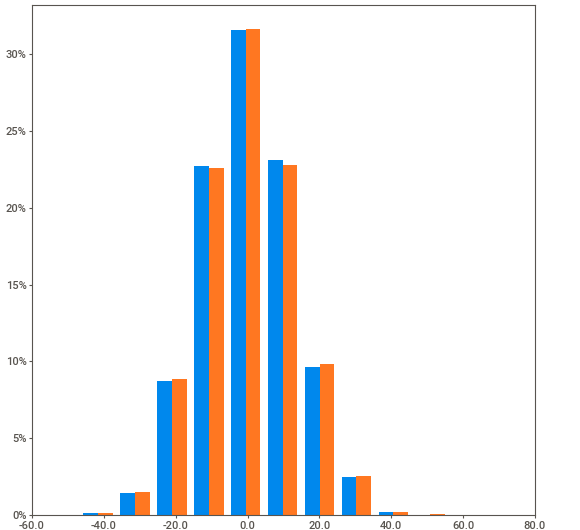
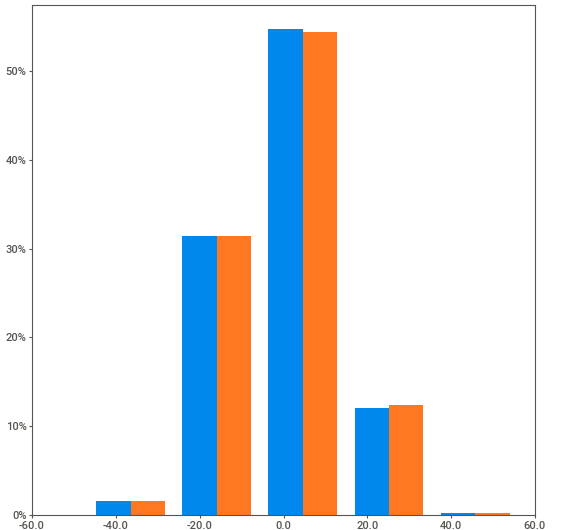
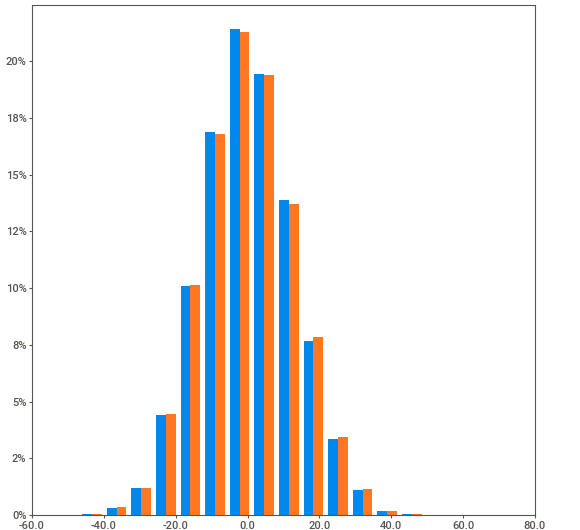
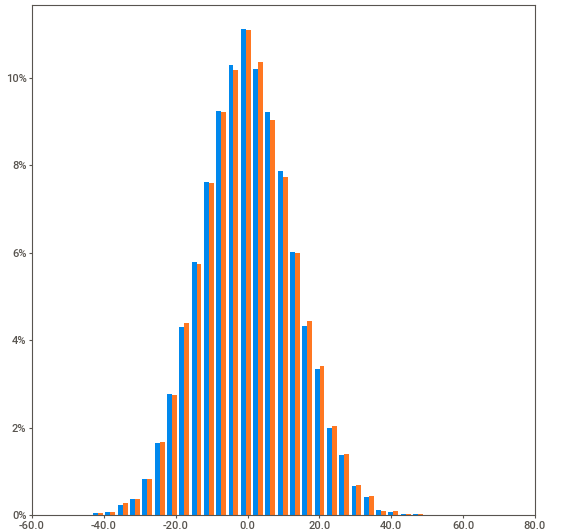
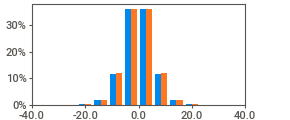
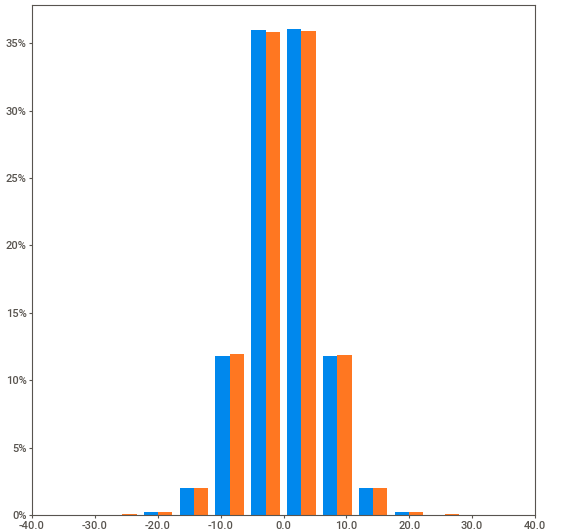
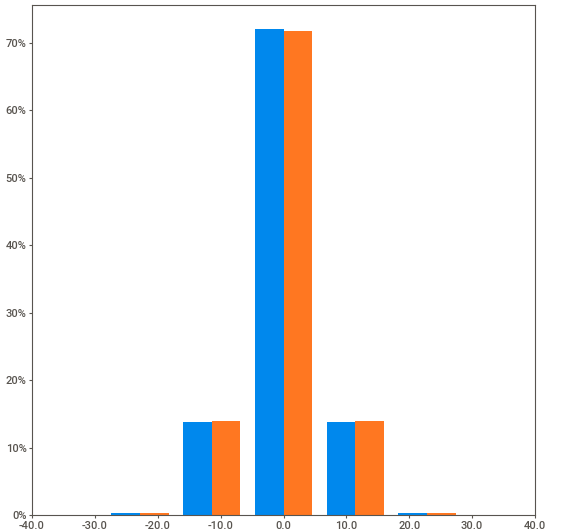
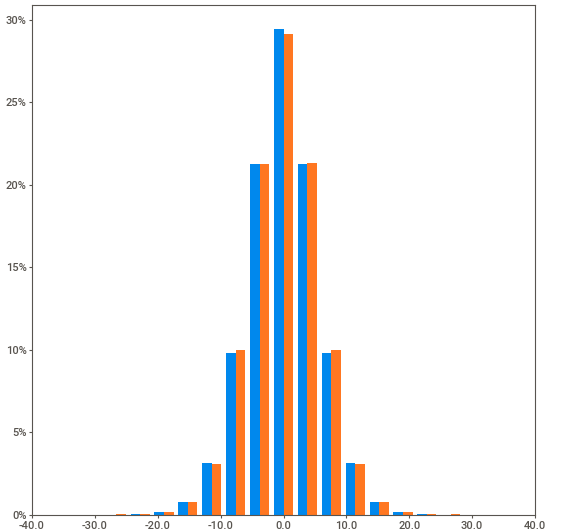
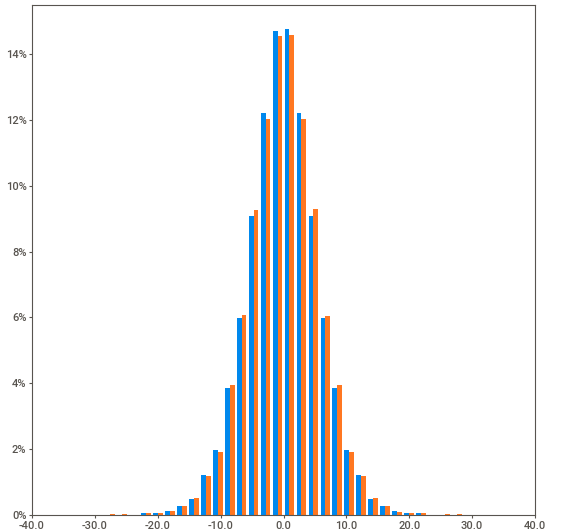
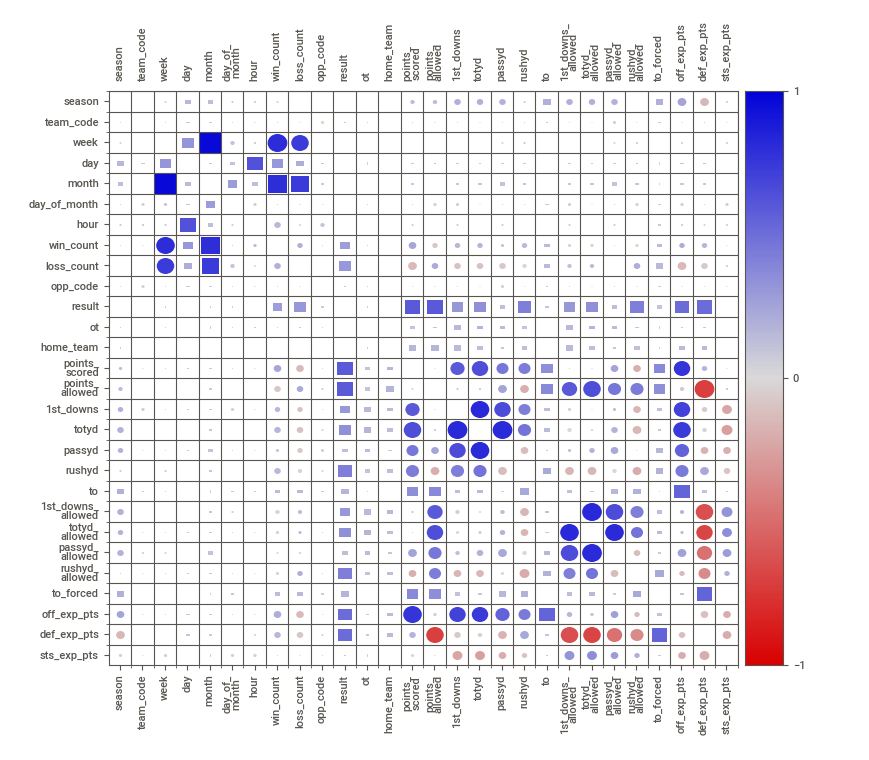
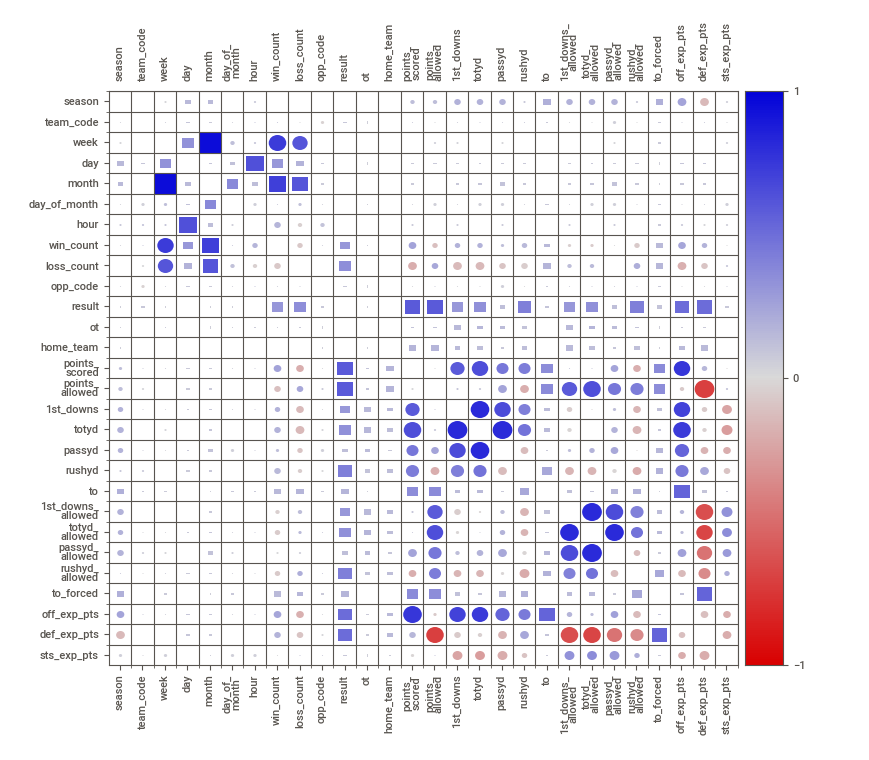

In [55]:
# compares two dataframes via sweetviz
df_comp = sv.compare(df, df_rolling)
df_comp.show_notebook()

In [56]:
# another way to get great insights is to use the comparison functionality to split your dataset into 2 sub-populations.
df_comp_intra = sv.compare_intra(df_rolling)

TypeError: compare_intra() missing 2 required positional arguments: 'condition_series' and 'names'

In [57]:
# using pandas to convert the prepared dataframe into a csv file that is model ready.
df_rolling.to_csv("Data/transformed.csv", index=False)